### LSE Data Analytics Online Career Accelerator

# Course 2 Assignment: Data Analytics using Python

## Table of Contents

1. [Setting Up the GitHub Repository](#1.-Setting-Up-the-GitHub-Repository)
2. [Importing and Exploring Data](#2.-Importing-and-Exploring-Data)
3. [Analysing the Data: Initial Exploration](#3.-Analysing-the-Data:-Initial-Exploration)
4. [Sentiment Analysis: NHS-related Twitter Data](#4.-Sentiment-Analysis:-NHS-related-Twitter-Data)
5. [Visualising and Identifying Initial Trends](#5.-Visualising-and-Identifying-Initial-Trends)
6. [Findings and Recommendations](#6.-Findings-and-Recomendations)
    

## Introduction: NHS Appointments in General Practice

This Analysis works to address the business problem of missed National Health Service (NHS) GP appointments by utilising python and associated libraries to gauge capacity and resouces utilisation in the NHS. Here we will explore the datasets provided by the stakeholders (NHS) shown below, create visualisations to identify trends and extract meaningful insights to inform strategic decisions. 

1. __AD - actual_duration.csv:__ Details of appointments made by patients: 
>- Regional information, date, duration, and number of appointments pertaining to a certain class. 

2. __AR - appointments_regional.csv:__ Details on the type of appointments made by patients:
> - Regional information, the month of appointment, appointment status, healthcare professional (HVP Type), appointment mode, the time between booking and appointment, as well as the number of appointments pertaining to a certain class.
    
4. __NC - national_categories.csv:__ Details of the national categories of appointments made by patients:
> - Regional information, date of appointment, service setting, context type, national category, and the number of appointments pertaining to a certain class.
    
4. __Tweets.csv:__ Details of twitter data (tweets) related to healthcare in the UK scraped from Twitter.





# 1. Setting Up the GitHub Repository

### My GitHub repository:

https://github.com/The-Ryan-Lin/Ryan_Lin_DA201_Assignment

# 2. Importing and Exploring Data

The provided semi-wrangled data was imported and sense-checked, missing values and duplicate entries were determined as well any potential outliers. Introductory exploration of the data was also conducted to answer preliminary objectives related to the business problem such as the number of different values in the various data categories being investigated (service settings, contect types, national categories and appointment status). 

### Prepare your workstation

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

## 2.1 Actual Duration

In [2]:
# Import and sense-check the actual_duration.csv data set as ad.
ad = pd.read_csv('actual_duration.csv')

# View the DataFrame.
display(ad)

sub_icb_location_code sub_icb_location_ons_code  \
0                        00L                 E38000130   
1                        00L                 E38000130   
2                        00L                 E38000130   
3                        00L                 E38000130   
4                        00L                 E38000130   
...                      ...                       ...   
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                             sub_icb_location_name icb_ons_code  \
0       NHS North East and North Cumbria ICB - 00L    E54000050   
1       NHS North East and North Cumbria ICB - 00L    E54000050   
2       NHS North East and North Cumbria ICB - 00L    E54000050   
3       NHS North East and North Cumbria ICB - 00L    E54000050   
4       NHS North East and North Cumbria ICB - 00L    E54000050   
...                                            ...          ...   
137788              NHS West Yorkshire ICB - X2C4Y    E54000054   
137789              NHS West Yorkshire ICB - X2C4Y    E54000054   
137790              NHS West Yorkshire ICB - X2C4Y    E54000054   
137791              NHS West Yorkshire ICB - X2C4Y    E54000054   
137792              NHS West Yorkshire ICB - X2C4Y    E54000054   

       region_ons_code appointment_date         actual_duration  \
0            E40000012        01-Dec-21           31-60 Minutes   
1            E40000012        01-Dec-21           21-30 Minutes   
2            E40000012        01-Dec-21            6-10 Minutes   
3            E40000012        01-Dec-21  Unknown / Data Quality   
4            E40000012        01-Dec-21           16-20 Minutes   
...                ...              ...                     ...   
137788       E40000012        30-Jun-22           31-60 Minutes   
137789       E40000012        30-Jun-22           21-30 Minutes   
137790       E40000012        30-Jun-22           16-20 Minutes   
137791       E40000012        30-Jun-22           11-15 Minutes   
137792       E40000012        30-Jun-22             1-5 Minutes   

        count_of_appointments  
0                         364  
1                         619  
2                        1698  
3                        1277  
4                         730  
...                       ...  
137788                    430  
137789                    751  
137790                    921  
137791                   1439  
137792                   1739  

[137793 rows x 8 columns]

### 2.1.1 Determine column names, number of rows and columns, data types and missing values

In [3]:
# Determine whether there are missing values.
# no rows with NaN in 8 columns
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [4]:
# Determine the metadata/ datatypes of the data set.
print(ad.dtypes)
# Or can use .info()
print(ad.info())

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)


In [5]:
# Determine the descriptive statistics of the data set.
print(ad.describe())

       count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000


### 2.1.2 Duplicates

In [6]:
# Check for duplicates in the DataFrame. An empty DataFrame result means there are no duplicates
duplicates = ad.duplicated()

# Print the rows that are duplicates (if any).
print(ad[duplicates])

Empty DataFrame
Columns: [sub_icb_location_code, sub_icb_location_ons_code, sub_icb_location_name, icb_ons_code, region_ons_code, appointment_date, actual_duration, count_of_appointments]
Index: []


In [7]:
# Check for duplicate rows excluding the 'count_of_appointments' column
duplicate_rows = ad[ad.duplicated(subset=ad.columns.difference(['count_of_appointments']), keep=False)]

# Display the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows (excluding 'count_of_appointments' column):")
    display(duplicate_rows)
else:
    print("No duplicate rows found (excluding 'count_of_appointments' column)")

No duplicate rows found (excluding 'count_of_appointments' column)


In [8]:
# Identify potential duplicates in the sub_icb locations classification codes.
# Create a new DataFrame 'ad_temp' and select sepecefic columns.
ad_temp = ad[['region_ons_code', 'icb_ons_code', 'sub_icb_location_ons_code']]

# Remove duplicate rows from the 'ad_temp' DataFrame and create a new DataFrame 'dedup_ad_temp'.
dedup_ad_temp = ad_temp.drop_duplicates()

# View the 'dedup_ad_temp' DataFrame that contains unique rows
display(dedup_ad_temp)

region_ons_code icb_ons_code sub_icb_location_ons_code
0            E40000012    E54000050                 E38000130
1209         E40000012    E54000050                 E38000163
2358         E40000012    E54000050                 E38000176
3383         E40000010    E54000048                 E38000014
4563         E40000010    E54000048                 E38000015
...                ...          ...                       ...
130832       E40000005    E54000042                 E38000253
132160       E40000007    E54000024                 E38000249
133644       E40000011    E54000011                 E38000257
135029       E40000003    E54000027                 E38000256
136513       E40000012    E54000054                 E38000254

[106 rows x 3 columns]

In [9]:
# Group the 'dedup_ad_temp' DataFrame by the 'sub_icb_location_code' column
# and calculate the size (number of occurrences) of each group.
temp_gby = dedup_ad_temp.groupby('sub_icb_location_ons_code').size().reset_index()

# Filter the 'temp_gby' DataFrame to include only rows where the size of the group is greater than 1.
# This indicates sub_icb locations with potential duplicates or overlaps.
temp_gby[temp_gby[0]>1]

Empty DataFrame
Columns: [sub_icb_location_ons_code, 0]
Index: []

In [10]:
# Identify potential duplicates in the ICB location classification codes
# Create a new DataFrame 'ad_temp' and select sepecefic columns.
ad_temp = ad[['region_ons_code', 'icb_ons_code']]

# Remove duplicate rows from the 'ad_temp' DataFrame and create a new DataFrame 'dedup_ad_temp'.
dedup_ad_temp = ad_temp.drop_duplicates()

# View the 'dedup_ad_temp' DataFrame that contains unique rows.
display(dedup_ad_temp)
print("Number of ICB Classification Codes:", dedup_ad_temp.shape[0])

region_ons_code icb_ons_code
0            E40000012    E54000050
3383         E40000010    E54000048
5729         E40000010    E54000057
14595        E40000010    E54000008
32345        E40000012    E54000061
33367        E40000011    E54000060
34569        E40000012    E54000054
37176        E40000012    E54000051
47228        E40000011    E54000015
51331        E40000011    E54000010
58539        E40000007    E54000056
60010        E40000007    E54000025
61297        E40000007    E54000023
63897        E40000007    E54000026
70585        E40000005    E54000053
72068        E40000005    E54000044
73314        E40000005    E54000042
74499        E40000006    E54000041
75953        E40000006    E54000043
77247        E40000006    E54000036
78667        E40000006    E54000038
86731        E40000006    E54000039
88096        E40000011    E54000055
91055        E40000011    E54000058
92450        E40000006    E54000037
95302        E40000011    E54000019
96613        E40000007    E54000022
100679       E40000003    E54000031
106223       E40000011    E54000013
107668       E40000003    E54000030
109026       E40000011    E54000059
111889       E40000005    E54000032
113373       E40000005    E54000052
114816       E40000006    E54000040
116058       E40000003    E54000028
125189       E40000003    E54000029
126673       E40000011    E54000018
127931       E40000011    E54000062
129411       E40000005    E54000034
132160       E40000007    E54000024
133644       E40000011    E54000011
135029       E40000003    E54000027

Number of ICB Classification Codes: 42


In [11]:
# Group the 'dedup_ad_temp' DataFrame by 'icb_ons_code' and count the occurrences of each code.
temp_gby = dedup_ad_temp.groupby('icb_ons_code').size().reset_index()

# Filter the 'temp_gby' DataFrame to include only rows where the size of the group is greater than 1.
# This indicates ICB classification codes with potential duplicates or overlaps.
temp_gby[temp_gby[0]>1]

Empty DataFrame
Columns: [icb_ons_code, 0]
Index: []

In [12]:
# Determine number of Region Classification Codes 

# Get the unique values in the 'region_ons_code' column.
unique_region_codes = dedup_ad_temp['region_ons_code'].unique()

# Get the number of unique values.
num_unique_region_codes = len(unique_region_codes)

# Sort the unique values in ascending order.
sorted_unique_region_codes = np.sort(unique_region_codes)

# Print the unique values.
print("Region Classification Codes: ", sorted_unique_region_codes)
print("Number of Region Classification Codes:", num_unique_region_codes)

Region Classification Codes:  ['E40000003' 'E40000005' 'E40000006' 'E40000007' 'E40000010' 'E40000011'
 'E40000012']
Number of Region Classification Codes: 7


No duplicates were found in the ad dataset. By grouping by the sub ICB level and then the ICB level and filtering the output to include only rows where the size of the group is greater than 1, we can further clarify that there are no potential duplicates or overlapping entries of the Sub ICB and ICB classification codes. 

With this process we are also able to cofirm the taxanomy/ hierarchical structure of the dataset in the order of: <br> Region (7) &rarr; ICB Location (42) &rarr; Sub ICB Location (106).

## 2.2 Appointments Regional

In [13]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
display(ar)

icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000034           2020-01           Attended       GP   
1         E54000034           2020-01           Attended       GP   
2         E54000034           2020-01           Attended       GP   
3         E54000034           2020-01           Attended       GP   
4         E54000034           2020-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
0                        8107  
1                        6791  
2                       20686  
3                        4268  
4                       11971  
...                       ...  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10  

[596821 rows x 7 columns]

### 2.2.1 Determine column names, number of rows and columns, data types and missing values

In [14]:
# Determine whether there are missing values.
# no rows with NaN in 7 columns
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [15]:
# Determine the metadata of the data set.
print(ar.dtypes)

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


In [16]:
# Determine the descriptive statistics of the data set.
ar.describe()

count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

### 2.2.2 Duplicates

In [17]:
# Check for duplicates in the DataFrame. An empty DataFrame output means there are no duplicates
duplicates = ar.duplicated()

# Print the rows that are duplicates (if any).
display(ar[duplicates])

icb_ons_code appointment_month appointment_status hcp_type  \
19292     E54000044           2020-01           Attended       GP   
19308     E54000044           2020-01           Attended       GP   
19374     E54000044           2020-01                DNA       GP   
19417     E54000044           2020-01                DNA  Unknown   
19419     E54000044           2020-01                DNA  Unknown   
...             ...               ...                ...      ...   
596809    E54000050           2022-06            Unknown  Unknown   
596812    E54000050           2022-06            Unknown  Unknown   
596814    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
19292        Home Visit            Unknown / Data Quality   
19308           Unknown            Unknown / Data Quality   
19374        Home Visit                     8  to 14 Days   
19417      Face-to-Face                       2 to 7 Days   
19419      Face-to-Face                          Same Day   
...                 ...                               ...   
596809        Telephone                    15  to 21 Days   
596812        Telephone                 More than 28 Days   
596814          Unknown                             1 Day   
596817          Unknown                    22  to 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
19292                       1  
19308                       2  
19374                       1  
19417                       1  
19419                       6  
...                       ...  
596809                      1  
596812                      1  
596814                      2  
596817                      8  
596820                     10  

[21604 rows x 7 columns]

In [18]:
# Group the duplicate rows and display the count of duplicates.
duplicate_grouped = duplicate_rows.groupby(duplicate_rows.columns.tolist()).size().reset_index(name='Count of Duplicates')

# Sort the DataFrame by 'Count of Duplicates' column in descending order.
duplicate_grouped_sorted = duplicate_grouped.sort_values(by='Count of Duplicates', ascending=False)

display(duplicate_grouped_sorted)

Empty DataFrame
Columns: [sub_icb_location_code, sub_icb_location_ons_code, sub_icb_location_name, icb_ons_code, region_ons_code, appointment_date, actual_duration, count_of_appointments, Count of Duplicates]
Index: []

In [19]:
# Check for duplicate rows excluding the 'count_of_appointments' column
duplicate_rows = ar[ar.duplicated(subset=ar.columns.difference(['count_of_appointments']), keep=False)]

# Display the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows (excluding 'count_of_appointments' column):")
    display(duplicate_rows)
else:
    print("No duplicate rows found (excluding 'count_of_appointments' column)")

Duplicate Rows (excluding 'count_of_appointments' column):


icb_ons_code appointment_month appointment_status hcp_type  \
13221     E54000044           2020-01           Attended       GP   
13222     E54000044           2020-01           Attended       GP   
13223     E54000044           2020-01           Attended       GP   
13224     E54000044           2020-01           Attended       GP   
13225     E54000044           2020-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
13221      Face-to-Face                             1 Day   
13222      Face-to-Face                    15  to 21 Days   
13223      Face-to-Face                       2 to 7 Days   
13224      Face-to-Face                    22  to 28 Days   
13225      Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
13221                    7718  
13222                   10605  
13223                   22218  
13224                    7922  
13225                   13754  
...                       ...  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10  

[395388 rows x 7 columns]

In [20]:
# Group the DataFrame 'duplicate_rows' by all columns.
grouped_duplicate_rows = duplicate_rows.groupby(duplicate_rows.columns.tolist())

# Count the occurrences in each group.
group_counts = grouped_duplicate_rows.size().reset_index(name='count')

# Display the grouped data
display(group_counts)

icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000008           2020-01           Attended       GP   
1         E54000008           2020-01           Attended       GP   
2         E54000008           2020-01           Attended       GP   
3         E54000008           2020-01           Attended       GP   
4         E54000008           2020-01           Attended       GP   
...             ...               ...                ...      ...   
373779    E54000061           2022-06            Unknown  Unknown   
373780    E54000061           2022-06            Unknown  Unknown   
373781    E54000061           2022-06            Unknown  Unknown   
373782    E54000061           2022-06            Unknown  Unknown   
373783    E54000061           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                             1 Day   
2          Face-to-Face                             1 Day   
3          Face-to-Face                             1 Day   
4          Face-to-Face                             1 Day   
...                 ...                               ...   
373779          Unknown                 More than 28 Days   
373780          Unknown                          Same Day   
373781          Unknown                          Same Day   
373782          Unknown                          Same Day   
373783          Unknown                          Same Day   

        count_of_appointments  count  
0                        1044      1  
1                        1496      1  
2                        1871      1  
3                        2263      1  
4                        3040      1  
...                       ...    ...  
373779                    110      1  
373780                      7      1  
373781                     11      1  
373782                     24      1  
373783                     26      1  

[373784 rows x 8 columns]

In [21]:
# Filter the grouped DataFrame to show rows with a count greater than 1
group_counts[group_counts['count'] > 1]

icb_ons_code appointment_month appointment_status  \
63        E54000008           2020-01           Attended   
64        E54000008           2020-01           Attended   
65        E54000008           2020-01           Attended   
75        E54000008           2020-01           Attended   
80        E54000008           2020-01           Attended   
...             ...               ...                ...   
373719    E54000061           2022-06            Unknown   
373720    E54000061           2022-06            Unknown   
373722    E54000061           2022-06            Unknown   
373751    E54000061           2022-06            Unknown   
373752    E54000061           2022-06            Unknown   

                    hcp_type appointment_mode  \
63                        GP     Face-to-Face   
64                        GP     Face-to-Face   
65                        GP     Face-to-Face   
75                        GP       Home Visit   
80                        GP       Home Visit   
...                      ...              ...   
373719  Other Practice staff     Video/Online   
373720               Unknown     Face-to-Face   
373722               Unknown     Face-to-Face   
373751               Unknown        Telephone   
373752               Unknown        Telephone   

       time_between_book_and_appointment  count_of_appointments  count  
63                Unknown / Data Quality                      1      3  
64                Unknown / Data Quality                      2      2  
65                Unknown / Data Quality                      3      2  
75                        15  to 21 Days                      1      2  
80                           2 to 7 Days                     10      2  
...                                  ...                    ...    ...  
373719                          Same Day                      1      2  
373720                             1 Day                      4      2  
373722                    15  to 21 Days                      1      2  
373751                       2 to 7 Days                      4      2  
373752                    22  to 28 Days                      1      2  

[18531 rows x 8 columns]

### % of total duplicates in ar DataFrame

In [22]:
ar_error = round(21604/596821*100, 2)
print(f"% of rows as duplicates:", ar_error, f"%")

% of rows as duplicates: 3.62 %


### Assumption
From observing the official [Appintments_GP_Metadata](https://digital.nhs.uk/data-and-information/publications/statistical/appointments-in-general-practice/metadata "Click to View Original NHS Metadata") file provided by the NHS, it seems the sub-icb columns have been removed from the provided ar data set. 

__Assumption:__ each line is a datapoint at the sub icb level. If analysis done at the icb level need to groupby the icb level.

__Duplicate were not removed from the ar dataset__
- The metadata mentions that multiple systems from different sub ICB's are fed into the dataset. without inclusion of the sub_icb classification codes, it’s impossible to determine whether they are duplicates or rows entered from different sub ICB’s that happen to align.
- Without being able to validate this with the NHS, the suspected duplicates were not removed.

## 2.3 National Categories

In [23]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
display(nc)

appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                                            ...                        ...   
817389              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817390              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817391              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817392              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817393              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   

                  context_type                       national_category  \
0       Care Related Encounter  Patient contact during Care Home Round   
1       Care Related Encounter                         Planned Clinics   
2       Care Related Encounter                              Home Visit   
3       Care Related Encounter              General Consultation Acute   
4       Care Related Encounter            Structured Medication Review   
...                        ...                                     ...   
817389  Care Related Encounter             Unplanned Clinical Activity   
817390  Care Related Encounter                         Planned Clinics   
817391  Care Related Encounter              Planned Clinical Procedure   
817392  Care Related Encounter            General Consultation Routine   
817393  Care Related Encounter              General Consultation Acute   

        count_of_appointments appointment_month  
0                           3           2021-08  
1                           7           2021-08  
2                          79           2021-08  
3                         725           2021-08  
4                           2           2021-08  
...                       ...               ...  
817389                     12           2022-06  
817390                      4           2022-06  
817391                     92           2022-06  
817392                      4           2022-06  
817393                     19           2022-06  

[817394 rows x 8 columns]

### 2.3.1 Determine column names, number of rows and columns, data types and missing values

In [24]:
# Determine whether there are missing values.
# no rows with NaN in 8 columns
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [25]:
# Determine the metadata of the data set.
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [26]:
# Determine the descriptive statistics of the data set.
nc.describe()

count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000

### 2.3.2 Duplicates

In [27]:
# Check for duplicates in the DataFrame. An empty DataFrame result means there are no duplicates
duplicates = nc.duplicated()

# Print the rows that are duplicates (if any).
print(nc[duplicates])

Empty DataFrame
Columns: [appointment_date, icb_ons_code, sub_icb_location_name, service_setting, context_type, national_category, count_of_appointments, appointment_month]
Index: []


In [28]:
# Check for duplicate rows excluding the 'count_of_appointments' column
duplicate_rows = nc[nc.duplicated(subset=nc.columns.difference(['count_of_appointments']), keep=False)]

# Display the duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate Rows (excluding 'count_of_appointments' column):")
    display(duplicate_rows)
else:
    print("No duplicate rows found (excluding 'count_of_appointments' column)")

No duplicate rows found (excluding 'count_of_appointments' column)


## 2.4 Explore the data to respond to objectives

**Question 1:** How many locations are there in the data set?

In [29]:
# Determine the number of locations.
# Counting Unique Values

nc_locations = len(pd.unique(nc['sub_icb_location_name']))
print("Count of locations: ", nc_locations)

Count of locations:  106


The output of 106 unique sub-ICB location verifies the output attained in 2.1.2, investigating duplicates in the ad Data Frame. 

In [30]:
nc_locations_list = nc['sub_icb_location_name'].value_counts()
nc_locations_list

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
                                               ...  
NHS North East and North Cumbria ICB - 00N      4210
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Greater Manchester ICB - 00V                2170
Name: sub_icb_location_name, Length: 106, dtype: int64

**Question 2:** What are the five locations with the highest number of records?



In [31]:
# Determine the top five locations based on record count.
nc_locations_list = nc['sub_icb_location_name'].value_counts(sort=True)
nc_locations_list.head(5)

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [32]:
# Determine the number of service settings. 
# Counting Unique Values for service settings

nc_ss = len(pd.unique(nc['service_setting']))
print("Count of service settings: ", nc_ss)

Count of service settings:  5


In [33]:
# Determine the number of context types.
nc_cc = len(pd.unique(nc['context_type']))
print("Count of context types: ", nc_cc)

Count of context types:  3


In [34]:
# Determine the number of national categories.
nc_nc = len(pd.unique(nc['national_category']))
print("Count of national categories: ", nc_nc)

Count of national categories:  18


In [35]:
# Determine the number of appointment status.
ar_as = len(pd.unique(ar['appointment_status']))
print("Count of appointment statuses: ", ar_as)

Count of appointment statuses:  3


In [36]:
# no. of unique values in each column (can remove)

nc_n = nc.nunique(axis=0)
print("No.of.unique values in each column :\n", nc_n)

No.of.unique values in each column :
 appointment_date          334
icb_ons_code               42
sub_icb_location_name     106
service_setting             5
context_type                3
national_category          18
count_of_appointments    9957
appointment_month          11
dtype: int64


In [37]:
pd.unique(ar['appointment_status'])

array(['Attended', 'DNA', 'Unknown'], dtype=object)

## 2.5 Outlier Analysis

Display potential outliers of the categorical values mentioned above. The count of appointments is the depenent variable throughout most of the analysis seen below when investigasting the change and trends in the different categorical groups such as Service Setting, HCP Type and Appointment Mode. Therefore, for outlier analysis the categorical values being invesitagete were plotted against the number of appointments. 

<Axes: xlabel='service_setting', ylabel='count_of_appointments'>

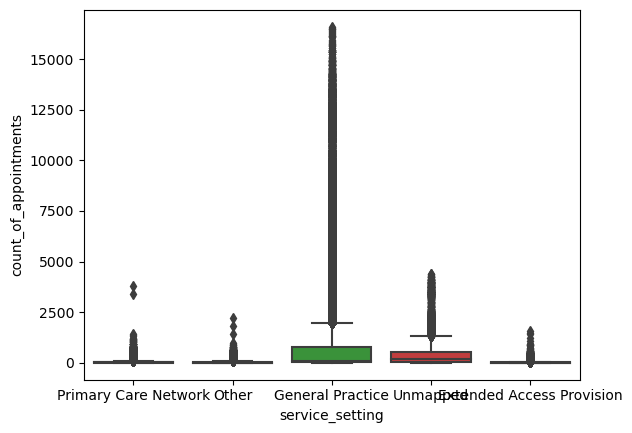

In [38]:
# Plot a boxplot to see outliers for service setting: 
sns.boxplot(data=nc, x='service_setting', y='count_of_appointments')

<Axes: xlabel='context_type', ylabel='count_of_appointments'>

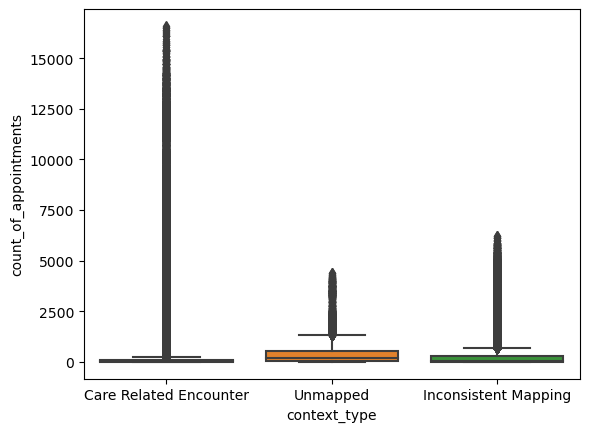

In [39]:
# Plot to see outliers for context types: 
sns.boxplot(data=nc, x='context_type', y='count_of_appointments')

<Axes: xlabel='appointment_status', ylabel='count_of_appointments'>

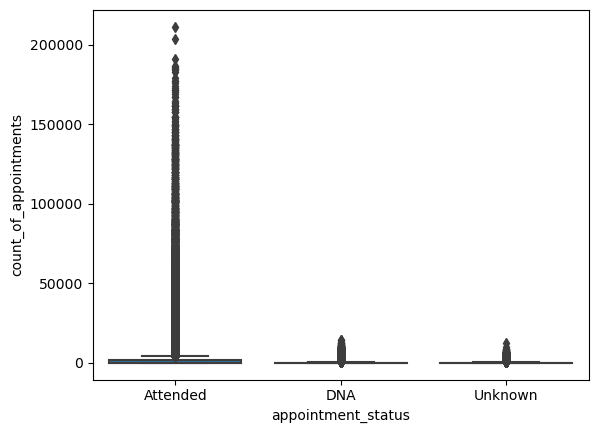

In [40]:
# Plot to see outlier for appointment status: 
sns.boxplot(data=ar, x='appointment_status', y='count_of_appointments')

__Outlier Analysis Disregarded__: From the boxplots above, it is evident that the data naturally leads to a high number of oultiers, with a high count of low number of appointment entries. This is likely due to: 
1. The difference between the high number of appointments of weekdays compared to weekends
2. The difference between the number of appointments from a large sub ICB/ clinic in a urban city in the UK compared to one in a remote rural areas. For example the differene in the numbmer of appointments from a clinic in central London compared to one in a remove village seaside town. 

# 

# 3. Analysing the Data: Initial Exploration

Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [41]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [42]:
# View the first five rows of appointment_date for the ar DataFrame to determine the date format.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [43]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [44]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0       2021-12-01           31-60 Minutes                    364  
1       2021-12-01           21-30 Minutes                    619  
2       2021-12-01            6-10 Minutes                   1698  
3       2021-12-01  Unknown / Data Quality                   1277  
4       2021-12-01           16-20 Minutes                    730

In [45]:
# Change the date format of ad['appointment_date'].
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# View the DateFrame.
ar.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034        2020-01-01           Attended       GP     Face-to-Face   
1    E54000034        2020-01-01           Attended       GP     Face-to-Face   
2    E54000034        2020-01-01           Attended       GP     Face-to-Face   
3    E54000034        2020-01-01           Attended       GP     Face-to-Face   
4    E54000034        2020-01-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [46]:
# Change the date format of nc['appointment_date'].
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# View the DateFrame.
display(nc)

appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                                            ...                        ...   
817389              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817390              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817391              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817392              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817393              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   

                  context_type                       national_category  \
0       Care Related Encounter  Patient contact during Care Home Round   
1       Care Related Encounter                         Planned Clinics   
2       Care Related Encounter                              Home Visit   
3       Care Related Encounter              General Consultation Acute   
4       Care Related Encounter            Structured Medication Review   
...                        ...                                     ...   
817389  Care Related Encounter             Unplanned Clinical Activity   
817390  Care Related Encounter                         Planned Clinics   
817391  Care Related Encounter              Planned Clinical Procedure   
817392  Care Related Encounter            General Consultation Routine   
817393  Care Related Encounter              General Consultation Acute   

        count_of_appointments appointment_month  
0                           3           2021-08  
1                           7           2021-08  
2                          79           2021-08  
3                         725           2021-08  
4                           2           2021-08  
...                       ...               ...  
817389                     12           2022-06  
817390                      4           2022-06  
817391                     92           2022-06  
817392                      4           2022-06  
817393                     19           2022-06  

[817394 rows x 8 columns]

In [47]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print(f"Minimum date of ad: {ad['appointment_date'].min()}")
print(f"Maximum date of ad: {ad['appointment_date'].max()}")

Minimum date of ad: 2021-12-01 00:00:00
Maximum date of ad: 2022-06-30 00:00:00


In [48]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
print(f"Minimum date of ar: {ar['appointment_month'].min()}")
print(f"Maximum date of ar: {ar['appointment_month'].max()}")

Minimum date of ar: 2020-01-01 00:00:00
Maximum date of ar: 2022-06-01 00:00:00


In [49]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print(f"Minimum date of nc: {nc['appointment_date'].min()}")
print(f"Maximum date of nc: {nc['appointment_date'].max()}")

Minimum date of nc: 2021-08-01 00:00:00
Maximum date of nc: 2022-06-30 00:00:00


Across all 3 data sets the overlapping date range is between the latest minimum date and the earliest maximum date: <br>

__2021-12-01 - 2022-06-30__

*As the dataset ar only contains appointment month, assume latest date as 2022-06-30*


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [50]:
# For each of these service settings, determine the number of records available for the period and the location. 
nc_subset = nc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z']
nc_subset_range = nc_subset[(nc_subset['appointment_date'] >= '2022-01-01') & (nc_subset['appointment_date'] <= '2022-06-01')]

# View the output.
nc_subset_range['service_setting'].value_counts()

General Practice             2104
Other                        1318
Primary Care Network         1272
Extended Access Provision    1090
Unmapped                      152
Name: service_setting, dtype: int64

**Question 3:** Which month had the highest number of appointments?

In [51]:
# Number of appointments per month == sum of count_of_appointments by month.
# Group the DataFrame 'nc' by the 'appointment_month' column.
# Calculate the sum of the 'count_of_appointments' values within each group.
# Sort the resulting aggregated data in descending order of appointment counts.
nc_grouped = nc.groupby('appointment_month')[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)

# view the resulting DataFrame
nc_grouped

count_of_appointments
appointment_month                       
2021-11                         30405070
2021-10                         30303834
2022-03                         29595038
2021-09                         28522501
2022-05                         27495508
2022-06                         25828078
2022-01                         25635474
2022-02                         25355260
2021-12                         25140776
2022-04                         23913060
2021-08                         23852171

In [52]:
# Determine average number of appointments per month.
average_count_of_appointments = nc_grouped['count_of_appointments'].mean()

# Print the result
print("Average count of appointments:", average_count_of_appointments.round(2))

Average count of appointments: 26913342.73


**Question 4:** What was the total number of records per month?

In [53]:
# Total number of records per month.
nc_grouped = nc.groupby('appointment_month')[['count_of_appointments']].count()

# Rename Column 
nc_grouped.rename(columns={'count_of_appointments': 'number_of_records'}, inplace=True)

# view the resulting DataFrame
nc_grouped

number_of_records
appointment_month                   
2021-08                        69999
2021-09                        74922
2021-10                        74078
2021-11                        77652
2021-12                        72651
2022-01                        71896
2022-02                        71769
2022-03                        82822
2022-04                        70012
2022-05                        77425
2022-06                        74168

beginning data exploration

In [54]:
# Determine average number of records per month.
average_count_of_records = nc_grouped['number_of_records'].mean()

# Print the result
print("Average count of appointments:", average_count_of_records.round(2))

Average count of appointments: 74308.55


Where possible the full timeframe of the dataset was investigated, particularly for the ar Data Frame. When analysing the ad or nc Data Frame the earliest date of the Data Frame was use 2021-12-01 and 2021-08-01 respectively until the max/ latest date of 2022-06-30. 

# 

# 4. Sentiment Analysis: NHS-related Twitter Data

## 4.1 Tweets from Twitter Analysis with Hashtags Related to Healthcare in the UK

In [55]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [56]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
display(tweets)

tweet_id  \
0     1567629223795527681   
1     1567582846612553728   
2     1567582787070304256   
3     1567582767625428992   
4     1567582720460570625   
...                   ...   
1169  1567583004209332227   
1170  1567582945342267393   
1171  1567582936014241792   
1172  1567582892892782592   
1173  1567582846847533058   

                                                                                                                                                                                              tweet_full_text  \
0     As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                                 RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                              RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                                RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4     ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   
...                                                                                                                                                                                                       ...   
1169                                                           RT @PotomacPhotonic: Potomac #Innovation Report:  #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…   
1170  Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...   
1171  The @hfmaorg Region 9 presents "The Value of ESG to the Healthcare Industry" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...   
1172                                    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC   
1173                                                             RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift -  Interviewing Now!! (#NewportBeach) #job http…   

                                                                                                                                                                                               tweet_entities  \
0     {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1     {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2     {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3     {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4     {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 2

In [57]:
# Explore the data set with the describe() function.
tweets.describe()

tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

In [58]:
# Explore the data set with the info() function.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


### Would it be useful to only look at retweeted and favourite tweet messages?

The benefit of looking at only retweeted and favourited tweets is it narrows down the analysis to more valuable tweets that have reached more of an audience. However, it is strange that in tha data set provided, tweets that have a retweet count or a favourite count (>= 1) have a False booleon value in the tweet_favorited and tweet_retweeted columns. 

In [59]:
# Create a new DataFrame containing only the text.
tweets_text = tweets[['tweet_full_text']].copy()

# View the DataFrame.
display(tweets_text)

tweet_full_text
0     As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                 RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                              RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                                RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4     ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...
...                                                                                                                                                                                                       ...
1169                                                           RT @PotomacPhotonic: Potomac #Innovation Report:  #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170  Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...
1171  The @hfmaorg Region 9 presents "The Value of ESG to the Healthcare Industry" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...
1172                                    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC
1173                                                             RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift -  Interviewing Now!! (#NewportBeach) #job http…

[1174 rows x 1 columns]

In [60]:
# Loop through the messages, and create a list of values containing the # symbol.
tags = []

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

# Create a Pandas Series to count the values in the 'tags' list 
tags = pd.Series(tags)

# Use value_counts() to get the count of occurrences for each unique value
value_counts_tags = tags.value_counts()

In [61]:
# Display the first 30 records.
value_counts_tags.head(30)

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [62]:
# Convert the series to a DataFrame in preparation for visualisation.
data = pd.DataFrame(value_counts_tags, columns=['count'])

#reset the index of the DataFrame
data.reset_index(inplace=True)

# Rename the columns to 'hashtag' and 'count'
data.rename(columns = {'index': 'hashtag'}, inplace=True)

display(data)

hashtag  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]

In [63]:
# Fix the count datatype.
data['count'] = data['count'].astype(int)

# View the result.
data.dtypes

hashtag    object
count       int64
dtype: object

In [64]:
# Display records where the count is larger than 10.
filtered_data = data[data['count'] > 10]

display(filtered_data)

hashtag  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #wellness     15
25                  #healthtech     15
26  #doctorofveterinarymedicine     14
27                     #science     14
28                    #medicare     14
29                     #covid19     14
30                #telemedicine     13
31                 #healthcare.     13
32                        #tech     13
33                      #foamed     13
34                 #patientcare     13
35                   #education     13
36                      #doctor     12
37                #mentalhealth     12
38                   #hospitals     12
39                  #innovation     11
40                  #telehealth     11
41                 #healthcare?     11
42                #healthcareit     11
43                         #usa     11
44                      #nurses     11
45     drugs\n\n#tipsfornewdocs     11
46       #digitaltransformation     11

In [65]:
# Create a Seaborn barplot indicating records with a count >12 records.
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to include only records with count greater than 12
filtered_data = data[data['count'] > 12]

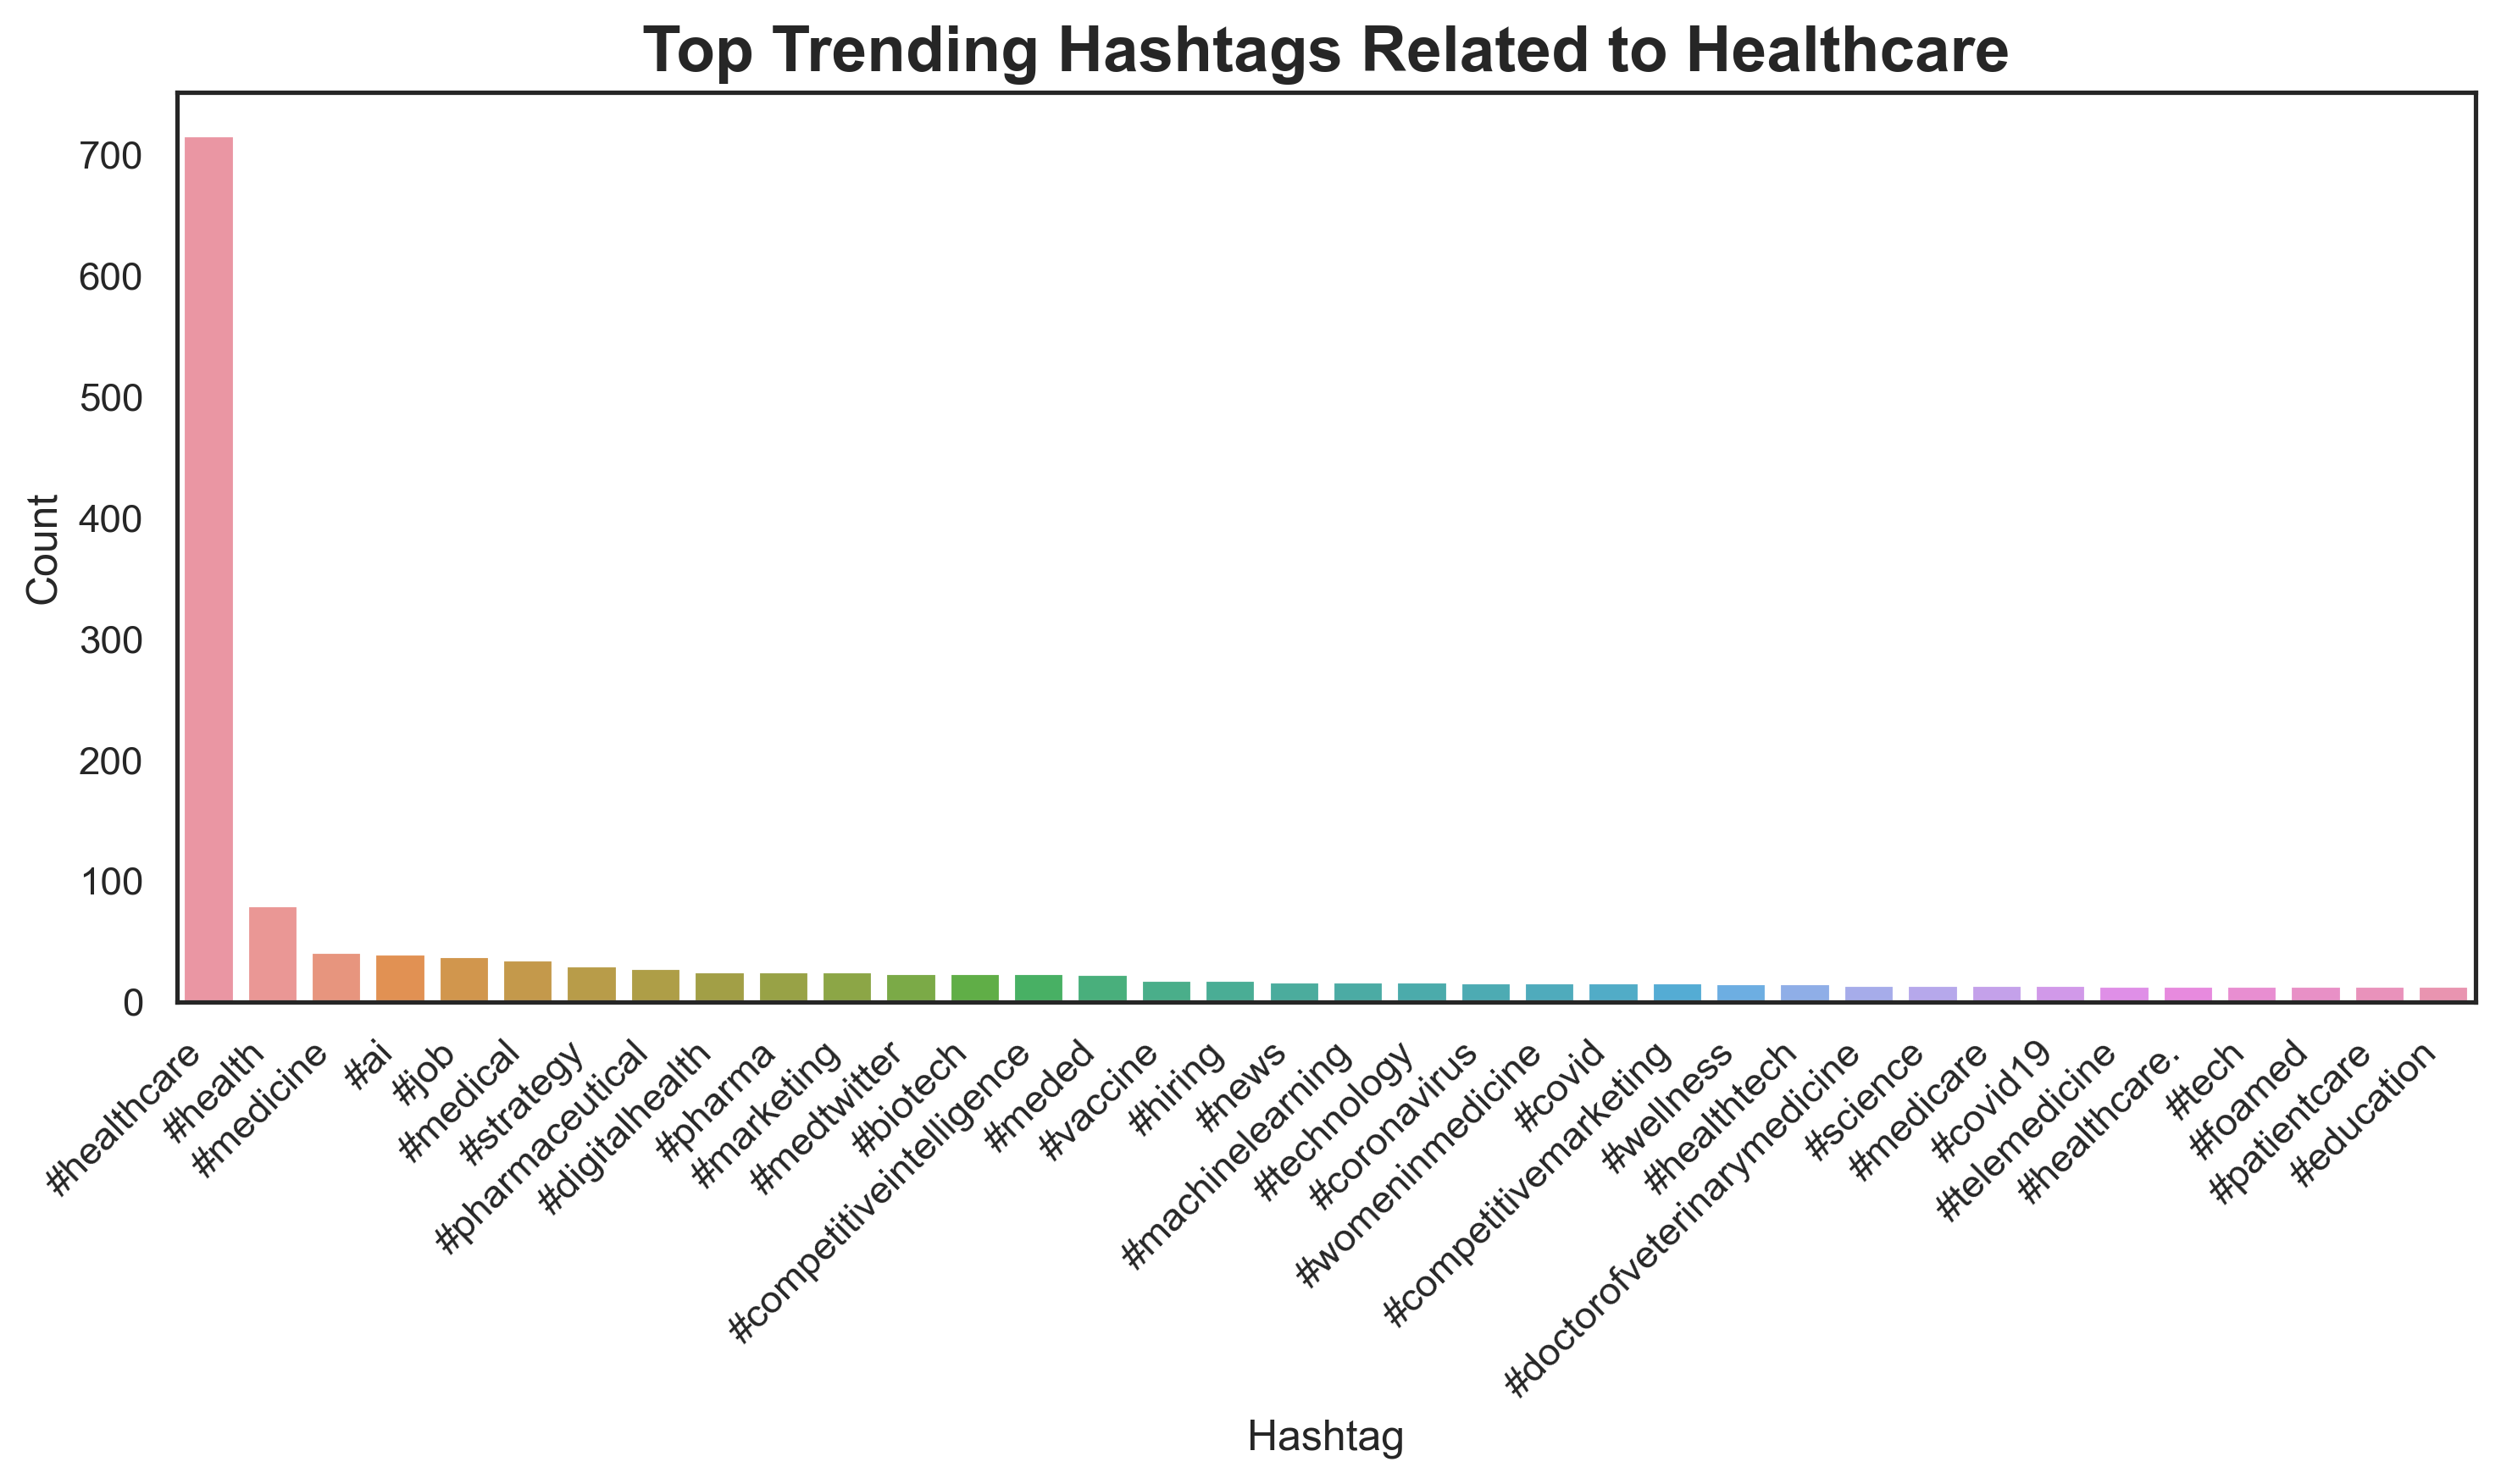

In [66]:
# Create the plot.
plt.figure(figsize=(10, 6), dpi=300)
sns.barplot(x='hashtag', y='count', data=filtered_data)

# Customise the plot
plt.title('Top Trending Hashtags Related to Healthcare', fontsize=18, fontweight='bold')
plt.xlabel('Hashtag')
plt.ylabel('Count')

# Rotate the x-axis labels 
plt.xticks(rotation=45, ha='right')

# Adjust the layout to prevent label overlapping
plt.tight_layout()

# Save the plot to a file (e.g., PNG) for use in PowerPoint
# plt.savefig('hashtag_counts.png', dpi=300, bbox_inches='tight')

# View the barplot.
plt.show()

### Removing any overrepresented hashtags
As this analysis does not provide any valuable insights related to the business problem, overrepresentation was not justified and ignored. To elaborate on the fact that this analysis does not provide much value in terms of anaylsing and solving the business problem, one just has to ask: __What valuable inights can be attained by the NHS knowing 80 people retweeted #health, 41 people tweeted #medicine or 28 people tweeted #pharmaceutical?__

## 4.2 Analysing Tweets that Contain Specefic Words

In [67]:
# Filter tweets containing the word 'wait'
tweets_with_wait = tweets_text[tweets_text['tweet_full_text'].str.contains('wait', case=False)]

# Count the number of tweets containing the word 'wait'
num_tweets_with_wait = len(tweets_with_wait)

# Display the tweets and count
print("Tweets containing the word 'wait':")
print(tweets_with_wait['tweet_full_text'])

display("\nNumber of tweets containing the word 'wait':", num_tweets_with_wait)


Tweets containing the word 'wait':
174     10,000(unmatched)Drs await to treat you!Let’s fix the broken #Match #Healthcare #Education #USA #RuralHealth system!#Match2023 It matters to all aspiring physicians (+patients) #Match2023Madness #...
185                                                                RT @_timos_: #ESMO22: Trodelvy's long-awaited survival data in breast cancer is finally in — and better than expected https://t.co/ahRXqCWQ…
192     #ESMO22: Trodelvy's long-awaited survival data in breast cancer is finally in — and better than expected https://t.co/ahRXqCWQB6 #strategy #competitiveintelligence #marketing #healthcare #pharmace...
681                                                                                       People’s 2022 Cutest Rescue Dog Finalists Are Waiting For Your Vote #animalhealth #healthcare https://t.co/uerCW3Owez
692     Our agents knocked it out of the park this month! 🏟\nWe’re breaking sales records and it isn’t even AEP yet! \nWe can’t wait 

"\nNumber of tweets containing the word 'wait':"

9

In [68]:
display(tweets_with_wait)

tweet_full_text
174   10,000(unmatched)Drs await to treat you!Let’s fix the broken #Match #Healthcare #Education #USA #RuralHealth system!#Match2023 It matters to all aspiring physicians (+patients) #Match2023Madness #...
185                                                              RT @_timos_: #ESMO22: Trodelvy's long-awaited survival data in breast cancer is finally in — and better than expected https://t.co/ahRXqCWQ…
192   #ESMO22: Trodelvy's long-awaited survival data in breast cancer is finally in — and better than expected https://t.co/ahRXqCWQB6 #strategy #competitiveintelligence #marketing #healthcare #pharmace...
681                                                                                     People’s 2022 Cutest Rescue Dog Finalists Are Waiting For Your Vote #animalhealth #healthcare https://t.co/uerCW3Owez
692   Our agents knocked it out of the park this month! 🏟\nWe’re breaking sales records and it isn’t even AEP yet! \nWe can’t wait to see how our agents deliver in Open Enrollment 2023 🙌🙌\n\n#healthcare...
900   Are you an Intake #Coordinator – #Bilingual in #RedondoBeach? #MediQuestStaffing is waiting for you! #job https://t.co/ronMs7QQBn #jobs #employment #healthcare #job #hiring #jobsearch https://t.co...
986                Trying to navigate #britishcolumbia #fraserhealth broken healthcare system with hubby suffering from severe kidney stone….  Let’s see how long we need to wait in ER\n\n@bcndp #healthcare
1098  @CapricornFMNews We have waiting to hear this kind of news now Sa is getting things correct there is absolutely nothing mahala #HealthCare services in SA must be paid by foreign nationals and loca...
1125  Are you looking for something fun to do that can help improve your health and well-being?\nMeadow Wind Healthcare has a full array of activities just waiting for you to try!\nTell us your favorite...

In [69]:
# Filter tweets containing the word 'appointment'
tweets_with_appointment = tweets_text[tweets_text['tweet_full_text'].str.contains('appointment', case=False)]

# Count the number of tweets containing the word 'appointment'
num_tweets_with_appointment = len(tweets_with_appointment)

# Display the tweets and count
print("Tweets containing the word 'appointment':")
print(tweets_with_appointment['tweet_full_text'])

print("\nNumber of tweets containing the word 'appointment':", num_tweets_with_appointment)

Tweets containing the word 'appointment':
47                                                                 RT @_timos_: Purespring Therapeutics strengthens scientific leadership with the appointment of Alice Brown as Chief Scientific Officer - Ya…
59      Purespring Therapeutics strengthens scientific leadership with the appointment of Alice Brown as Chief Scientific Officer - Yahoo Finance https://t.co/gyLsztiV0D #strategy #competitiveintelligence...
339           Hiring Alert: Patient Service Representative (#Canton, Michigan) Dental Care Alliance #job #SchedulingAppointments #TreatmentPlanning #HealthCare https://t.co/obOiJBdaAY https://t.co/DiFIPWCJV5
346      New Opportunity: Patient Service Representative (#Dearborn, Michigan) Dental Care Alliance #job #SchedulingAppointments #TreatmentPlanning #HealthCare https://t.co/qdPG2VEjTu https://t.co/Z7e9JmuTED
351        New Opportunity: Patient Service Representative (#Warren, Michigan) Dental Care Alliance #job #SchedulingAppointmen

An attempt was made to explore tweets that contained the specific words "wait" to investigate potential tweets referring to watiing times and "appointment" referring to peoples NHS appointments, but the outputs as seen above did not provide any relevant and useful comments.

## 4.3 Sentiment Analysis

In [70]:
# Sentiment analysis
!pip install nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Create function to calculate a sentiment score for each tweet
def get_sentiment_score(tweet):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(tweet)['compound']

# Apply the sentiment analysis function to each tweet in the dataframe
tweets_text['sentiment_score'] = tweets_text['tweet_full_text'].apply(get_sentiment_score)

# View the Dataframe
display(tweets_text)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/RyanLin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


tweet_full_text  \
0     As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                                 RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                              RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                                RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4     ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   
...                                                                                                                                                                                                       ...   
1169                                                           RT @PotomacPhotonic: Potomac #Innovation Report:  #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…   
1170  Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...   
1171  The @hfmaorg Region 9 presents "The Value of ESG to the Healthcare Industry" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...   
1172                                    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC   
1173                                                             RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift -  Interviewing Now!! (#NewportBeach) #job http…   

      sentiment_score  
0              0.8384  
1              0.0000  
2             -0.4767  
3              0.6369  
4              0.6588  
...               ...  
1169           0.4939  
1170           0.3612  
1171           0.4939  
1172           0.5719  
1173           0.0000  

[1174 rows x 2 columns]

In [71]:
# Calculate the average sentiment score
average_sentiment = tweets_text['sentiment_score'].mean()

# Print the average sentiment score
print("Average Sentiment Score:", average_sentiment.round(2))

Average Sentiment Score: 0.25


In [72]:
# View tweets with the lowest and highest sentiment scores
# Use the sort_values() function to view the 'sentiment_score' column in descending order
tweets_text_sorted = tweets_text.sort_values(by='sentiment_score', ascending=False)

# display the sorted DataFrame
display(tweets_text_sorted)

tweet_full_text  \
18   Brilliant, Reliable, Talented, Dedicated, Collaborative…Okay, that’s enough about YOU. Tell us about your friends! Emerus Holdings Inc. is hiring and we offer Employee Referral Bonuses! WHO DO YOU...   
877  We're honored to be named #29 on @GPTW_US Best Workplaces in Health Care™ 2022 🎉 \n\nThank you to our amazing team who continues to make CareerStaff such a great place to work. #BestWorkplaces #he...   
470  Thank you, Varya, for taking the time to tell us about your experience at our Epic Care Emeryville Care Center &amp; for allowing us to be part of your journey. We are honored to be able to provid...   
951  Do you like working with people? Are you passionate about providing accessible #healthcare? Do the words "holistic" and "life-affirming" describe the way you view care? \nIf you said yes, you migh...   
14   @themusingsofspu Thank you! So much duplication in #Healthcare but I'm always looking for different ways to match ever changing needs. Beth is doing incredible work. There is some wonderful innova...   
..                                                                                                                                                                                                       ...   
652  Proud to be donating blood @CanadasLifeline today but so disappointed to see that all #COVID precautions are gone. No one even asked me if I had any symptoms. This is a #healthcare facility &amp; ...   
986               Trying to navigate #britishcolumbia #fraserhealth broken healthcare system with hubby suffering from severe kidney stone….  Let’s see how long we need to wait in ER\n\n@bcndp #healthcare   
879                                                             RT @speedysticksllc: Although the monkeypox virus has a relatively low fatality rate, it can still be damaging and cause serious side effec…   
842  @GOPChairwoman For context lying @gop republicans say anyone disagreeing their positions is lying\n\n#trump lies about everything\n\nhttps://t.co/Ddpe0vDaqa\n\nincluding @TheDemocrats positions as...   
854  @NickAdamsinUSA For context lying @gop republicans say anyone disagreeing their positions is lying\n\n#trump lies about everything\n\nhttps://t.co/Ddpe0vDaqa\n\nincluding @TheDemocrats positions a...   

     sentiment_score  
18            0.9666  
877           0.9607  
470           0.9590  
951           0.9573  
14            0.9567  
..               ...  
652          -0.8190  
986          -0.8316  
879          -0.8807  
842          -0.9339  
854          -0.9339  

[1174 rows x 2 columns]

#### Sentiment Analysis Summary

The sentiment analysis conducted using the __NLTK Library using VADER__, provides a sentiment score between -1 (Negative) and 1 (Positive) for each tweet. __The overall sentiment score (average) was 0.25__, indicating a slight overall positive sentiment, but still relatively close to neutral. It suggests that the general public's sentiment in these tweets related to healthcare and the NHS may be mildly favorable. It could also imply that the tweets may contain positive comments, expressions of support, or recognition of certain aspects of healthcare or the NHS.

Sentiment analysis scores need to be interpreted in the context of the specific domain (healthcare and the NHS in this case) and the specific words and phrases used in the tweets. The sentiment score alone may not capture the full complexity of opinions and attitudes expressed in the tweets.

Considering the sentiment of the general public on healthcare and the NHS can provide valuable insights into public opinion, concerns, and areas of focus within the healthcare sector.

#

# 5. Visualising and Identifying Initial Trends

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [73]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set figure size.
sns.set(rc={'figure.figsize':(13.33,7.5)})

# Set global style settings for Seaborn
sns.set(style="whitegrid", font_scale=1.2, rc={"axes.labelsize": 16, "xtick.labelsize": 12, "ytick.labelsize": 12})

## 5.1 Objective 1
Create three visualisations indicating the number of appointments per month for __service settings, context types, and national categories.__

In [74]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

# The string data type will show up as the generic object data type in pandas
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


### 5.1.1 Service settings:

In [75]:
# Aggregate on monthly level and determine the sum of appointments per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss.head()

appointment_month            service_setting  count_of_appointments
0           2021-08  Extended Access Provision                 160927
1           2021-08           General Practice               21575852
2           2021-08                      Other                 449101
3           2021-08       Primary Care Network                 432448
4           2021-08                   Unmapped                1233843

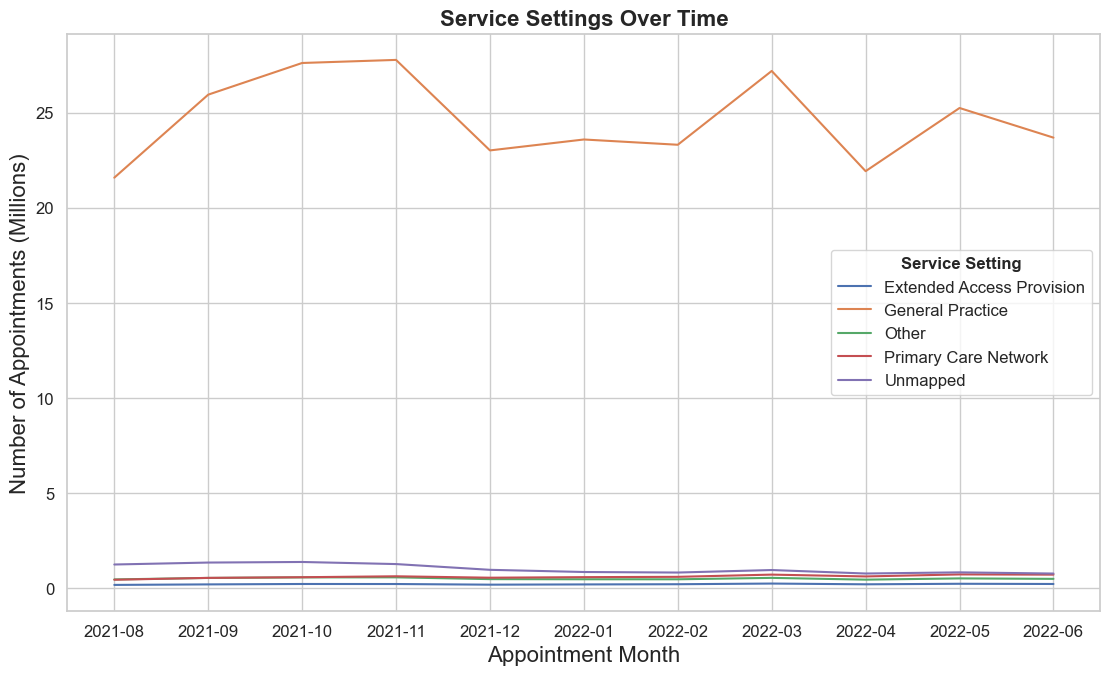

In [76]:
# Plot the appointments over the available date range, and review the service settings each month.
# Create a lineplot.

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', 
             data=nc_ss, ci=None)

# Set the title with increased size and bold font
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Settings Over Time", fontdict=title_font)

# Set the titles
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointments (Millions)")

# Set the legend title and place it center right of image
legend_font = {'size': 12}
legend = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1, 0.5), prop=legend_font)

# Bold the legend title
legend.get_title().set_fontweight('bold')

# Function to format the y-axis tick labels (move decimal point one place to the right)
def format_y_tick_label(value, _):
    return f"{value / 1000000:.0f}"  # Move the decimal point one place to the right

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick_label))

# Save the plot to a file (e.g., PNG)
# plt.savefig('service_setting_over_time.png', dpi=300, bbox_inches='tight')


In [77]:
# determine propotion of count of apointments in each value of the service setting column
grouped_data = nc.groupby("service_setting")["count_of_appointments"].sum()

# Calculate the total sum of "count_of_appointments" across all service settings
total_sum = grouped_data.sum()

# Calculate the proportion for each service setting
proportions = ((grouped_data / total_sum) * 100).round(2)

# Print the proportions
print(proportions)

service_setting
Extended Access Provision     0.74
General Practice             91.48
Other                         1.83
Primary Care Network          2.21
Unmapped                      3.74
Name: count_of_appointments, dtype: float64


### 5.1.2 Context types:

In [78]:
# Create a separate data set that can be used in future weeks. 
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ct.head()

appointment_month            context_type  count_of_appointments
0           2021-08  Care Related Encounter               20255235
1           2021-08    Inconsistent Mapping                2363093
2           2021-08                Unmapped                1233843
3           2021-09  Care Related Encounter               24404251
4           2021-09    Inconsistent Mapping                2782135

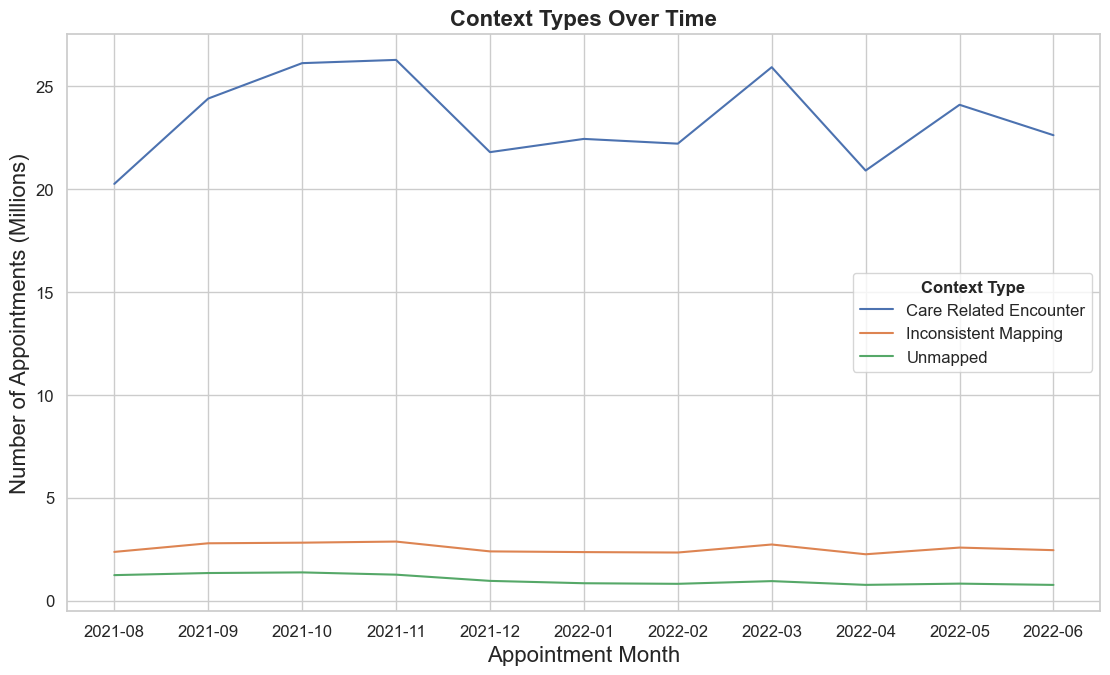

In [79]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', 
             data=nc_ct, ci=None)

# Set the title with increased size and bold font
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Context Types Over Time", fontdict=title_font)

# Set the titles
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointments (Millions)")

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend = plt.legend(title='Context Type', title_fontsize=12, loc='center right', bbox_to_anchor=(1, 0.5), prop=legend_font)

# Bold the legend title
legend.get_title().set_fontweight('bold')

# Function to format the y-axis tick labels (move decimal point one place to the right)
def format_y_tick_label(value, _):
    return f"{value / 1000000:.0f}"  # Move the decimal point one place to the right

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick_label))

# Save the plot to a file (e.g., PNG)
# plt.savefig('Context_Type_over_time.png', dpi=300, bbox_inches='tight')


In [80]:
# determine propotion of count of apointments in each value of the context_type column
grouped_data = nc.groupby("context_type")["count_of_appointments"].sum()

# Calculate the total sum of "count_of_appointments" across all context_type
total_sum = grouped_data.sum()

# Calculate the proportion for each context_type
proportions = ((grouped_data / total_sum) * 100).round(2)

# Print the proportions
print(proportions)

context_type
Care Related Encounter    86.84
Inconsistent Mapping       9.42
Unmapped                   3.74
Name: count_of_appointments, dtype: float64


### 5.1.3 National categories:

In [81]:
# Create a separate data set that can be used in future weeks. 
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()


# View output.
nc_nc.head()

appointment_month  \
0           2021-08   
1           2021-08   
2           2021-08   
3           2021-08   
4           2021-08   

                                                     national_category  \
0  Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                      Care Home Visit   
2                                                      Clinical Triage   
3                                           General Consultation Acute   
4                                         General Consultation Routine   

   count_of_appointments  
0                  29676  
1                  47583  
2                3704207  
3                4280920  
4                7756045

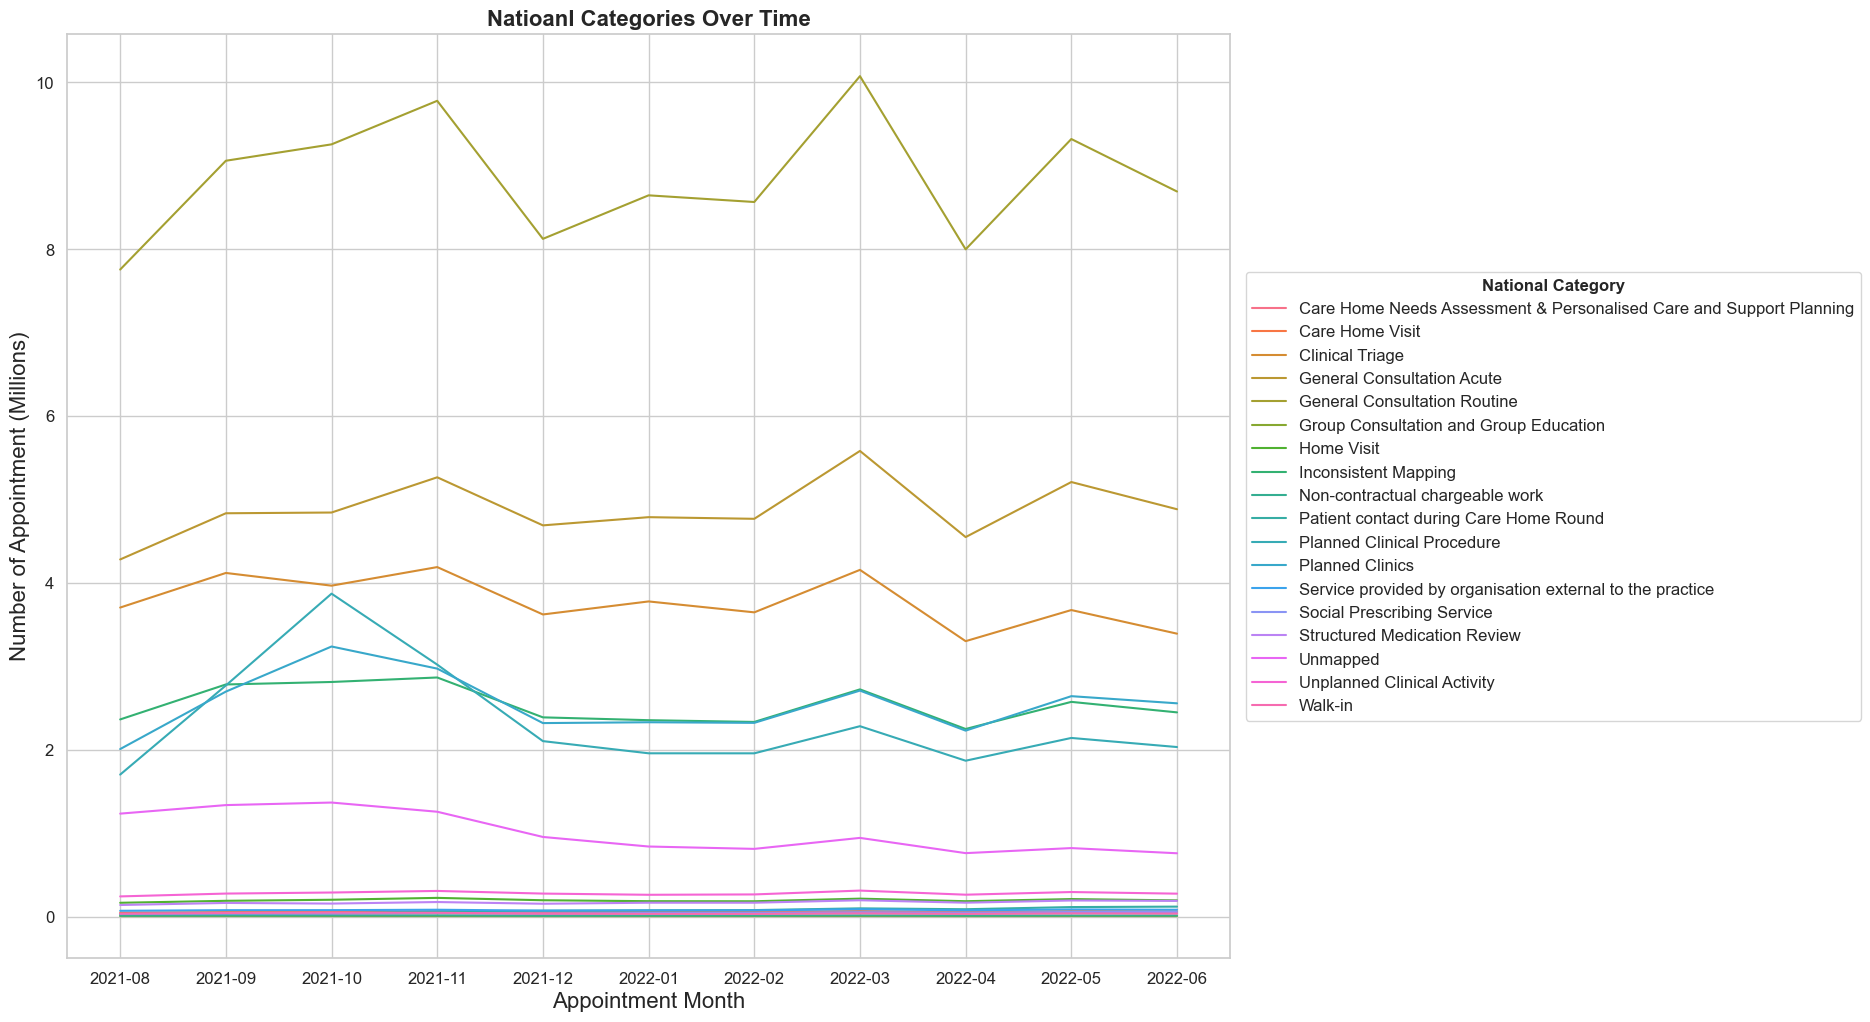

In [82]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
plt.figure(figsize=(15, 12))

sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', 
             data=nc_nc, ci=None)

# Set the title with increased size and bold font
title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Natioanl Categories Over Time", fontdict=title_font)

# Set the titles
plt.xlabel("Appointment Month")
plt.ylabel("Number of Appointment (Millions)")

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend = plt.legend(title='National Category', title_fontsize=12, loc='center right', bbox_to_anchor=(1.55, 0.5), prop=legend_font)

# Bold the legend title
legend.get_title().set_fontweight('bold')

# Function to format the y-axis tick labels (move decimal point one place to the right)
def format_y_tick_label(value, _):
    return f"{value / 1000000:.0f}"  # Move the decimal point one place to the right

# Apply the custom formatter to the y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_tick_label))


In [83]:
# determine propotion of count of apointments in each value of the national_category column
grouped_data = nc.groupby("national_category")["count_of_appointments"].sum()

# Calculate the total sum of "count_of_appointments" across all national_category
total_sum = grouped_data.sum()

# Calculate the proportion for each national_category
proportions = ((grouped_data / total_sum) * 100).round(2)

# Print the proportions
print(proportions)

national_category
Care Home Needs Assessment & Personalised Care and Support Planning     0.14
Care Home Visit                                                         0.21
Clinical Triage                                                        14.03
General Consultation Acute                                             18.14
General Consultation Routine                                           32.86
Group Consultation and Group Education                                  0.02
Home Visit                                                              0.72
Inconsistent Mapping                                                    9.42
Non-contractual chargeable work                                         0.05
Patient contact during Care Home Round                                  0.27
Planned Clinical Procedure                                              8.68
Planned Clinics                                                         9.46
Service provided by organisation external to the practice 

__Monthly Trends__ <br>
1. __Service Settings:__ General Practice by far the highest number of appointments. Quite a steady increase from 08-2021 to 10-2021 but then begin decline. All others hover very low between 100,000 appointments. 
2. __Context Types:__ Care Related Encounters by far the highest number of appointments. Quite a steady increase from 08-2021 to 10-2021 but then started to decline in line with service settings. All others hover very low between 3 milion appointments. 
3. __National Categories:__ Similar trend over time seen with Service Settings General Practice and Context Types Care Related Encounters, particularly the highest occuring national categories such a general consultation routine general consultation acute and Clinical Triage. 

All three categories follow a similar trend of an increase in appointments in the winter months building up towards the end of the year with a sharp decline in January which then plateaus out except a increase in the number of appointments in March of 2022. 

## 5.2 Objective 2
Create four visualisations indicating the __number of appointments for service setting per season__. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

### 5.2.1 Summer (August 2021):

In [84]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day = nc.groupby(['appointment_date', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View output.
nc_ss_day.head()

appointment_date            service_setting  count_of_appointments
0       2021-08-01  Extended Access Provision                    438
1       2021-08-01           General Practice                   3411
2       2021-08-01                      Other                    401
3       2021-08-01       Primary Care Network                    323
4       2021-08-01                   Unmapped                   1054

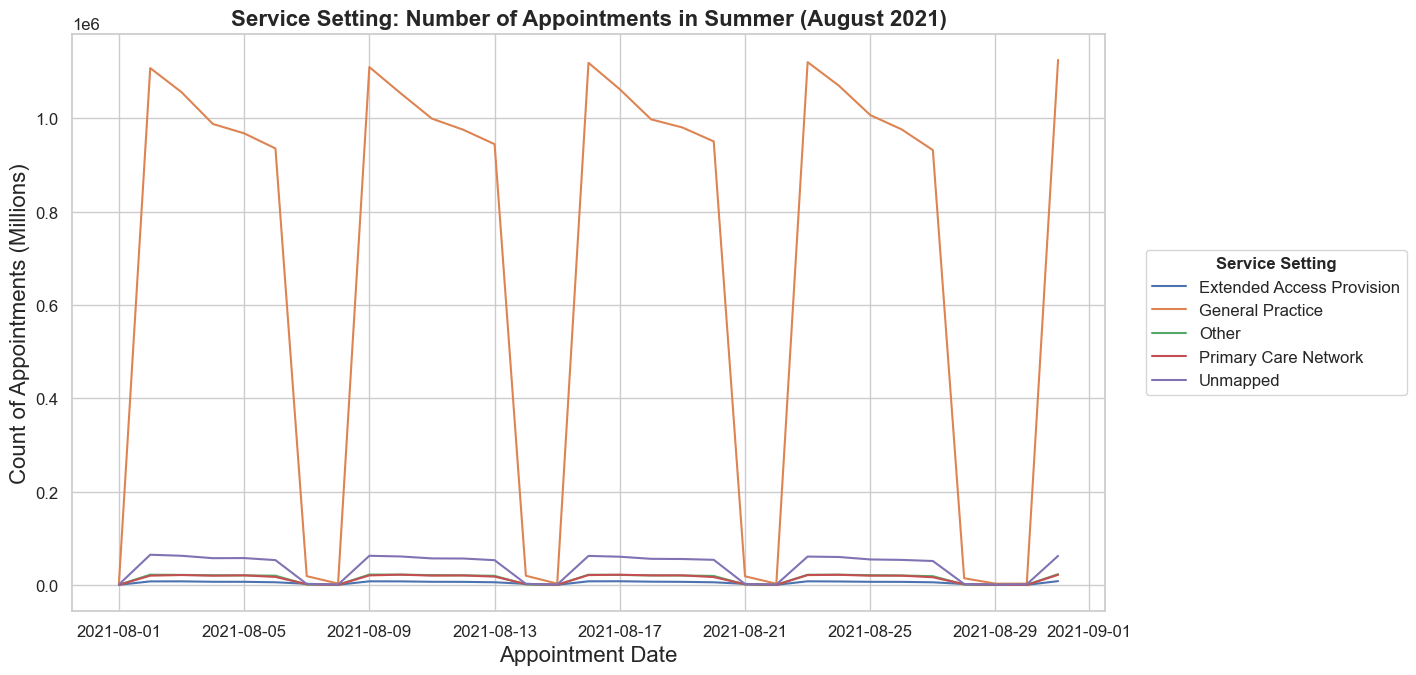

In [85]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.

# Filter the data for August 2021
nc_ss_day_aug21 = nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-08-01') & (nc_ss_day['appointment_date'] <= '2021-08-31')]

# Create Lineplot
sns.lineplot(data=nc_ss_day_aug21, x='appointment_date', y='count_of_appointments', hue='service_setting')

title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Setting: Number of Appointments in Summer (August 2021)", fontdict=title_font)

# Set the x and y-axis labels
plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments (Millions)")

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend_nc_ss_day = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1.30, 0.5), prop=legend_font)

# Bold the legend title
legend_nc_ss_day.get_title().set_fontweight('bold')

# Save the plot to a file (e.g., PNG)
# plt.savefig('Service_setting_Summer.png', dpi=300, bbox_inches='tight')


### 5.2.2: Autumn (October 2021): 

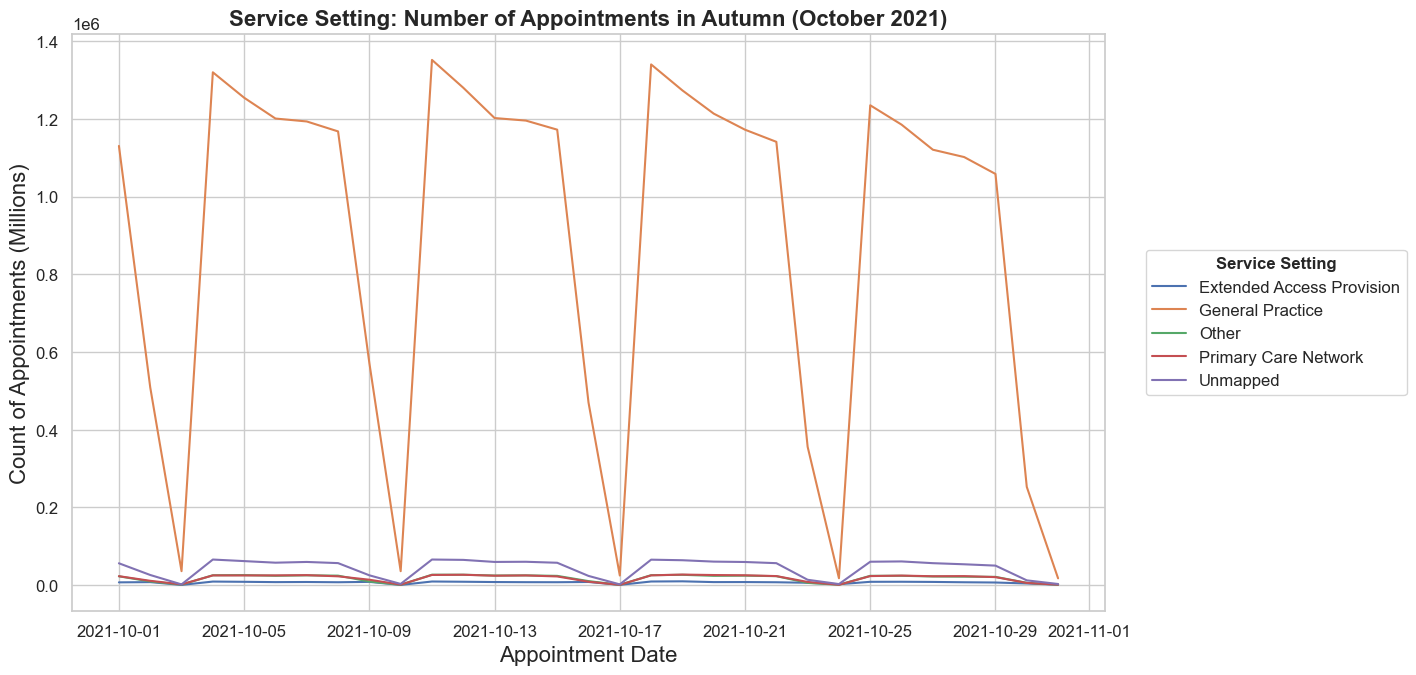

In [86]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.
# Filter the data for October 2021
nc_ss_day_oct21 = nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-10-01') & (nc_ss_day['appointment_date'] <= '2021-10-31')]

# Create Lineplot
sns.lineplot(data=nc_ss_day_oct21, x='appointment_date', y='count_of_appointments', hue='service_setting')

title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Setting: Number of Appointments in Autumn (October 2021)", fontdict=title_font)

# Set the x and y-axis labels
plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments (Millions)")

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend_nc_ss_day = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1.30, 0.5), prop=legend_font)

# Bold the legend title
legend_nc_ss_day.get_title().set_fontweight('bold')


### 5.2.3: Winter (January 2022):

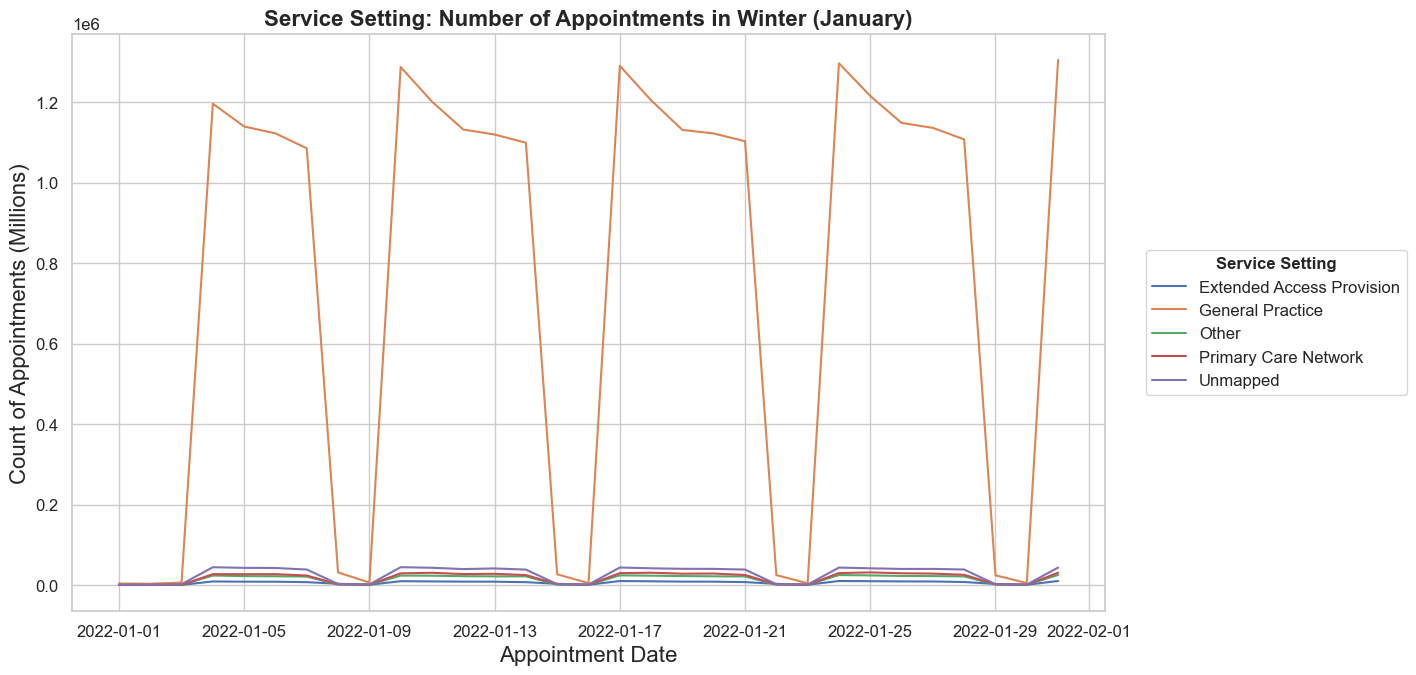

In [87]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.
# Filter the data for January 2022
nc_ss_day_jan22 = nc_ss_day[(nc_ss_day['appointment_date'] >= '2022-01-01') & (nc_ss_day['appointment_date'] <= '2022-01-31')]

# Create Lineplot
sns.lineplot(data=nc_ss_day_jan22, x='appointment_date', y='count_of_appointments', hue='service_setting')

title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Setting: Number of Appointments in Winter (January)", fontdict=title_font)

# Set the x and y-axis labels
plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments (Millions)")

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend_nc_ss_day = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1.3, 0.5), prop=legend_font)

# Bold the legend title
legend_nc_ss_day.get_title().set_fontweight('bold')


### 5.2.4: Spring (April 2022):

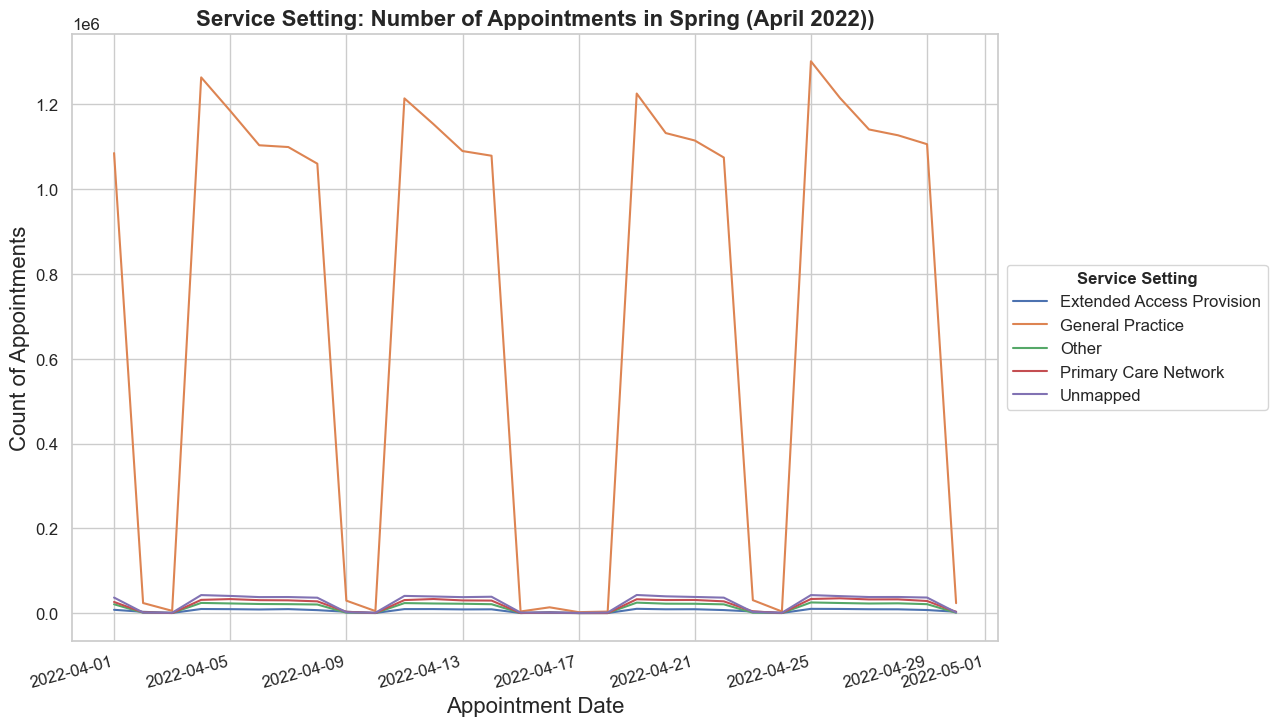

In [88]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.
# Filter the data for April 2022
nc_ss_day_apr22 = nc_ss_day[(nc_ss_day['appointment_date'] >= '2022-04-01') & (nc_ss_day['appointment_date'] <= '2022-04-30')]

# Create Lineplot
sns.lineplot(data=nc_ss_day_apr22, x='appointment_date', y='count_of_appointments', hue='service_setting')

title_font = {'fontsize': 16, 'fontweight': 'bold'}
plt.title("Service Setting: Number of Appointments in Spring (April 2022))", fontdict=title_font)

# Set the x and y-axis labels
plt.xlabel("Appointment Date")
plt.ylabel("Count of Appointments")

# Rotate x-axis labels
plt.xticks(rotation=15, ha='right')

# Set the legend title and make it longer vertically
legend_font = {'size': 12}
legend_nc_ss_day = plt.legend(title='Service Setting', title_fontsize=12, loc='center right', bbox_to_anchor=(1.3, 0.5), prop=legend_font)

# Bold the legend title
legend_nc_ss_day.get_title().set_fontweight('bold')

# prevent overlapping
plt.tight_layout()


### Trends in aggregated monthly and seasonal visualisations.

The initial stage of the analysis help contributes to answering the business problem as it allows use to begin to piece together get a better overview of the number of daily, weekly and monthly appointments to gauge capacity and resource utilisation as seen in the following section. 

__Seasonal Variations__<br>
- Very similar trend in all seasons with the highest appointments for General Practice. Number of appointments are cyclycal, dependant on the day of the week. 
    -  __General Practce:__ There are a very high number of appointments earlier in the week from Monday onwards which then decreases slightly towards the end of the working week (friday), then sharp decline on sat (Less than 10,000 appointments for GP), with minimal appointments on Sunday (less than 10,000 apointments for GP).
    - __Remaining Service Settings:__ The number of appointments tend to stay relatively consistent throughout the working week (monday - Friday). Similar to the weekly cycle for GP, there is a sharp decline for saturday which fall further on Sunday.

#

# 6. Findings and Recomendations

### Investigate the main concerns posed by the NHS. 

In [89]:
# Prepare your workstation.
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import seaborn as sns

# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the DataFrame.
display(ar)

icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000034           2020-01           Attended       GP   
1         E54000034           2020-01           Attended       GP   
2         E54000034           2020-01           Attended       GP   
3         E54000034           2020-01           Attended       GP   
4         E54000034           2020-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
0                        8107  
1                        6791  
2                       20686  
3                        4268  
4                       11971  
...                       ...  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10  

[596821 rows x 7 columns]

In [90]:
# Print the min and max dates.
print(f"Earliest Month in Appointments Regional Data Set:", ar.appointment_month.min())
print(f"Latest Month in Appointments Regional Data Set:", ar.appointment_month.max())

Earliest Month in Appointments Regional Data Set: 2020-01
Latest Month in Appointments Regional Data Set: 2022-06


In [91]:
# Ensure the appointment_month column is a datetime format
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# Filter the data set to only look at data from 2021-08 onwards.
filtered_ar = ar[ar['appointment_month'] >= '2021-08']

# display filtered data
filtered_ar

icb_ons_code appointment_month appointment_status hcp_type  \
3652      E54000034        2021-08-01           Attended       GP   
3653      E54000034        2021-08-01           Attended       GP   
3654      E54000034        2021-08-01           Attended       GP   
3655      E54000034        2021-08-01           Attended       GP   
3656      E54000034        2021-08-01           Attended       GP   
...             ...               ...                ...      ...   
596816    E54000050        2022-06-01            Unknown  Unknown   
596817    E54000050        2022-06-01            Unknown  Unknown   
596818    E54000050        2022-06-01            Unknown  Unknown   
596819    E54000050        2022-06-01            Unknown  Unknown   
596820    E54000050        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
3652       Face-to-Face                             1 Day   
3653       Face-to-Face                    15  to 21 Days   
3654       Face-to-Face                       2 to 7 Days   
3655       Face-to-Face                    22  to 28 Days   
3656       Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments  
3652                     6553  
3653                     2390  
3654                    10547  
3655                      937  
3656                     4961  
...                       ...  
596816                     21  
596817                      8  
596818                     28  
596819                     17  
596820                     10  

[223418 rows x 7 columns]

## 6.1 Question 1: Should the NHS start looking at increasing staff levels? 

In [92]:
# Create an aggregated data set to review the different features for the full time period
ar_agg_full = ar

ar_agg_full_grouped = ar.groupby(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type', 'appointment_mode', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_agg_full_grouped

icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000008        2020-01-01           Attended       GP   
1         E54000008        2020-01-01           Attended       GP   
2         E54000008        2020-01-01           Attended       GP   
3         E54000008        2020-01-01           Attended       GP   
4         E54000008        2020-01-01           Attended       GP   
...             ...               ...                ...      ...   
295687    E54000062        2022-06-01            Unknown  Unknown   
295688    E54000062        2022-06-01            Unknown  Unknown   
295689    E54000062        2022-06-01            Unknown  Unknown   
295690    E54000062        2022-06-01            Unknown  Unknown   
295691    E54000062        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
295687          Unknown                       2 to 7 Days   
295688          Unknown                    22  to 28 Days   
295689          Unknown                     8  to 14 Days   
295690          Unknown                 More than 28 Days   
295691          Unknown                          Same Day   

        count_of_appointments  
0                       32181  
1                       23190  
2                       83788  
3                       16172  
4                       53405  
...                       ...  
295687                     58  
295688                     20  
295689                     67  
295690                     13  
295691                      7  

[295692 rows x 7 columns]

In [93]:
# Create an aggregated data set to review the different features for the time period 2021-08 onwards.
ar_agg = filtered_ar

ar_agg_grouped = ar_agg.groupby(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type', 'appointment_mode', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# View the DataFrame.
ar_agg_grouped

icb_ons_code appointment_month appointment_status hcp_type  \
0         E54000008        2021-08-01           Attended       GP   
1         E54000008        2021-08-01           Attended       GP   
2         E54000008        2021-08-01           Attended       GP   
3         E54000008        2021-08-01           Attended       GP   
4         E54000008        2021-08-01           Attended       GP   
...             ...               ...                ...      ...   
108973    E54000062        2022-06-01            Unknown  Unknown   
108974    E54000062        2022-06-01            Unknown  Unknown   
108975    E54000062        2022-06-01            Unknown  Unknown   
108976    E54000062        2022-06-01            Unknown  Unknown   
108977    E54000062        2022-06-01            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
0          Face-to-Face                             1 Day   
1          Face-to-Face                    15  to 21 Days   
2          Face-to-Face                       2 to 7 Days   
3          Face-to-Face                    22  to 28 Days   
4          Face-to-Face                     8  to 14 Days   
...                 ...                               ...   
108973          Unknown                       2 to 7 Days   
108974          Unknown                    22  to 28 Days   
108975          Unknown                     8  to 14 Days   
108976          Unknown                 More than 28 Days   
108977          Unknown                          Same Day   

        count_of_appointments  
0                       28360  
1                        6345  
2                       45744  
3                        3061  
4                       14940  
...                       ...  
108973                     58  
108974                     20  
108975                     67  
108976                     13  
108977                      7  

[108978 rows x 7 columns]

In [94]:
# Determine the total number of appointments per month.
# Group by 'appointment_month' and calculate the sum of 'count_of_appointments'.
ar_df = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['average_utilisation'] = (ar_df['count_of_appointments'] / 30).round(1)

# View the DataFrame.
ar_df

appointment_month  count_of_appointments  average_utilisation
0         2021-08-01               23852171             795072.4
1         2021-09-01               28522501             950750.0
2         2021-10-01               30303834            1010127.8
3         2021-11-01               30405070            1013502.3
4         2021-12-01               25140776             838025.9
5         2022-01-01               25635474             854515.8
6         2022-02-01               25355260             845175.3
7         2022-03-01               29595038             986501.3
8         2022-04-01               23913060             797102.0
9         2022-05-01               27495508             916516.9
10        2022-06-01               25828078             860935.9

__Assuming 30 days a month__, where everyday of everyweek is utlised. Although this does not account for the fact that very few appointments occur on Saturdays and Sundays so 20 - 24 days may be a more realistic number of "utilised" days, which would push many months close to or over 100% capacity (see below).

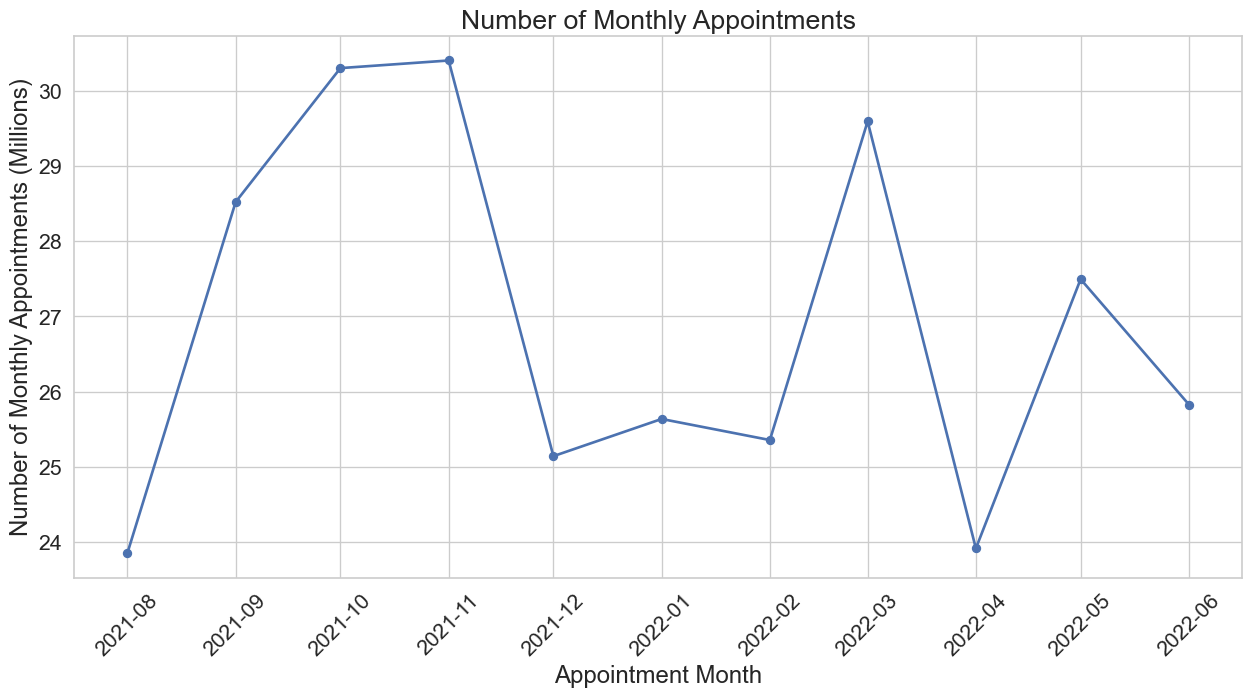

In [95]:
# Plot sum of count of monthly visits.
# Convert 'appointment_month' to datetime format
ar_df['appointment_month'] = pd.to_datetime(ar_df['appointment_month'])

# Create a lineplot.
plt.figure(figsize=(13.33,7.5), dpi=96)
plt.plot(ar_df['appointment_month'], ar_df['count_of_appointments'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Appointment Month', fontsize=18)
plt.ylabel('Number of Monthly Appointments (Millions)', fontsize=18)
plt.title('Number of Monthly Appointments', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

# Move the decimal place of y-axis ticks two places to the left.
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1000000)))

# Save the plot to a file (e.g., PNG)
# plt.savefig('Monthly_number_of_appointments_short.png', dpi=300, bbox_inches='tight')

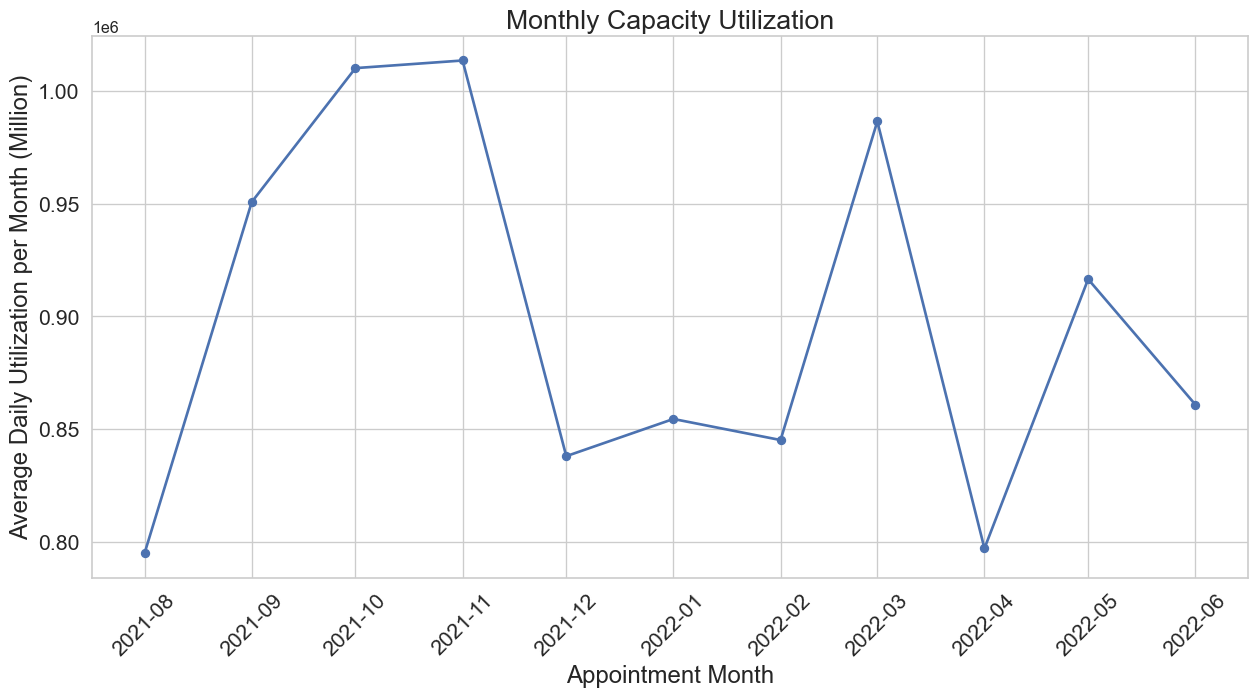

In [96]:
# Plot monthly capacity utilisation.
plt.figure(figsize=(13.33,7.5), dpi=96)

# Create a lineplot.
plt.plot(ar_df['appointment_month'], ar_df['average_utilisation'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Appointment Month', fontsize=18)
plt.ylabel('Average Daily Utilization per Month (Million)', fontsize=18)
plt.title('Monthly Capacity Utilization', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

# Display the line plot.
plt.show()

In [97]:
# plot daily utilisation as a percentage of maximum. 
# The NHS can accomodate a maximum of 1,200,000 appointments per day.
# Average Daily Utilisation / 1,200,000 to get Daily Utilisation as a percentage of maximum.
ar_df['daily_utilisation'] = (ar_df['average_utilisation'] / 1200000).round(2)

# view outcome if the number of utilised days is changed to 24 (6 days a week) 
# Where monthly aggregate / 24 to get to a daily value.
ar_df['average_utilisation_24_days'] = (ar_df['count_of_appointments'] / 24).round(1)
ar_df['daily_utilisation_24_days'] = (ar_df['average_utilisation_24_days'] / 1200000).round(2)

# View the DataFrame.
ar_df

appointment_month  count_of_appointments  average_utilisation  \
0         2021-08-01               23852171             795072.4   
1         2021-09-01               28522501             950750.0   
2         2021-10-01               30303834            1010127.8   
3         2021-11-01               30405070            1013502.3   
4         2021-12-01               25140776             838025.9   
5         2022-01-01               25635474             854515.8   
6         2022-02-01               25355260             845175.3   
7         2022-03-01               29595038             986501.3   
8         2022-04-01               23913060             797102.0   
9         2022-05-01               27495508             916516.9   
10        2022-06-01               25828078             860935.9   

    daily_utilisation  average_utilisation_24_days  daily_utilisation_24_days  
0                0.66                     993840.5                       0.83  
1                0.79                    1188437.5                       0.99  
2                0.84                    1262659.8                       1.05  
3                0.84                    1266877.9                       1.06  
4                0.70                    1047532.3                       0.87  
5                0.71                    1068144.8                       0.89  
6                0.70                    1056469.2                       0.88  
7                0.82                    1233126.6                       1.03  
8                0.66                     996377.5                       0.83  
9                0.76                    1145646.2                       0.95  
10               0.72                    1076169.9                       0.90

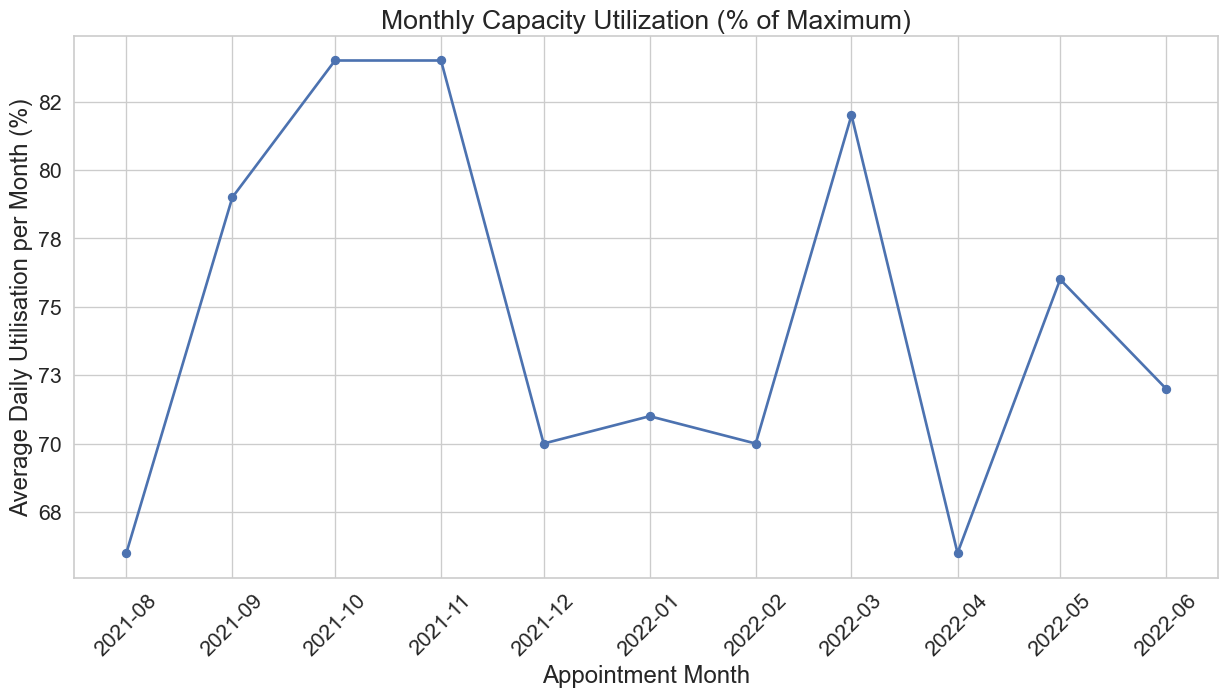

In [98]:
# Plot Daily Utilisation as a percentage of maximum.

# Create a lineplot.
plt.figure(figsize=(13.33,7.5), dpi=96)
plt.plot(ar_df['appointment_month'], ar_df['daily_utilisation'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Appointment Month', fontsize=18)
plt.ylabel('Average Daily Utilisation per Month (%)', fontsize=18)
plt.title('Monthly Capacity Utilization (% of Maximum)', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

# Move the decimal place of y-axis ticks two places to the right.
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x*100)))

# Save the plot to a file (e.g., PNG)
# plt.savefig('Monthly_Capacity_Utilization_short.png', dpi=300, bbox_inches='tight')

# Display the line plot.
plt.show()

#### Determine Monthy Capacity for the Full Time Period

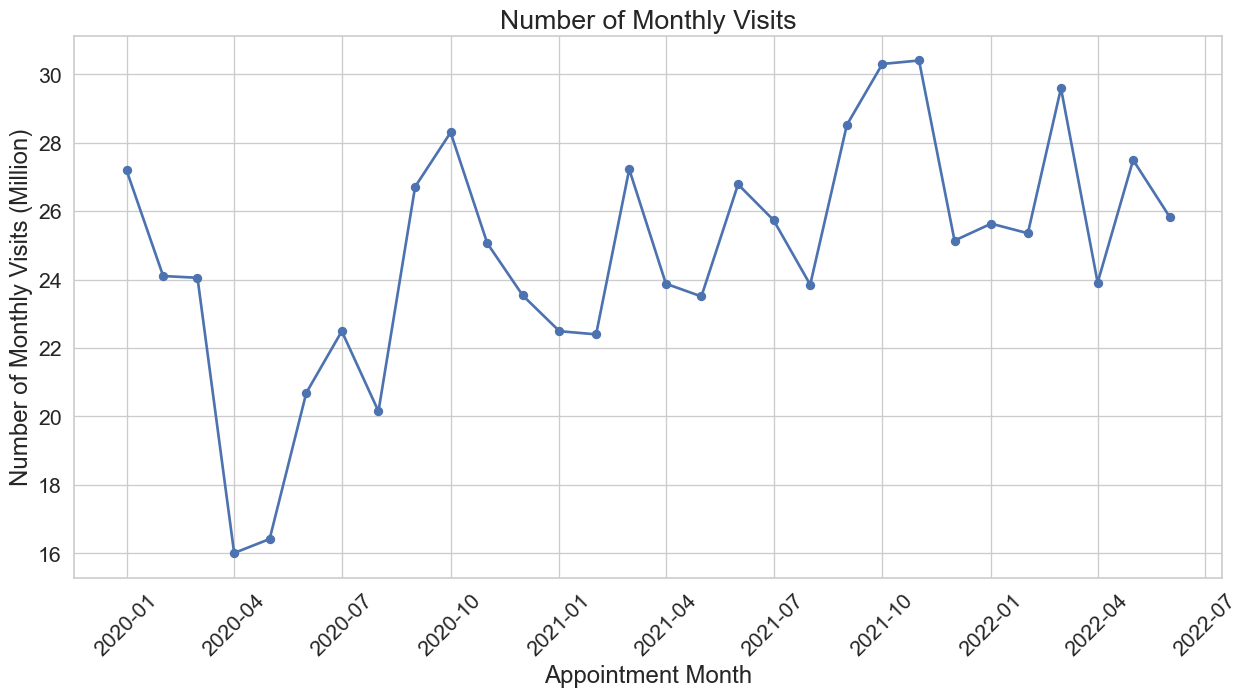

In [99]:
# Group by 'appointment_month' and calculate the sum of 'count_of_appointments'.
ar_df_full = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Convert the appointment_month to string data type for ease of visualisation.
ar_df_full['appointment_month'] = ar_df_full['appointment_month'].astype(str)

# Convert 'appointment_month' to datetime format
ar_df_full['appointment_month'] = pd.to_datetime(ar_df_full['appointment_month'])

# Create a lineplot.
plt.figure(figsize=(13.33,7.5), dpi=96)
plt.plot(ar_df_full['appointment_month'], ar_df_full['count_of_appointments'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Appointment Month', fontsize=18)
plt.ylabel('Number of Monthly Visits (Million)', fontsize=18)
plt.title('Number of Monthly Visits', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

# Change the Y axis values to million 
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x/1000000)))

# Display the line plot.
plt.show()

In [100]:
# Determine the total number of appointments per month.

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df_full['average_utilisation'] = (ar_df_full['count_of_appointments'] / 30).round(1)

# plot daily utilisation as a percentage of maximum. 
ar_df_full['daily_utilisation'] = (ar_df_full['average_utilisation'] / 1200000).round(2)

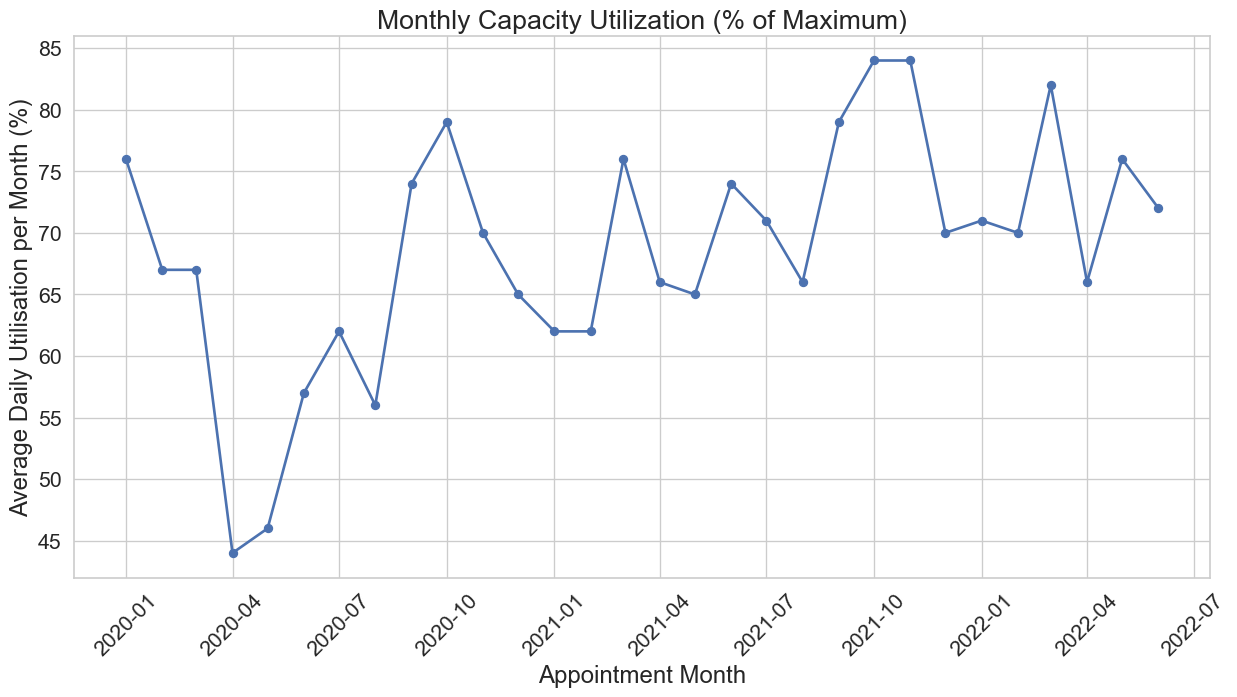

In [101]:
# Plot Daily Utilisation as a percentage of maximum.

# Create a lineplot.
plt.figure(figsize=(13.33,7.5), dpi=96)
plt.plot(ar_df_full['appointment_month'], ar_df_full['daily_utilisation'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Appointment Month', fontsize=18)
plt.ylabel('Average Daily Utilisation per Month (%)', fontsize=18)
plt.title('Monthly Capacity Utilization (% of Maximum)', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

# Move the decimal place of y-axis ticks two places to the right.
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x*100)))

# Display the line plot.
plt.show()

# Save the plot to a file (e.g., PNG)
# plt.savefig('Monthly_Capacity_Utilization_full.png', dpi=300, bbox_inches='tight')

In [102]:
# Determine capacity utilisation if 24 utilised days per month

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df_full['average_utilisation'] = (ar_df_full['count_of_appointments'] / 24).round(1)

# plot daily utilisation as a percentage of maximum. 
ar_df_full['daily_utilisation'] = (ar_df_full['average_utilisation'] / 1200000).round(2)

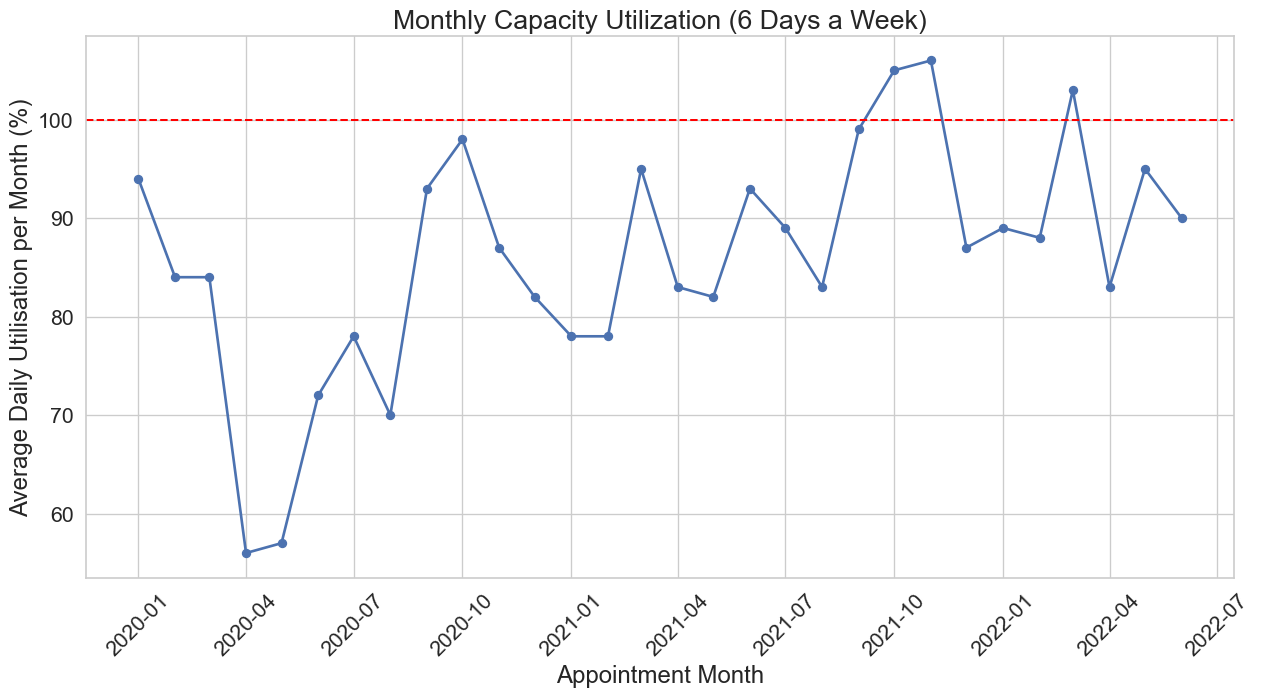

In [103]:
# Plot Daily Utilisation as a percentage of maximum.

# Create a lineplot.
plt.figure(figsize=(13.33,7.5), dpi=96)
plt.plot(ar_df_full['appointment_month'], ar_df_full['daily_utilisation'], marker='o', linestyle='-', linewidth=2)
plt.xlabel('Appointment Month', fontsize=18)
plt.ylabel('Average Daily Utilisation per Month (%)', fontsize=18)
plt.title('Monthly Capacity Utilization (6 Days a Week)', fontsize=20)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.tight_layout()

# Move the decimal place of y-axis ticks two places to the right.
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x*100)))

# Add a red dashed line at 100% across the y-axis.
plt.axhline(y=1, color='red', linestyle='--')

# Save the plot to a file (e.g., PNG)
# plt.savefig('Monthly_Capacity_Utilization_full_6 days.png', dpi=300, bbox_inches='tight')

## 6.2 Question 2: How do the healthcare professional types differ over time?

In [104]:
# Create a line plot to answer the question.
# View unique values in the 'hcp_type' column.
unique_hcp_types = ar['hcp_type'].unique()
print(unique_hcp_types)

['GP' 'Other Practice staff' 'Unknown']


#### For Entire Time Frame

In [105]:
# Select and group the relevant columns
ar_hcp = ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Display the table data
display(ar_hcp)

appointment_month              hcp_type  count_of_appointments
0         2020-01-01                    GP               14168932
1         2020-01-01  Other Practice staff               12326031
2         2020-01-01               Unknown                 704333
3         2020-02-01                    GP               12467976
4         2020-02-01  Other Practice staff               11002550
..               ...                   ...                    ...
85        2022-05-01  Other Practice staff               12823200
86        2022-05-01               Unknown                 878374
87        2022-06-01                    GP               12893983
88        2022-06-01  Other Practice staff               12105677
89        2022-06-01               Unknown                 828418

[90 rows x 3 columns]

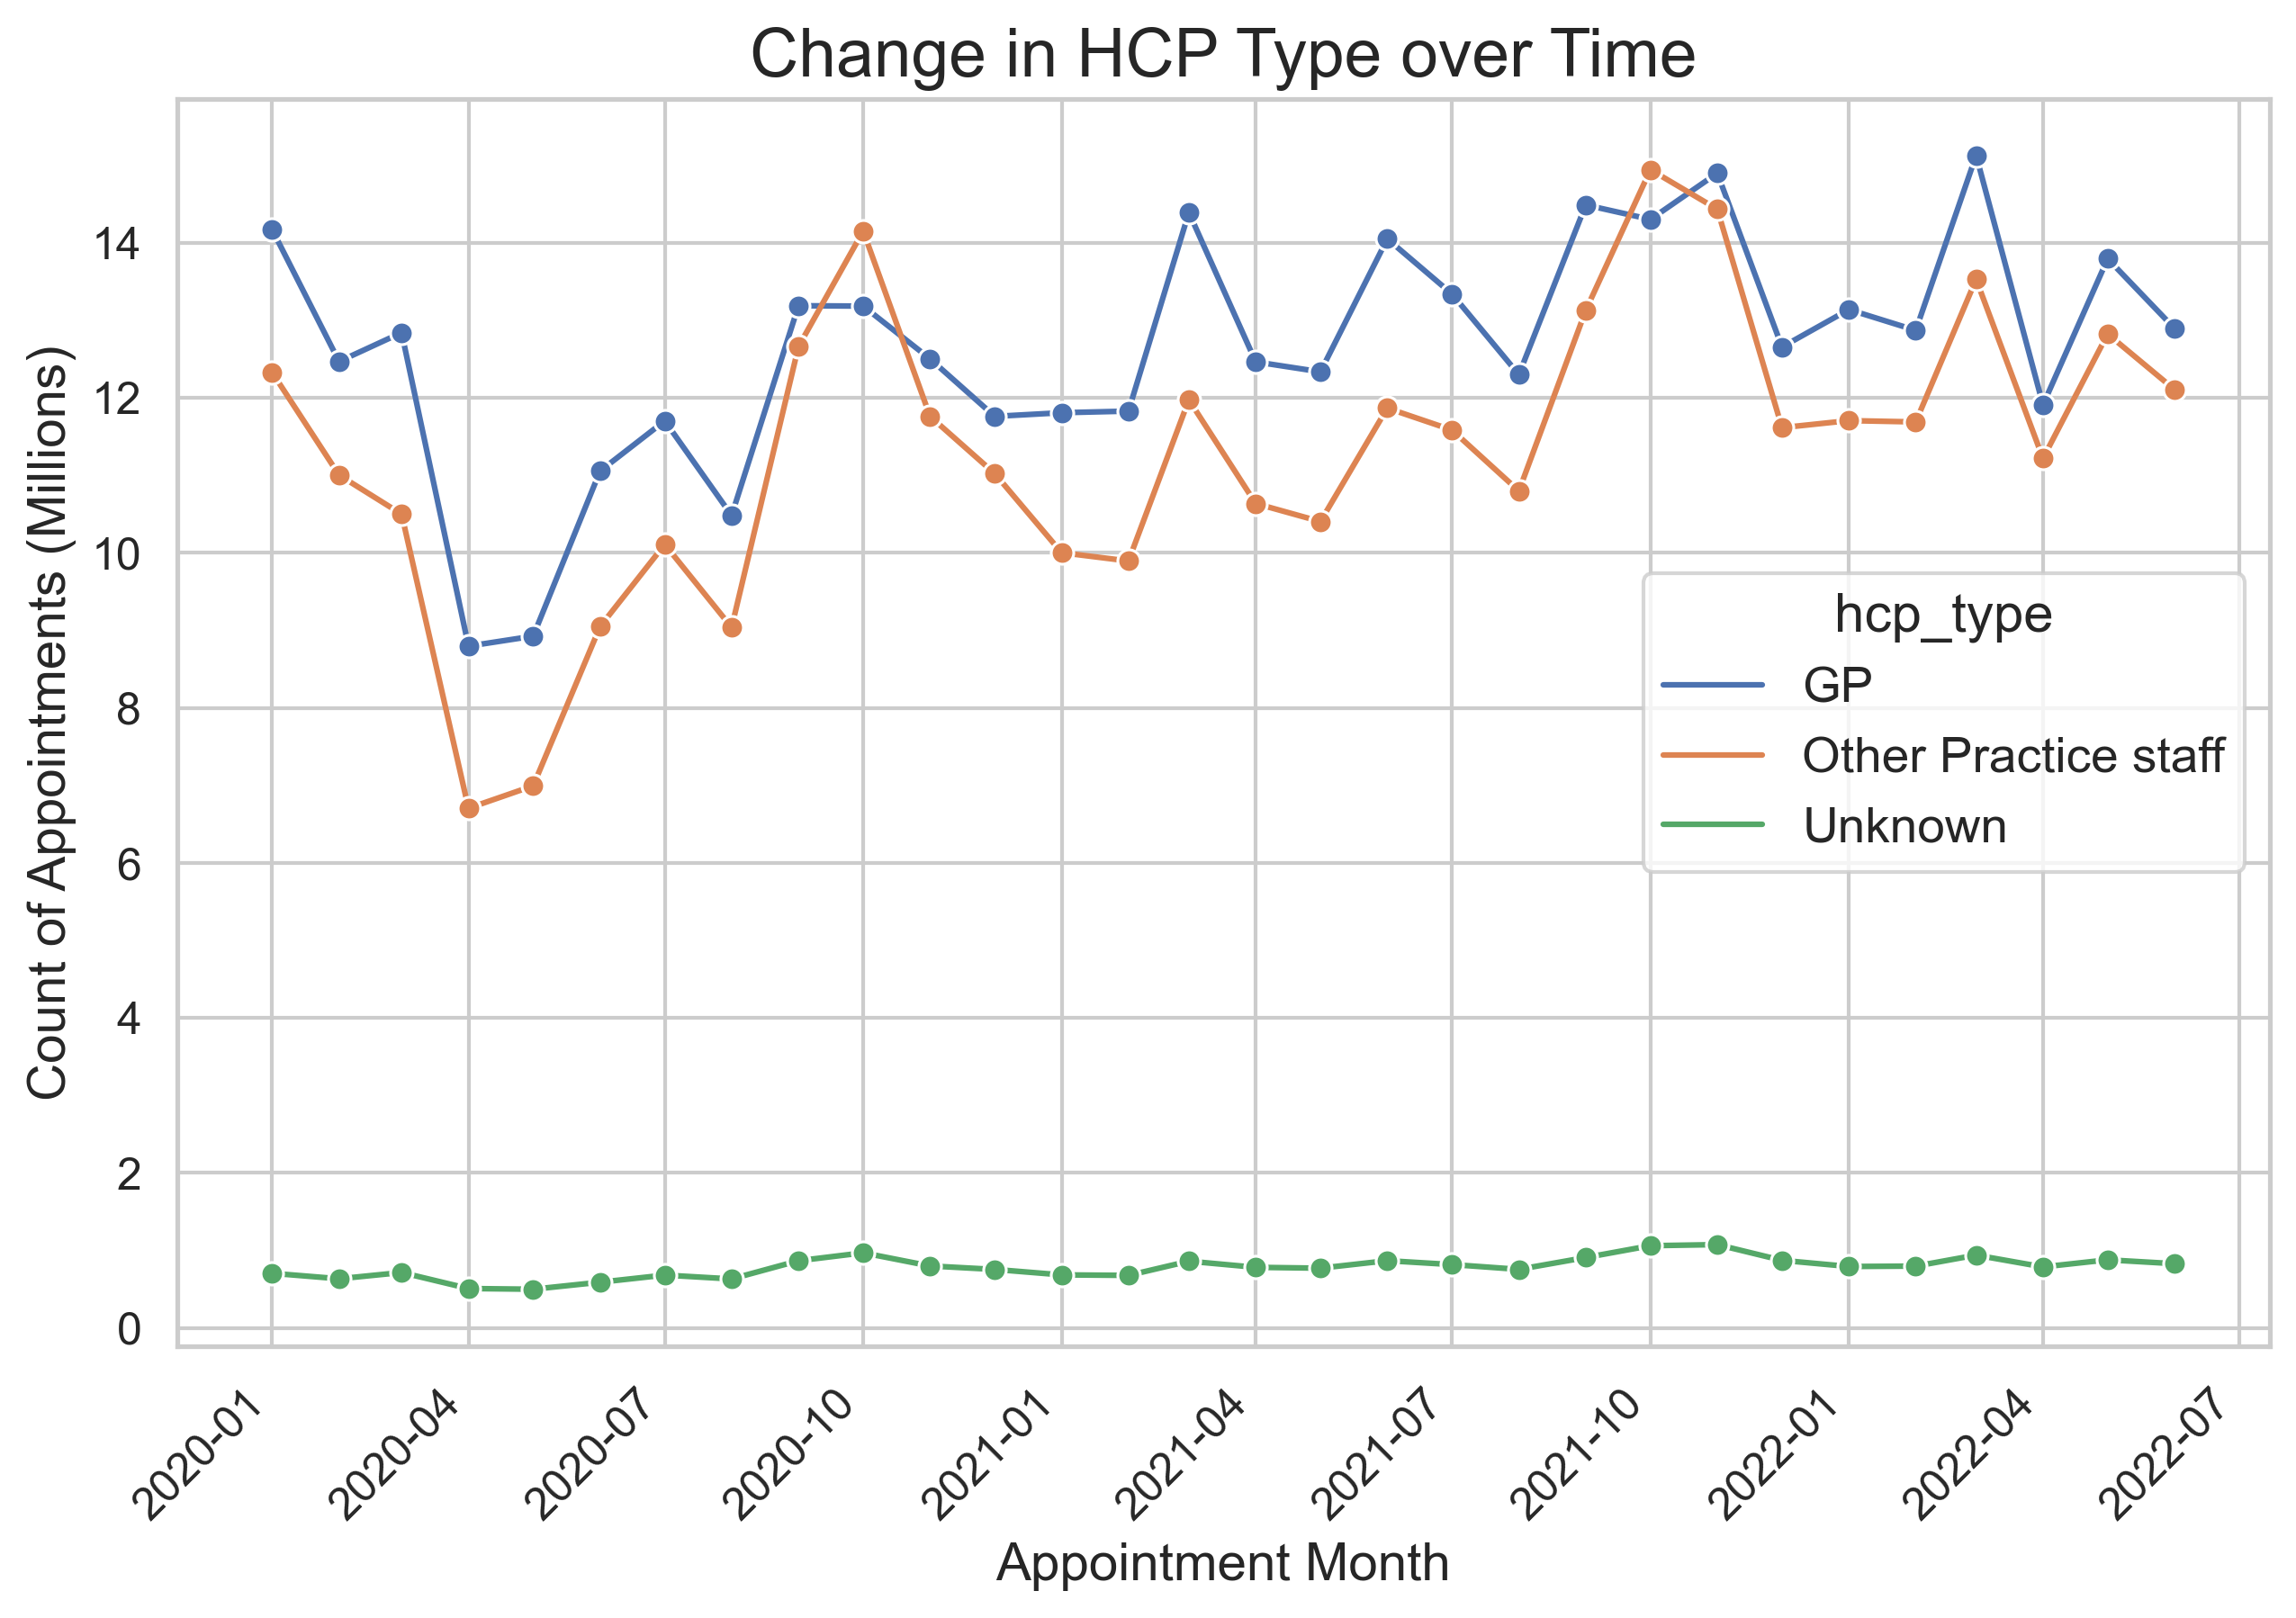

In [106]:
# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot using Seaborn.
sns.lineplot(data=ar_hcp, x='appointment_month', y='count_of_appointments', hue='hcp_type', marker='o', ci=None)

# Customize the plot (titles, labels, etc.).
plt.xlabel('Appointment Month' ,fontsize=14)
plt.ylabel('Count of Appointments (Millions)' ,fontsize=14)
plt.title('Change in HCP Type over Time' ,fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot.
plt.grid(True)

# Modify the Y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1000000)))

# Save the plot to a file (e.g., PNG) if you want to use it in PowerPoint.
# plt.savefig('hcp_type_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot (optional if you just want to save it to a file).
plt.show()

#### For the Time Frame in Question 2021-08 &rarr; 2022-06

In [107]:
# Select and group the relevant columns
ar_hcp_filtered = filtered_ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Display the table data
ar_hcp_filtered.head()

appointment_month              hcp_type  count_of_appointments
0        2021-08-01                    GP               12299022
1        2021-08-01  Other Practice staff               10797821
2        2021-08-01               Unknown                 755328
3        2021-09-01                    GP               14487785
4        2021-09-01  Other Practice staff               13126731

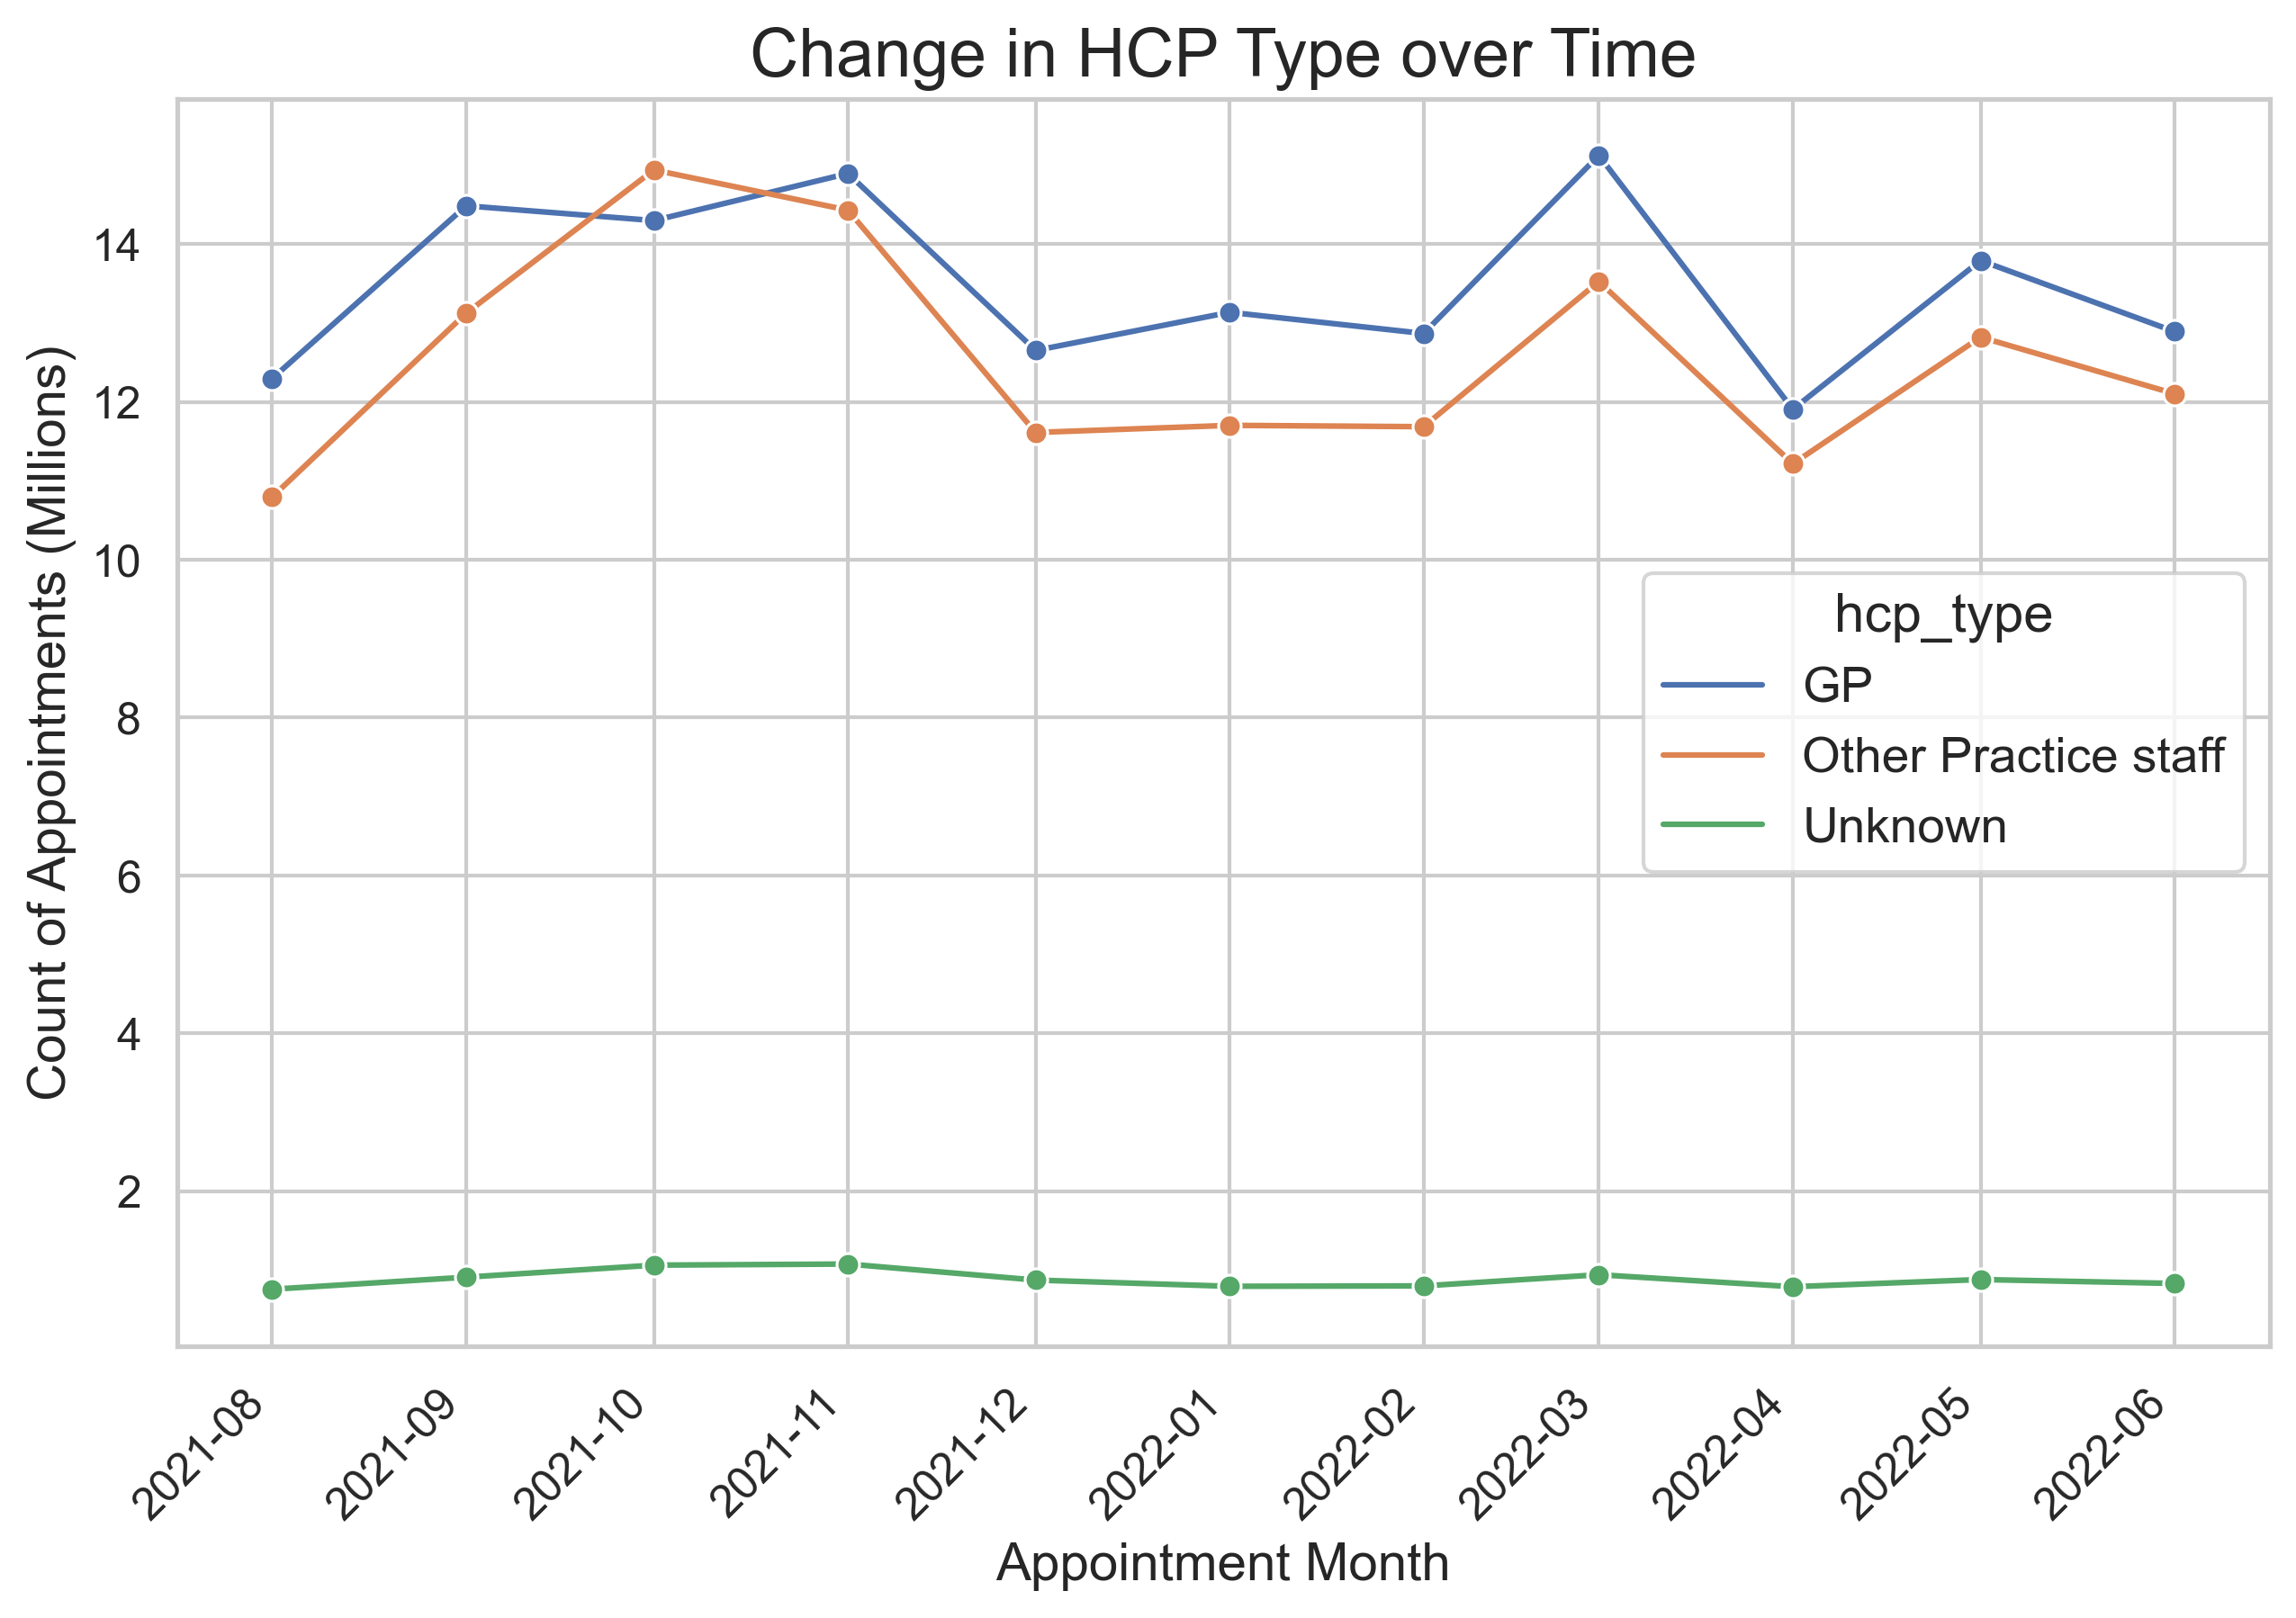

In [108]:
# for filtered ar 
# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot using Seaborn.
sns.lineplot(data=ar_hcp_filtered, x='appointment_month', y='count_of_appointments', hue='hcp_type', marker='o', ci=None)

# Customize the plot (titles, labels, etc.).
plt.xlabel('Appointment Month' ,fontsize=14)
plt.ylabel('Count of Appointments (Millions)' ,fontsize=14)
plt.title('Change in HCP Type over Time' ,fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot.
plt.grid(True)

# Modify the Y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1000000)))

# Save the plot to a file (e.g., PNG) if you want to use it in PowerPoint.
# plt.savefig('hcp_type_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot (optional if you just want to save it to a file).
plt.show()

#### Create a 100% Stacked Bar Chart to Compare HCP Types Over Time

<Figure size 3000x1800 with 0 Axes>

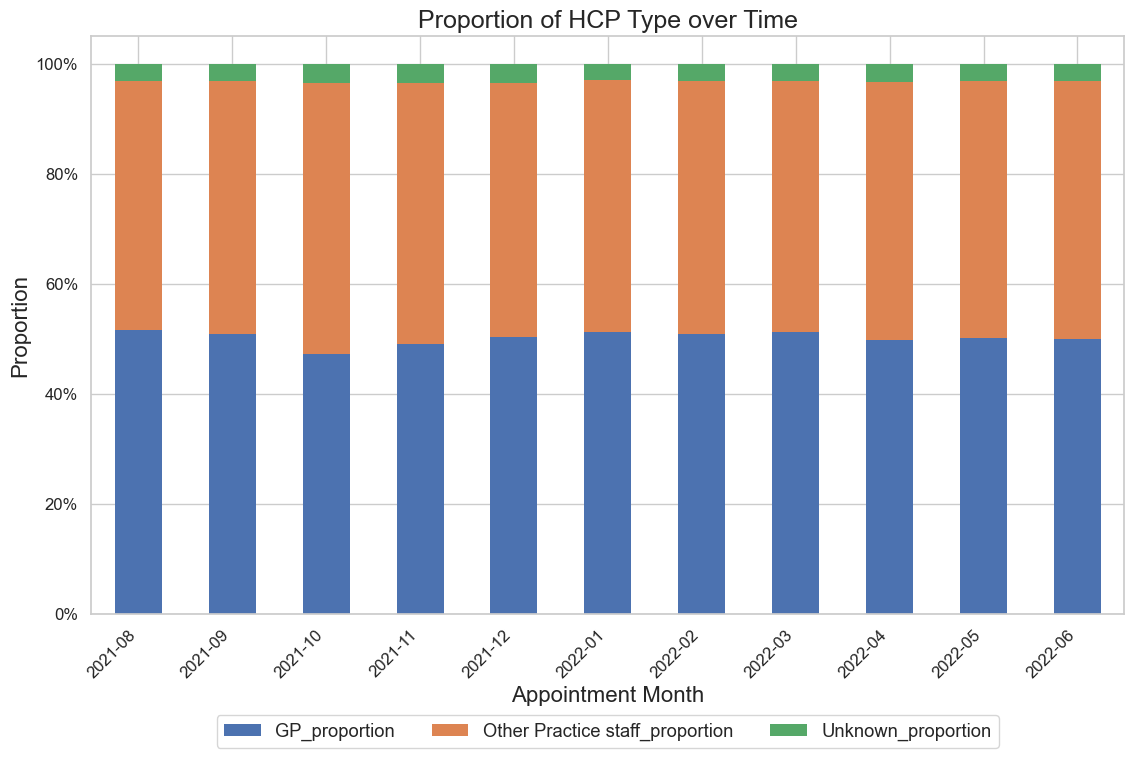

In [109]:
# Group the data by appointment_month and hcp_type, then calculate the sum for each group
grouped_data = filtered_ar.groupby(['appointment_month', 'hcp_type'])['count_of_appointments'].sum().reset_index()

# Pivot the data to have appointment_month as index, hcp_type as columns, and count_of_appointments as values
pivot_data = grouped_data.pivot(index='appointment_month', columns='hcp_type', values='count_of_appointments')

# Calculate the sum of each column (total appointments for each month)
pivot_data['total_appointments'] = pivot_data.sum(axis=1)

# Calculate the proportions for each 'hcp_type' within each month
for hcp_type in pivot_data.columns[:-1]:
    pivot_data[hcp_type + '_proportion'] = pivot_data[hcp_type] / pivot_data['total_appointments']

# Drop unnecessary columns and keep only the proportion columns
proportion_columns = [col for col in pivot_data.columns if col.endswith('_proportion')]
pivot_data_proportions = pivot_data[proportion_columns]

# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the 100% stacked bar chart using Seaborn
ax = pivot_data_proportions.plot(kind='bar', stacked=True, linewidth=0)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.title('Proportion of HCP Type over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Set y-axis to show percentages
ax.set_yticklabels(['{:.0f}%'.format(val * 100) for val in ax.get_yticks()])

# Format x-axis labels to show YYYY-MM without the day
ax.set_xticklabels(pivot_data_proportions.index.strftime('%Y-%m'))

# Remove the "00:00:00" from the x-axis labels
ax.set_xticklabels([label.get_text().split()[0] for label in ax.get_xticklabels()])

# Move the legend 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16), ncol=len(pivot_data.columns) - 1)

# Add grid to the plot
plt.grid(True)

# Show the plot (optional if you just want to save it to a file)
plt.show()

## Question 3: Are there significant changes in whether or not appointment visits are attended?

In [110]:
# Select and group the relevant columns
ar_as = ar.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Display the table data
ar_as.head()

appointment_month appointment_status  count_of_appointments
0        2020-01-01           Attended               24538291
1        2020-01-01                DNA                1298269
2        2020-01-01            Unknown                1362736
3        2020-02-01           Attended               21640067
4        2020-02-01                DNA                1215154

In [111]:
# determine propotion of count of apointments in each value of the appointment_status column
grouped_data = ar.groupby("appointment_status")["count_of_appointments"].sum()

# Calculate the total sum of "count_of_appointments" across all appointment_status
total_sum = grouped_data.sum()

# Calculate the proportion for each appointment_status
proportions = ((grouped_data / total_sum) * 100).round(2)

# Print the proportions
print(proportions)

appointment_status
Attended    91.24
DNA          4.16
Unknown      4.60
Name: count_of_appointments, dtype: float64


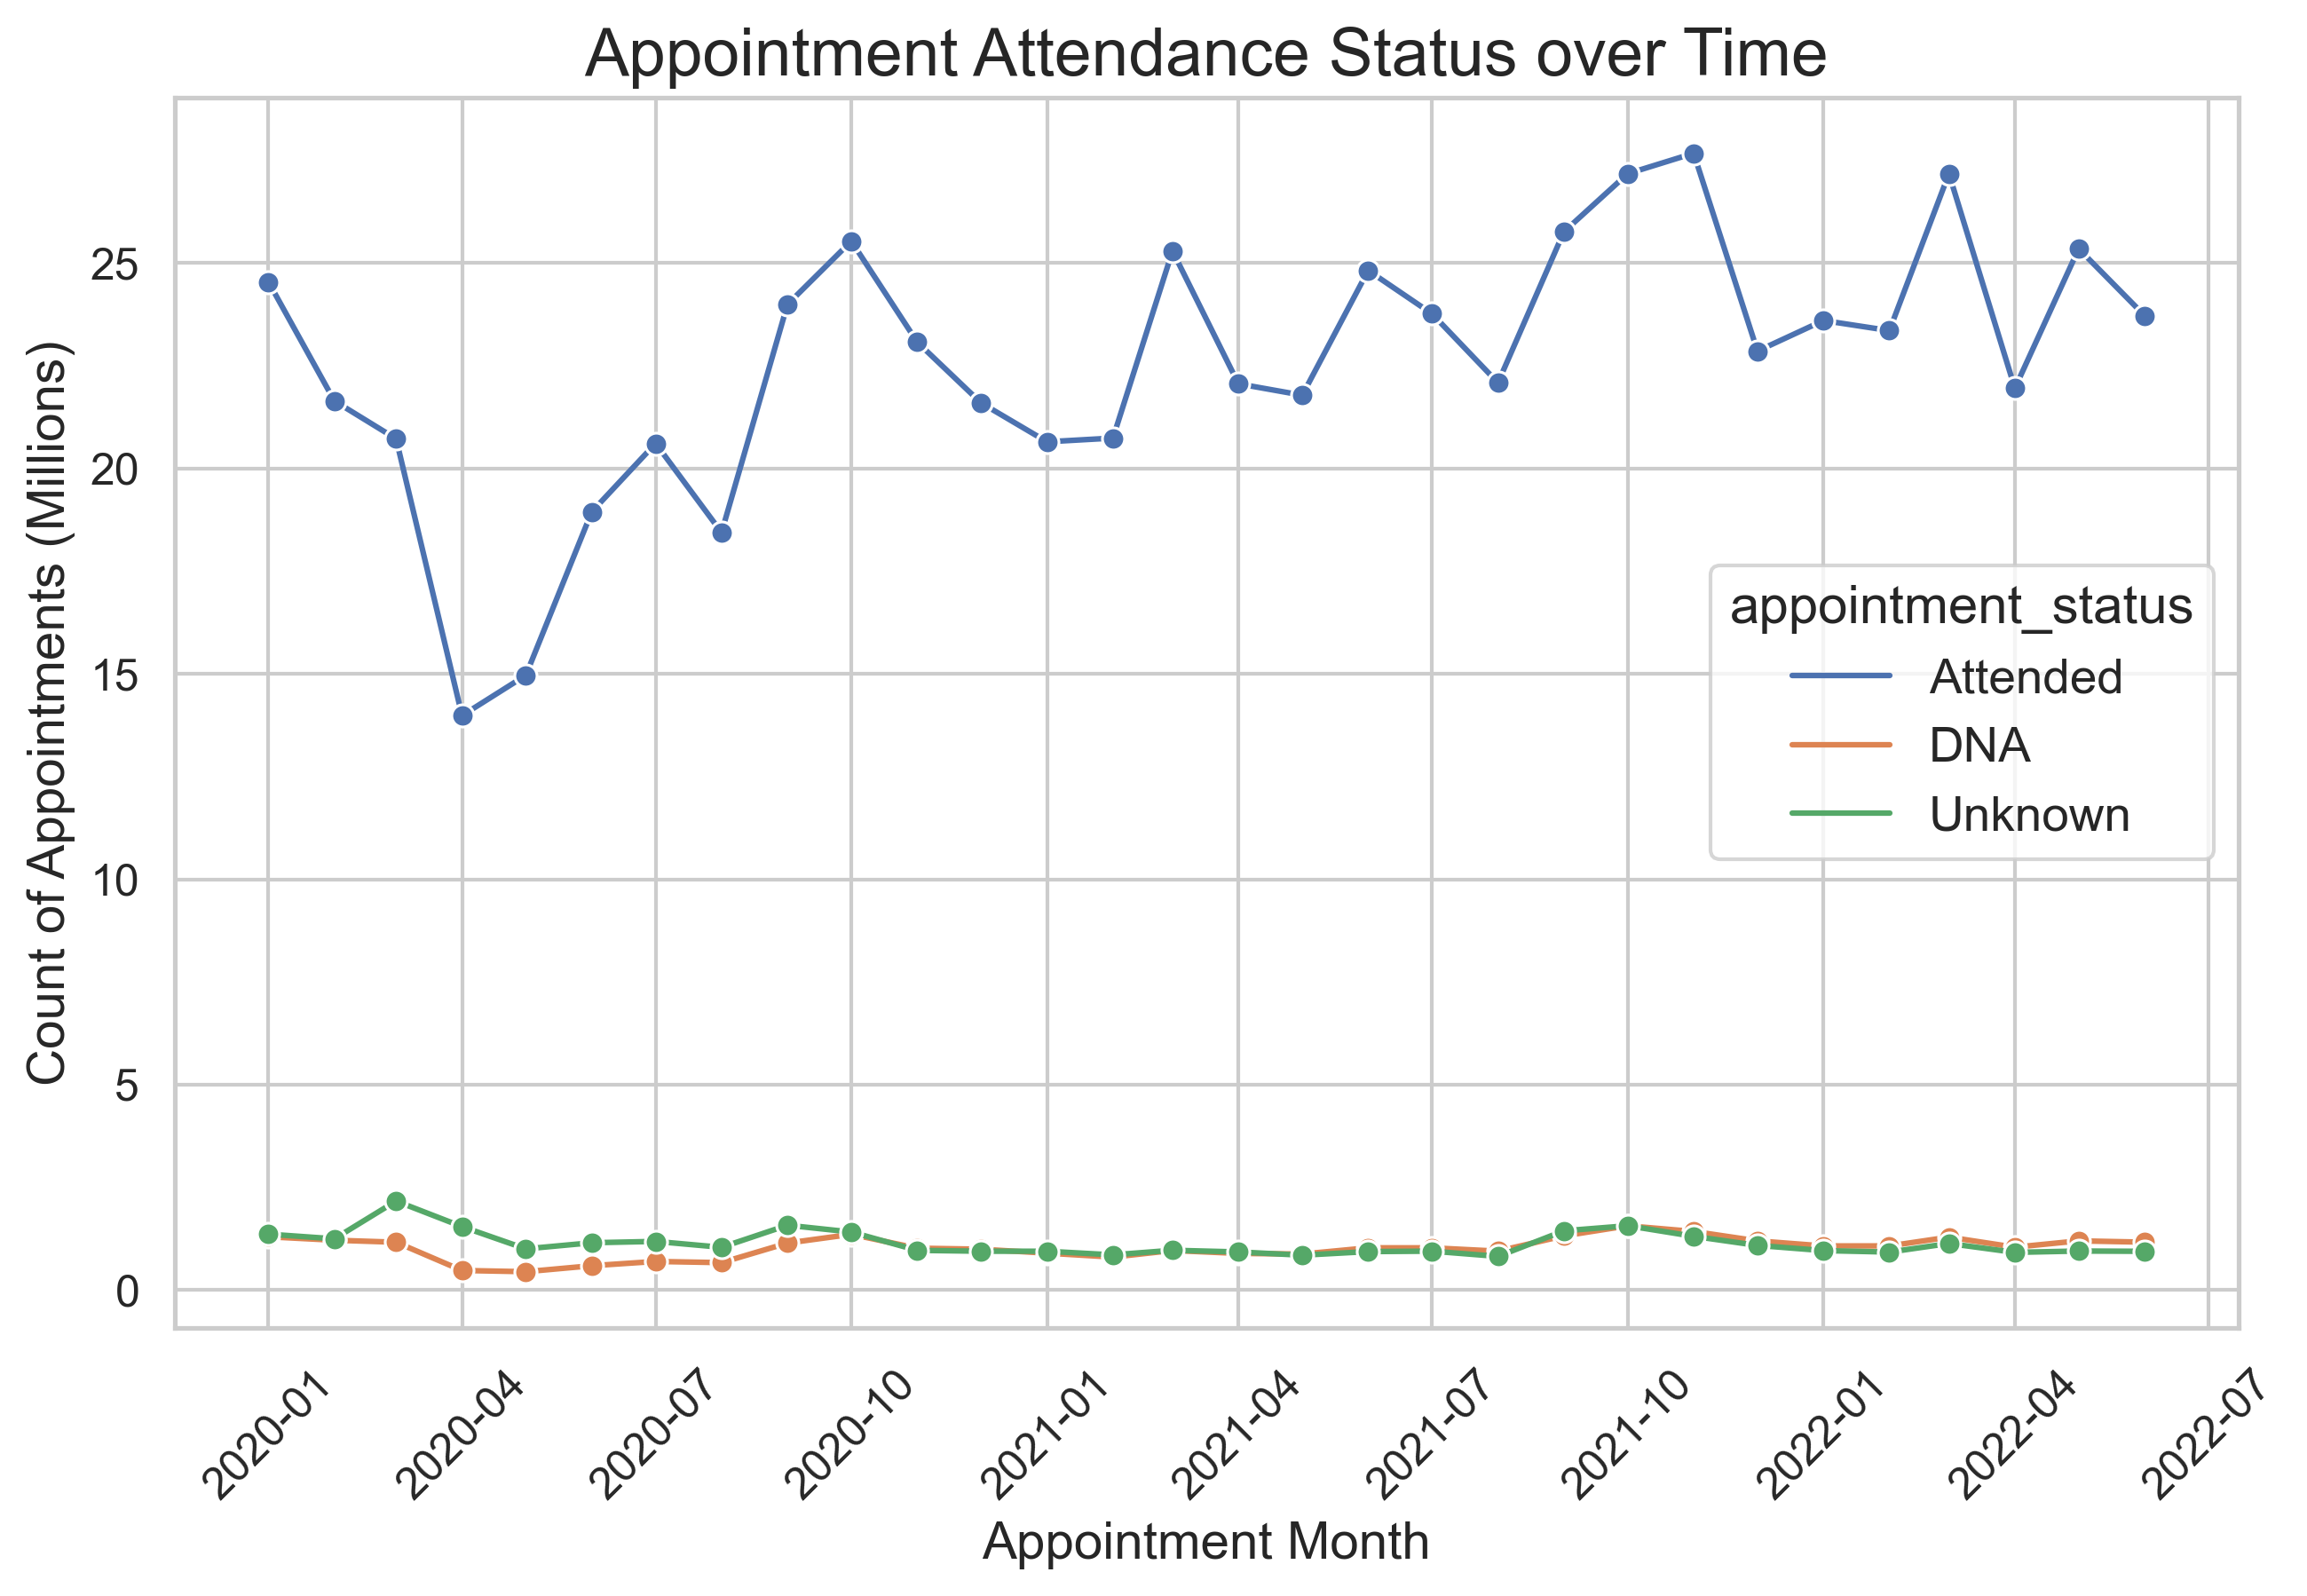

In [112]:
# Create a line plot to answer the question.
# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot using Seaborn with 'hue' parameter.
sns.lineplot(data=ar_as, x='appointment_month', y='count_of_appointments', hue='appointment_status', marker='o', ci=None)

# Customize the plot (titles, labels, etc.).""
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments (Millions)', fontsize=14)
plt.title('Appointment Attendance Status over Time', fontsize=18)
plt.xticks(rotation=45)

# Add grid to the plot.
plt.grid(True)

# Modify the Y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1000000)))

# Save the plot to a file (e.g., PNG).
# plt.savefig('appointment_attendance_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()

#### Did Not Attend (DNA) as a proportion of only known appointments (Attended + DNA)

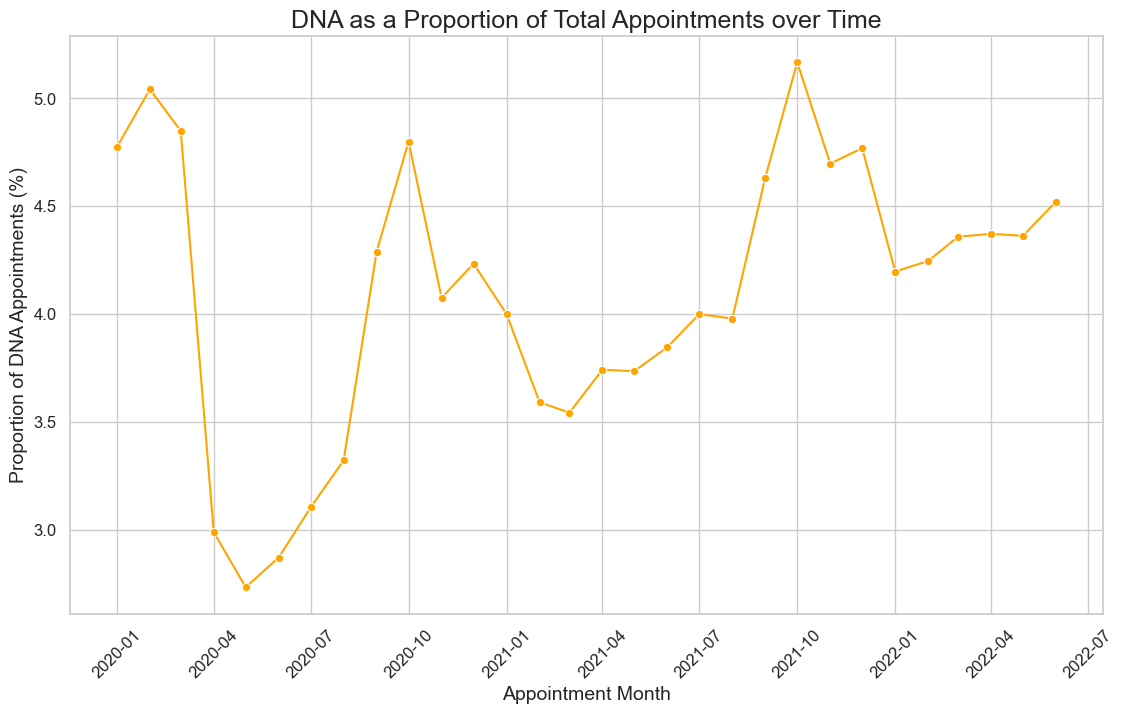

In [113]:
# Calculate the total count of 'Attended' + 'DNA' appointments for each 'appointment_month'
total_attended_dna = ar.groupby('appointment_month')['count_of_appointments'].apply(lambda x: x.sum())

# Filter the DataFrame to include only 'DNA' appointments
dna_data = ar[ar['appointment_status'] == 'DNA']

# Group the 'DNA' appointments by 'appointment_month' and calculate the sum
dna_counts = dna_data.groupby('appointment_month')['count_of_appointments'].sum()

# Calculate the proportion of 'DNA' appointments as a percentage of total 'Attended' + 'DNA' appointments
proportion_dna = (dna_counts / total_attended_dna) * 100

# Create the line plot using Seaborn.
sns.lineplot(data=proportion_dna.reset_index(), x='appointment_month', y='count_of_appointments', color='orange', marker='o', ci=None)

# Customize the plot (titles, labels, etc.).
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Proportion of DNA Appointments (%)', fontsize=14)
plt.title('DNA as a Proportion of Total Appointments over Time', fontsize=18)
plt.xticks(rotation=45)

# Add grid to the plot.
plt.grid(True)

# Save the plot to a file (e.g., PNG) if you want to use it in PowerPoint.
# plt.savefig('proportion_dna_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()

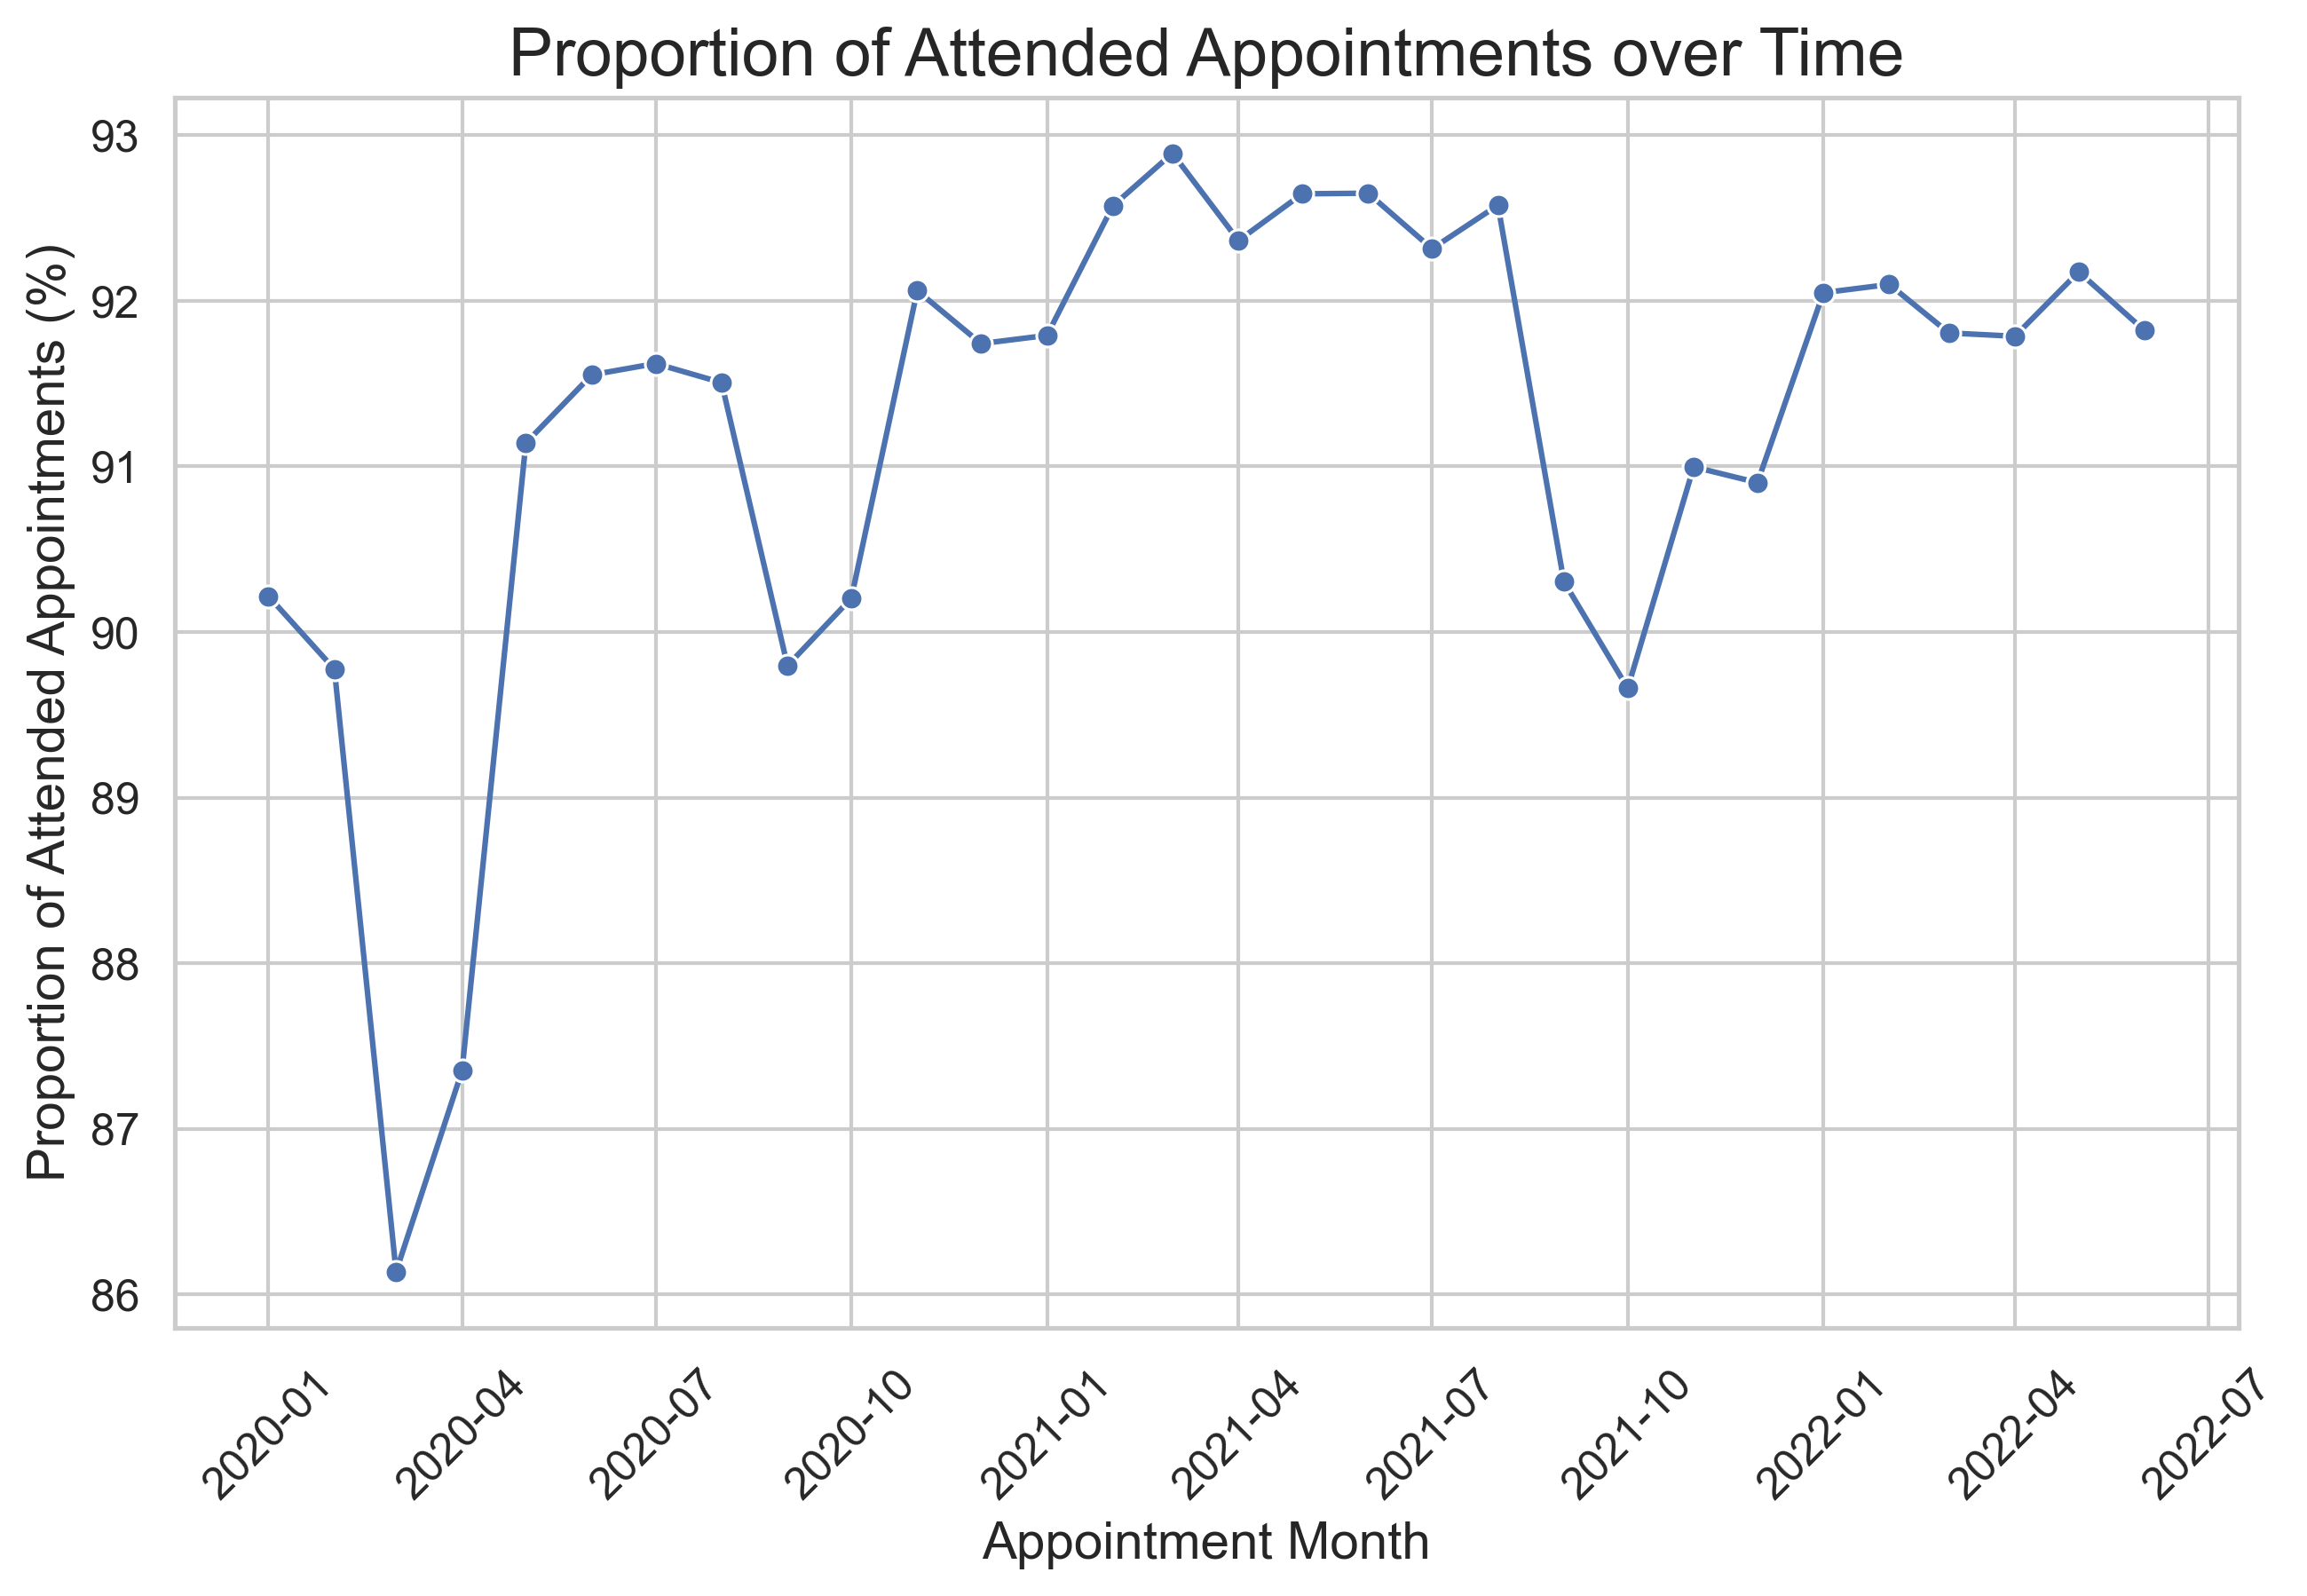

In [114]:
# Plot the percentage of 'Attended' appointments in a seperate 
# Calculate the total count of 'Attended' + 'DNA' appointments for each 'appointment_month'
total_attended_dna = ar.groupby('appointment_month')['count_of_appointments'].apply(lambda x: x.sum())

# Filter the DataFrame to include only 'Attended' appointments
attended_data = ar[ar['appointment_status'] == 'Attended']

# Group the 'Attended' appointments by 'appointment_month' and calculate the sum
attended_counts = attended_data.groupby('appointment_month')['count_of_appointments'].sum()

# Calculate the proportion of 'Attended' appointments as a percentage of total 'Attended' + 'DNA' appointments
proportion_attended = (attended_counts / total_attended_dna) * 100

# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot using Seaborn.
sns.lineplot(data=proportion_attended.reset_index(), x='appointment_month', y='count_of_appointments', marker='o', ci=None)

# Customize the plot (titles, labels, etc.).
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Proportion of Attended Appointments (%)', fontsize=14)
plt.title('Proportion of Attended Appointments over Time', fontsize=18)
plt.xticks(rotation=45)

# Add grid to the plot.
plt.grid(True)

# Save the plot to a file (e.g., PNG) if you want to use it in PowerPoint.
# plt.savefig('proportion_attended_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()

The graphs above allow you to visualize the proportion of Did Not Attend (DNA) appointments over time, which helps in understanding how the attendance status is changing relative to the total number of appointments each month.

## 6.4 Are there changes in terms of appointment type and the busiest months? 

The best visualisation to understand this trend is to have the ratio of appointment type per month shown next to the figure for th enumber of appointments over time with the 5 buiest month highlighted. 

In [115]:
# Select and group the relevant columns
ar_am = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Display the table data
ar_am.head()

appointment_month appointment_mode  count_of_appointments
0        2020-01-01     Face-to-Face               21733394
1        2020-01-01       Home Visit                 266942
2        2020-01-01        Telephone                3701775
3        2020-01-01          Unknown                1302979
4        2020-01-01     Video/Online                 194206

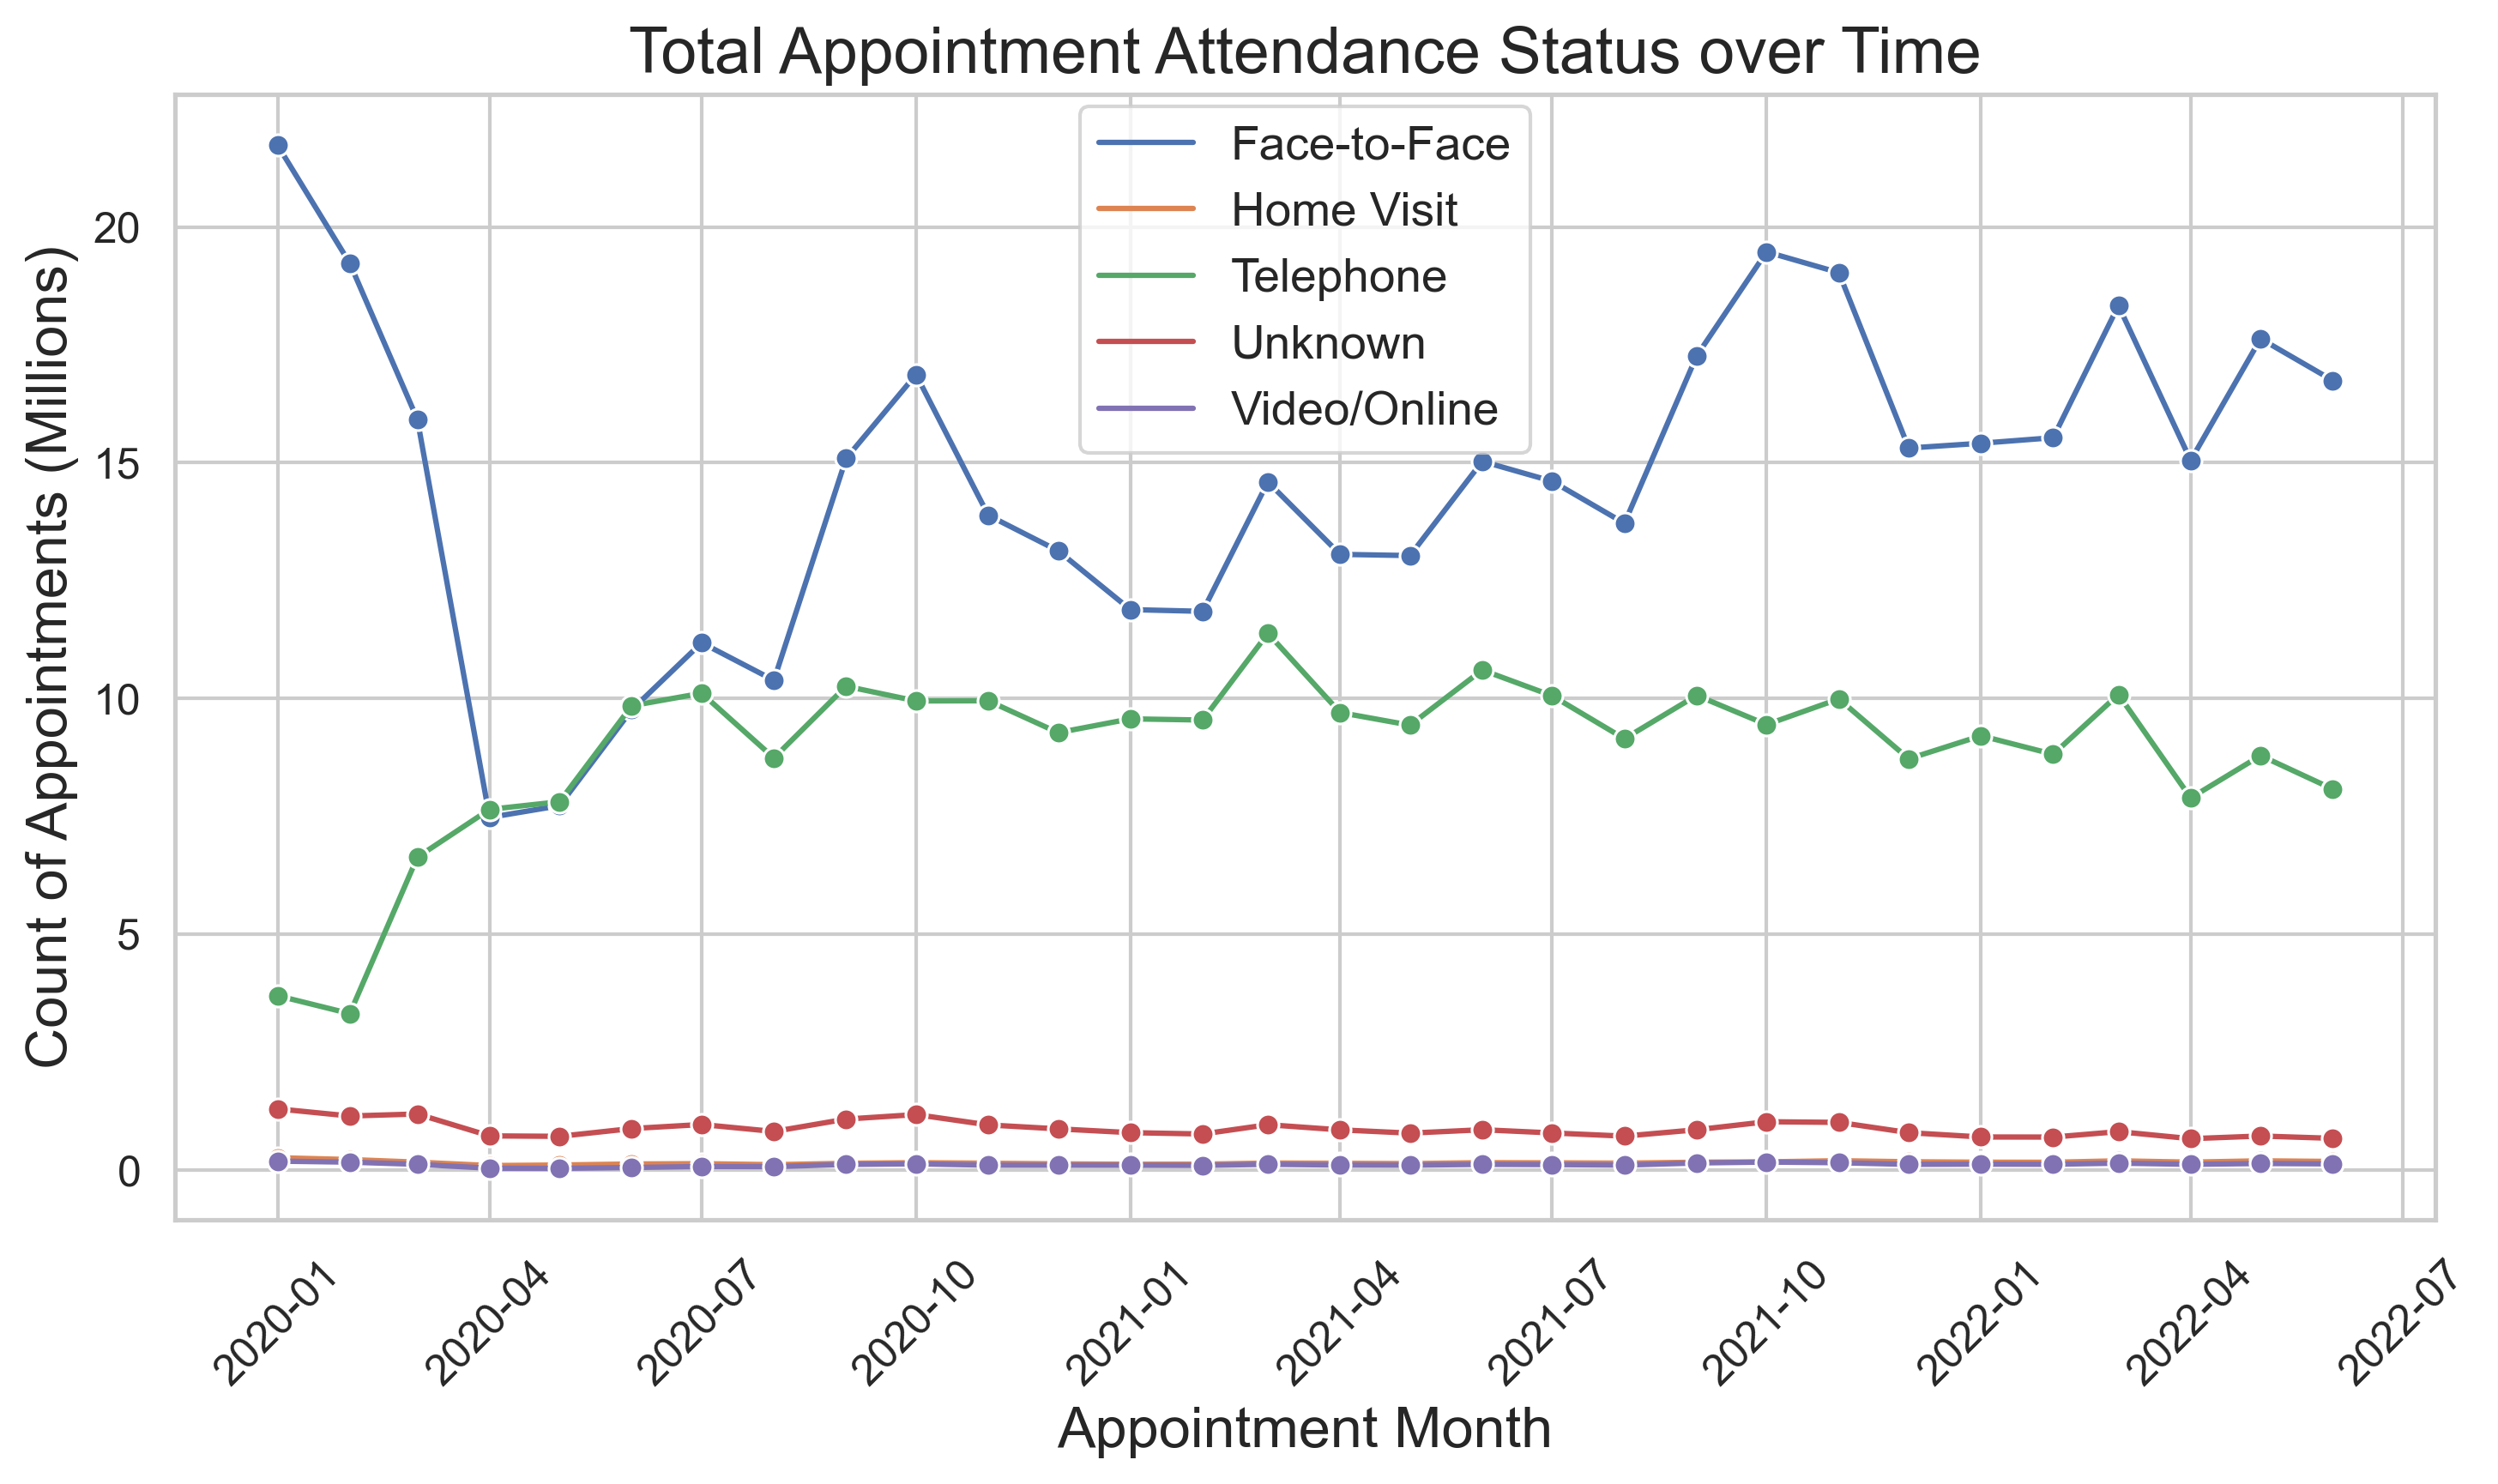

In [116]:
# Create a line plot to show appointment attendance status appointment modes
# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot using Seaborn with 'hue' parameter.
sns.lineplot(data=ar_am, x='appointment_month', y='count_of_appointments', hue='appointment_mode', marker='o', ci=None)

# Customize the plot (titles, labels, etc.).
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Count of Appointments (Millions)', fontsize=16)
plt.title('Total Appointment Attendance Status over Time', fontsize=18)
plt.xticks(rotation=45)

# Add grid to the plot.
plt.grid(True)

# Adjust the layout and the legend to prevent overlapping.
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.01))  

# Modify the Y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1000000)))

# Save the plot to a file (e.g., PNG) 
# plt.savefig('appointment_attendance_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#### Stacked Bar Chart

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

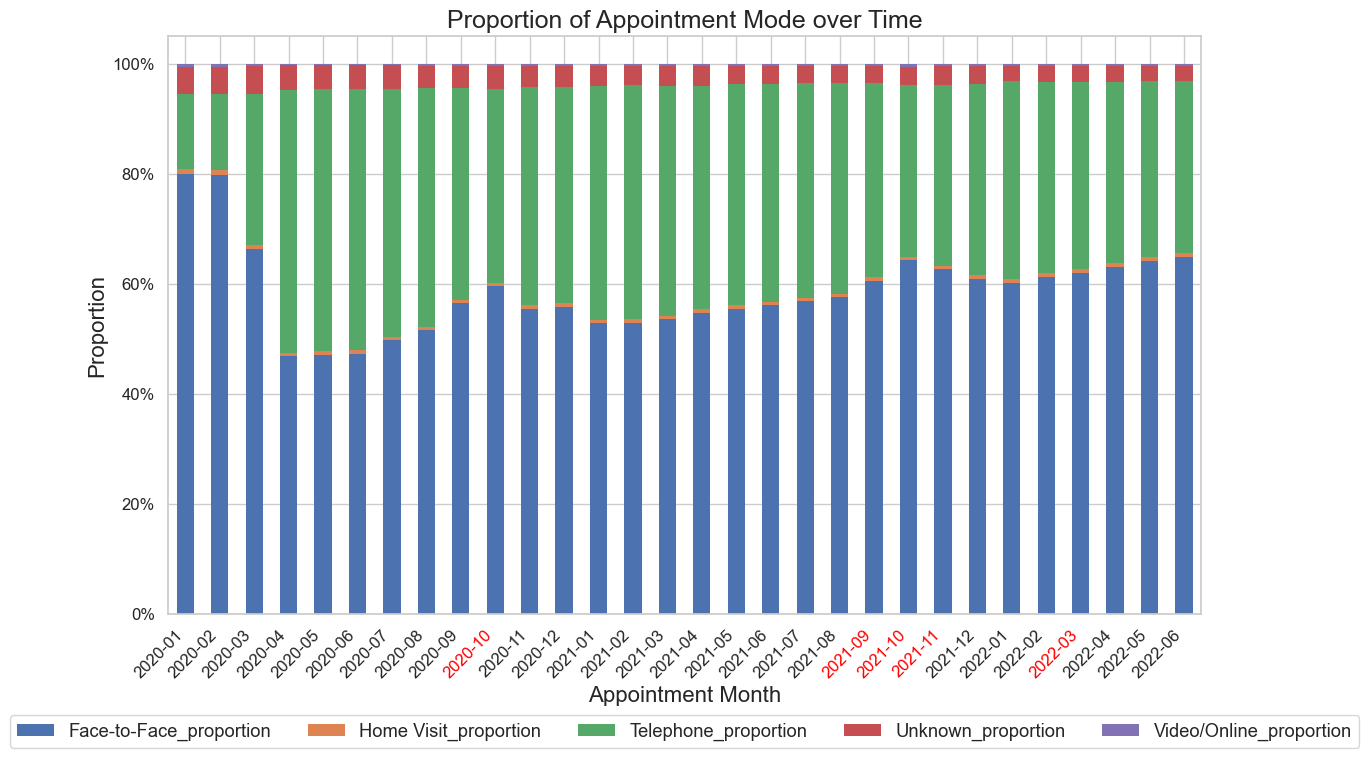

In [117]:
# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Group the data by appointment_month and appointment_mode, then calculate the sum for each group
grouped_data = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Pivot the data to have appointment_month as index, appointment mode as columns, and count_of_appointments as values
pivot_data = grouped_data.pivot(index='appointment_month', columns='appointment_mode', values='count_of_appointments')

# Calculate the sum of each column (total appointments for each month)
pivot_data['total_appointments'] = pivot_data.sum(axis=1)

# Calculate the proportions for each 'appointment mode' within each month
for appointment_mode in pivot_data.columns[:-1]:
    pivot_data[appointment_mode + '_proportion'] = pivot_data[appointment_mode] / pivot_data['total_appointments']

# Drop unnecessary columns and keep only the proportion columns
proportion_columns = [col for col in pivot_data.columns if col.endswith('_proportion')]
pivot_data_proportions = pivot_data[proportion_columns]

# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the 100% stacked bar chart using Seaborn
ax = pivot_data_proportions.plot(kind='bar', stacked=True, linewidth=0)
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.title('Proportion of Appointment Mode over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Set y-axis to show percentages
ax.set_yticklabels(['{:.0f}%'.format(val * 100) for val in ax.get_yticks()])

# Format x-axis labels to show YYYY-MM without the day
ax.set_xticklabels(pivot_data_proportions.index.strftime('%Y-%m'))

# Remove the "00:00:00" from the x-axis labels
ax.set_xticklabels([label.get_text().split()[0] for label in ax.get_xticklabels()])

# Highlight the 5 highest number of appintment months in red
highlight_months = ['2021-11-01', '2021-10-01', '2022-03-01', '2021-09-01', '2020-10-01']
for i, label in enumerate(ax.get_xticklabels()):
    if pivot_data_proportions.index[i].strftime('%Y-%m-%d') in highlight_months:
        label.set_color('red')
        
# Move the legend 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.16), ncol=len(pivot_data.columns) - 1)

# Add grid to the plot
plt.grid(True)

# Save the plot to a file (e.g., PNG) 
# plt.savefig('proportion_of_appointment_mode_over_time.png', dpi=300, bbox_inches='tight')

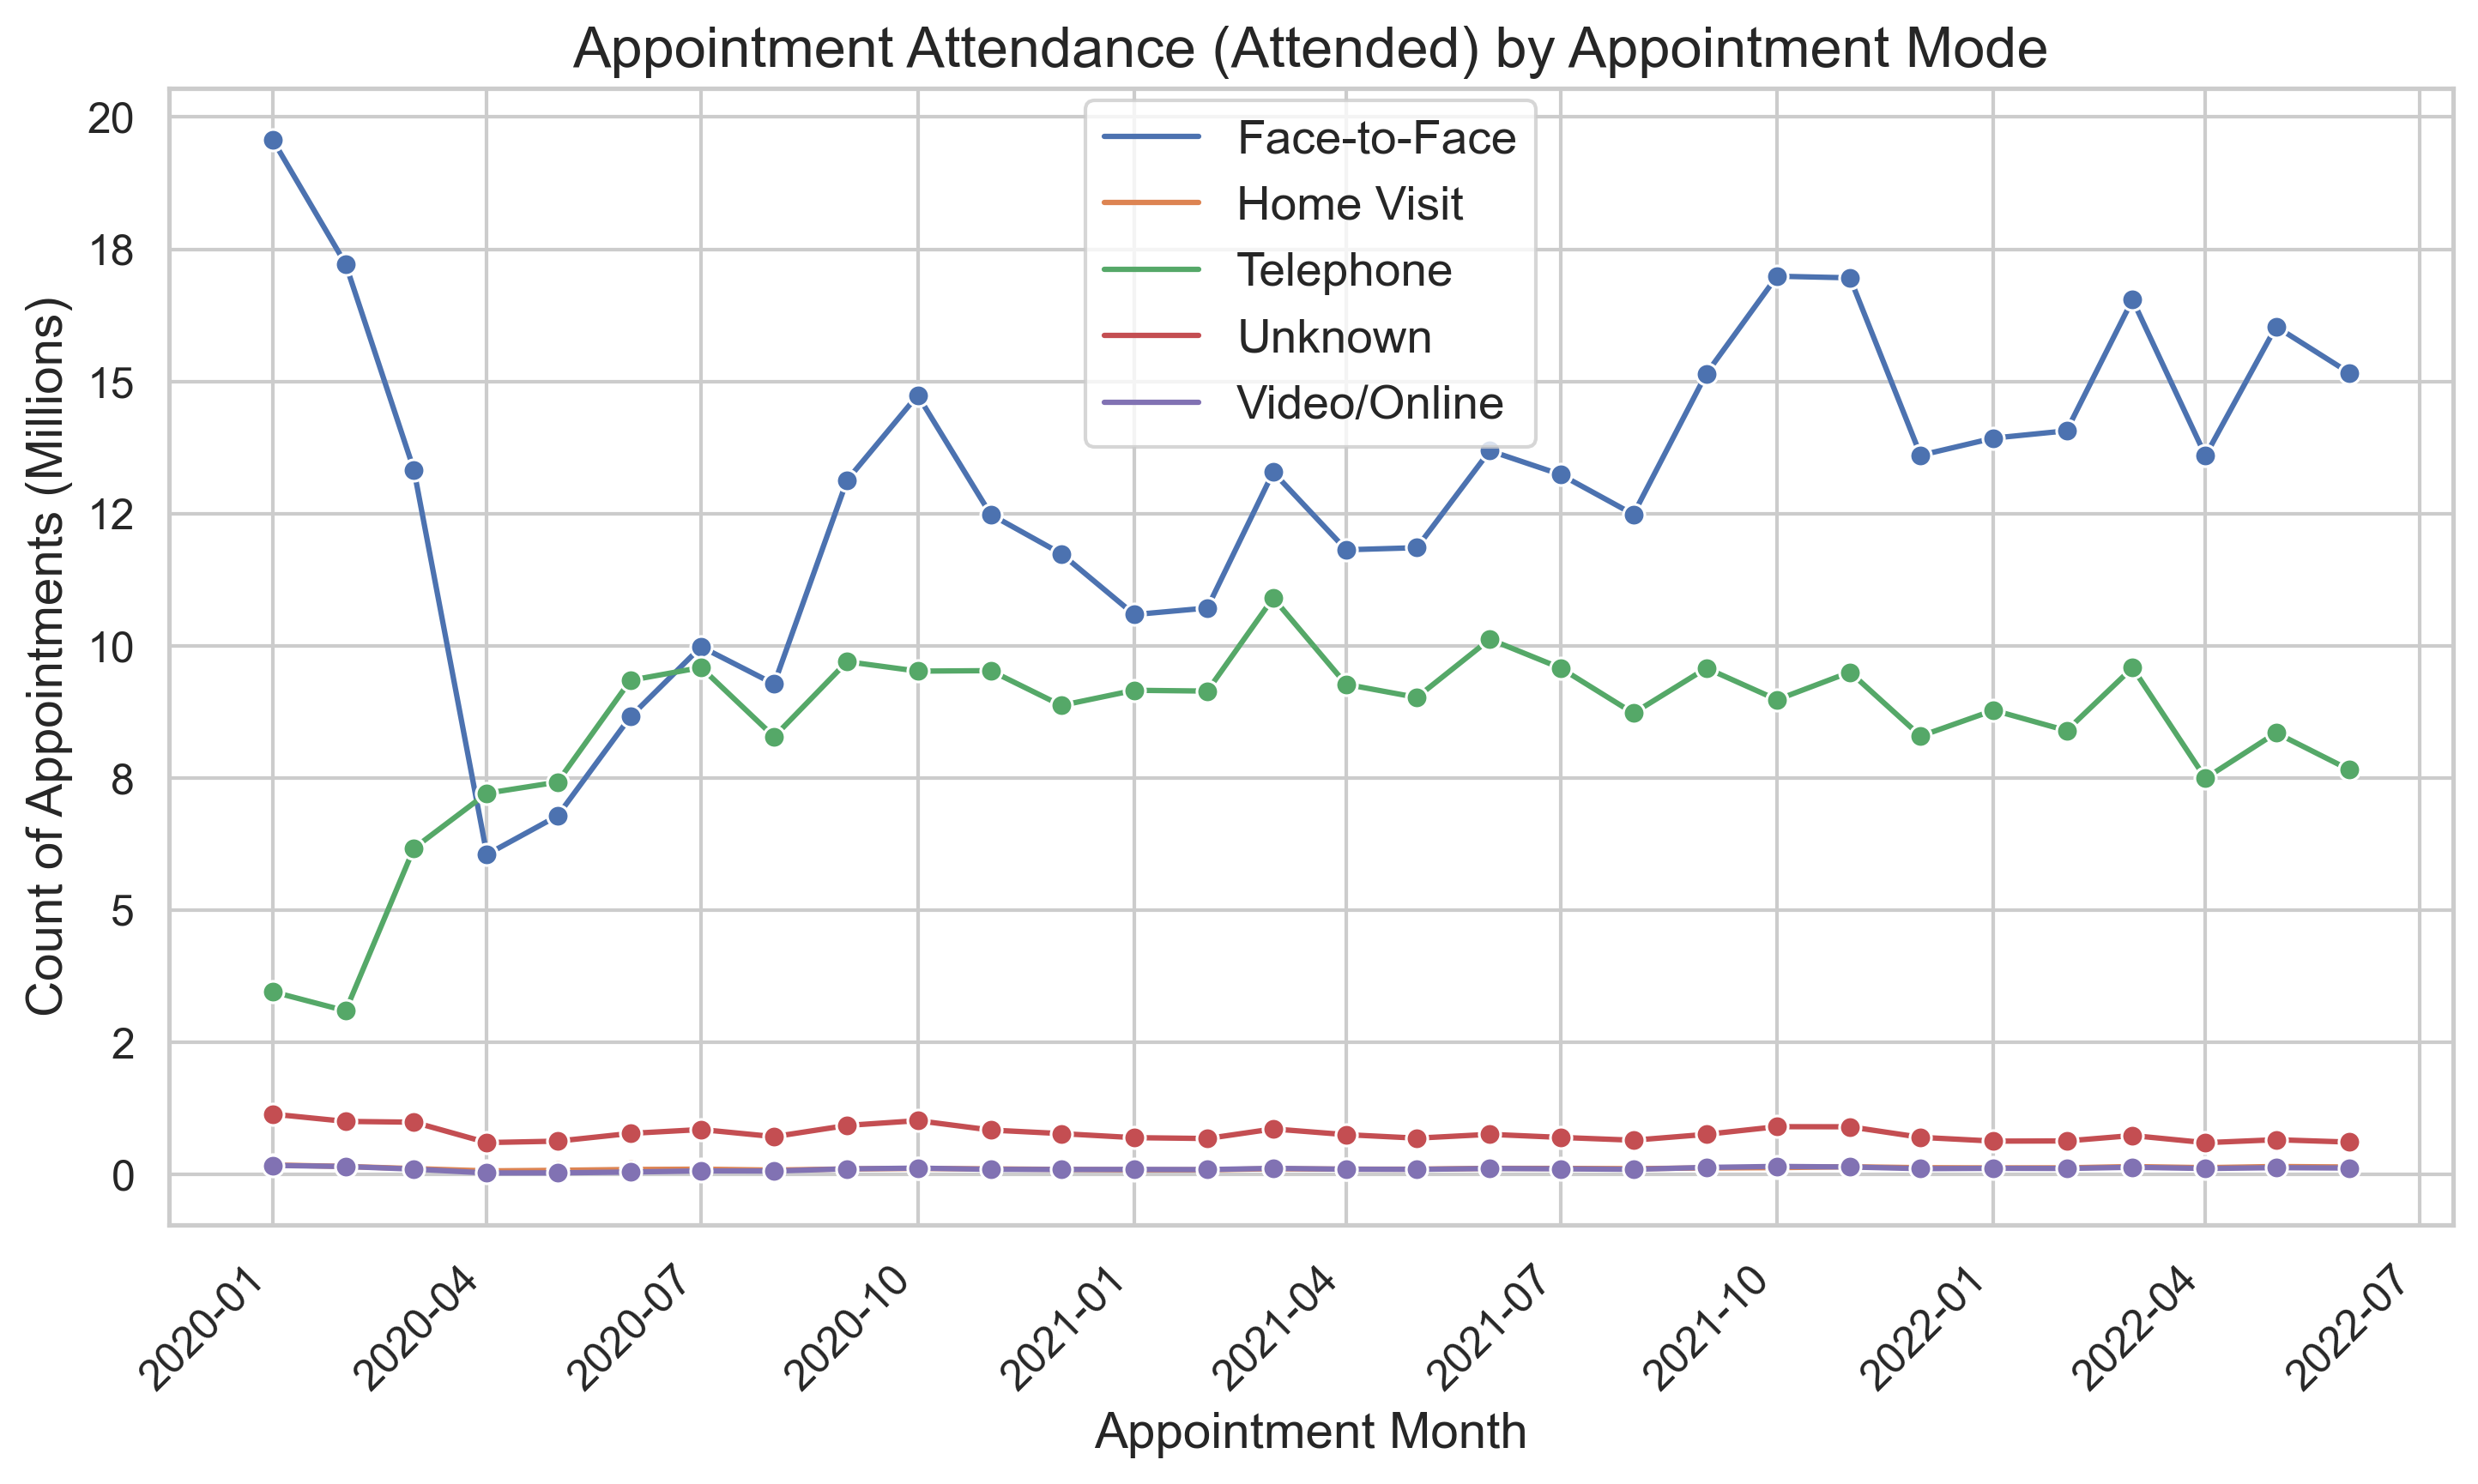

In [118]:
# Attended
# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Filter the DataFrame for 'Attended' values in 'appointment_status'.
ar_attended = ar[ar['appointment_status'] == 'Attended']
ar_attended_table = ar_attended.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Create the line plot for 'Attended' values.
sns.lineplot(data=ar_attended_table, x='appointment_month', y='count_of_appointments', hue='appointment_mode', marker='o', ci=None)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments (Millions)', fontsize=14)
plt.title('Appointment Attendance (Attended) by Appointment Mode', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Adjust the layout and the legend to prevent overlapping.
plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.01)) 

# Modify the Y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1000000)))

# Save the plot to a file (e.g., PNG).
# plt.savefig('attendance_by_mode_over_time.png', dpi=300, bbox_inches='tight')


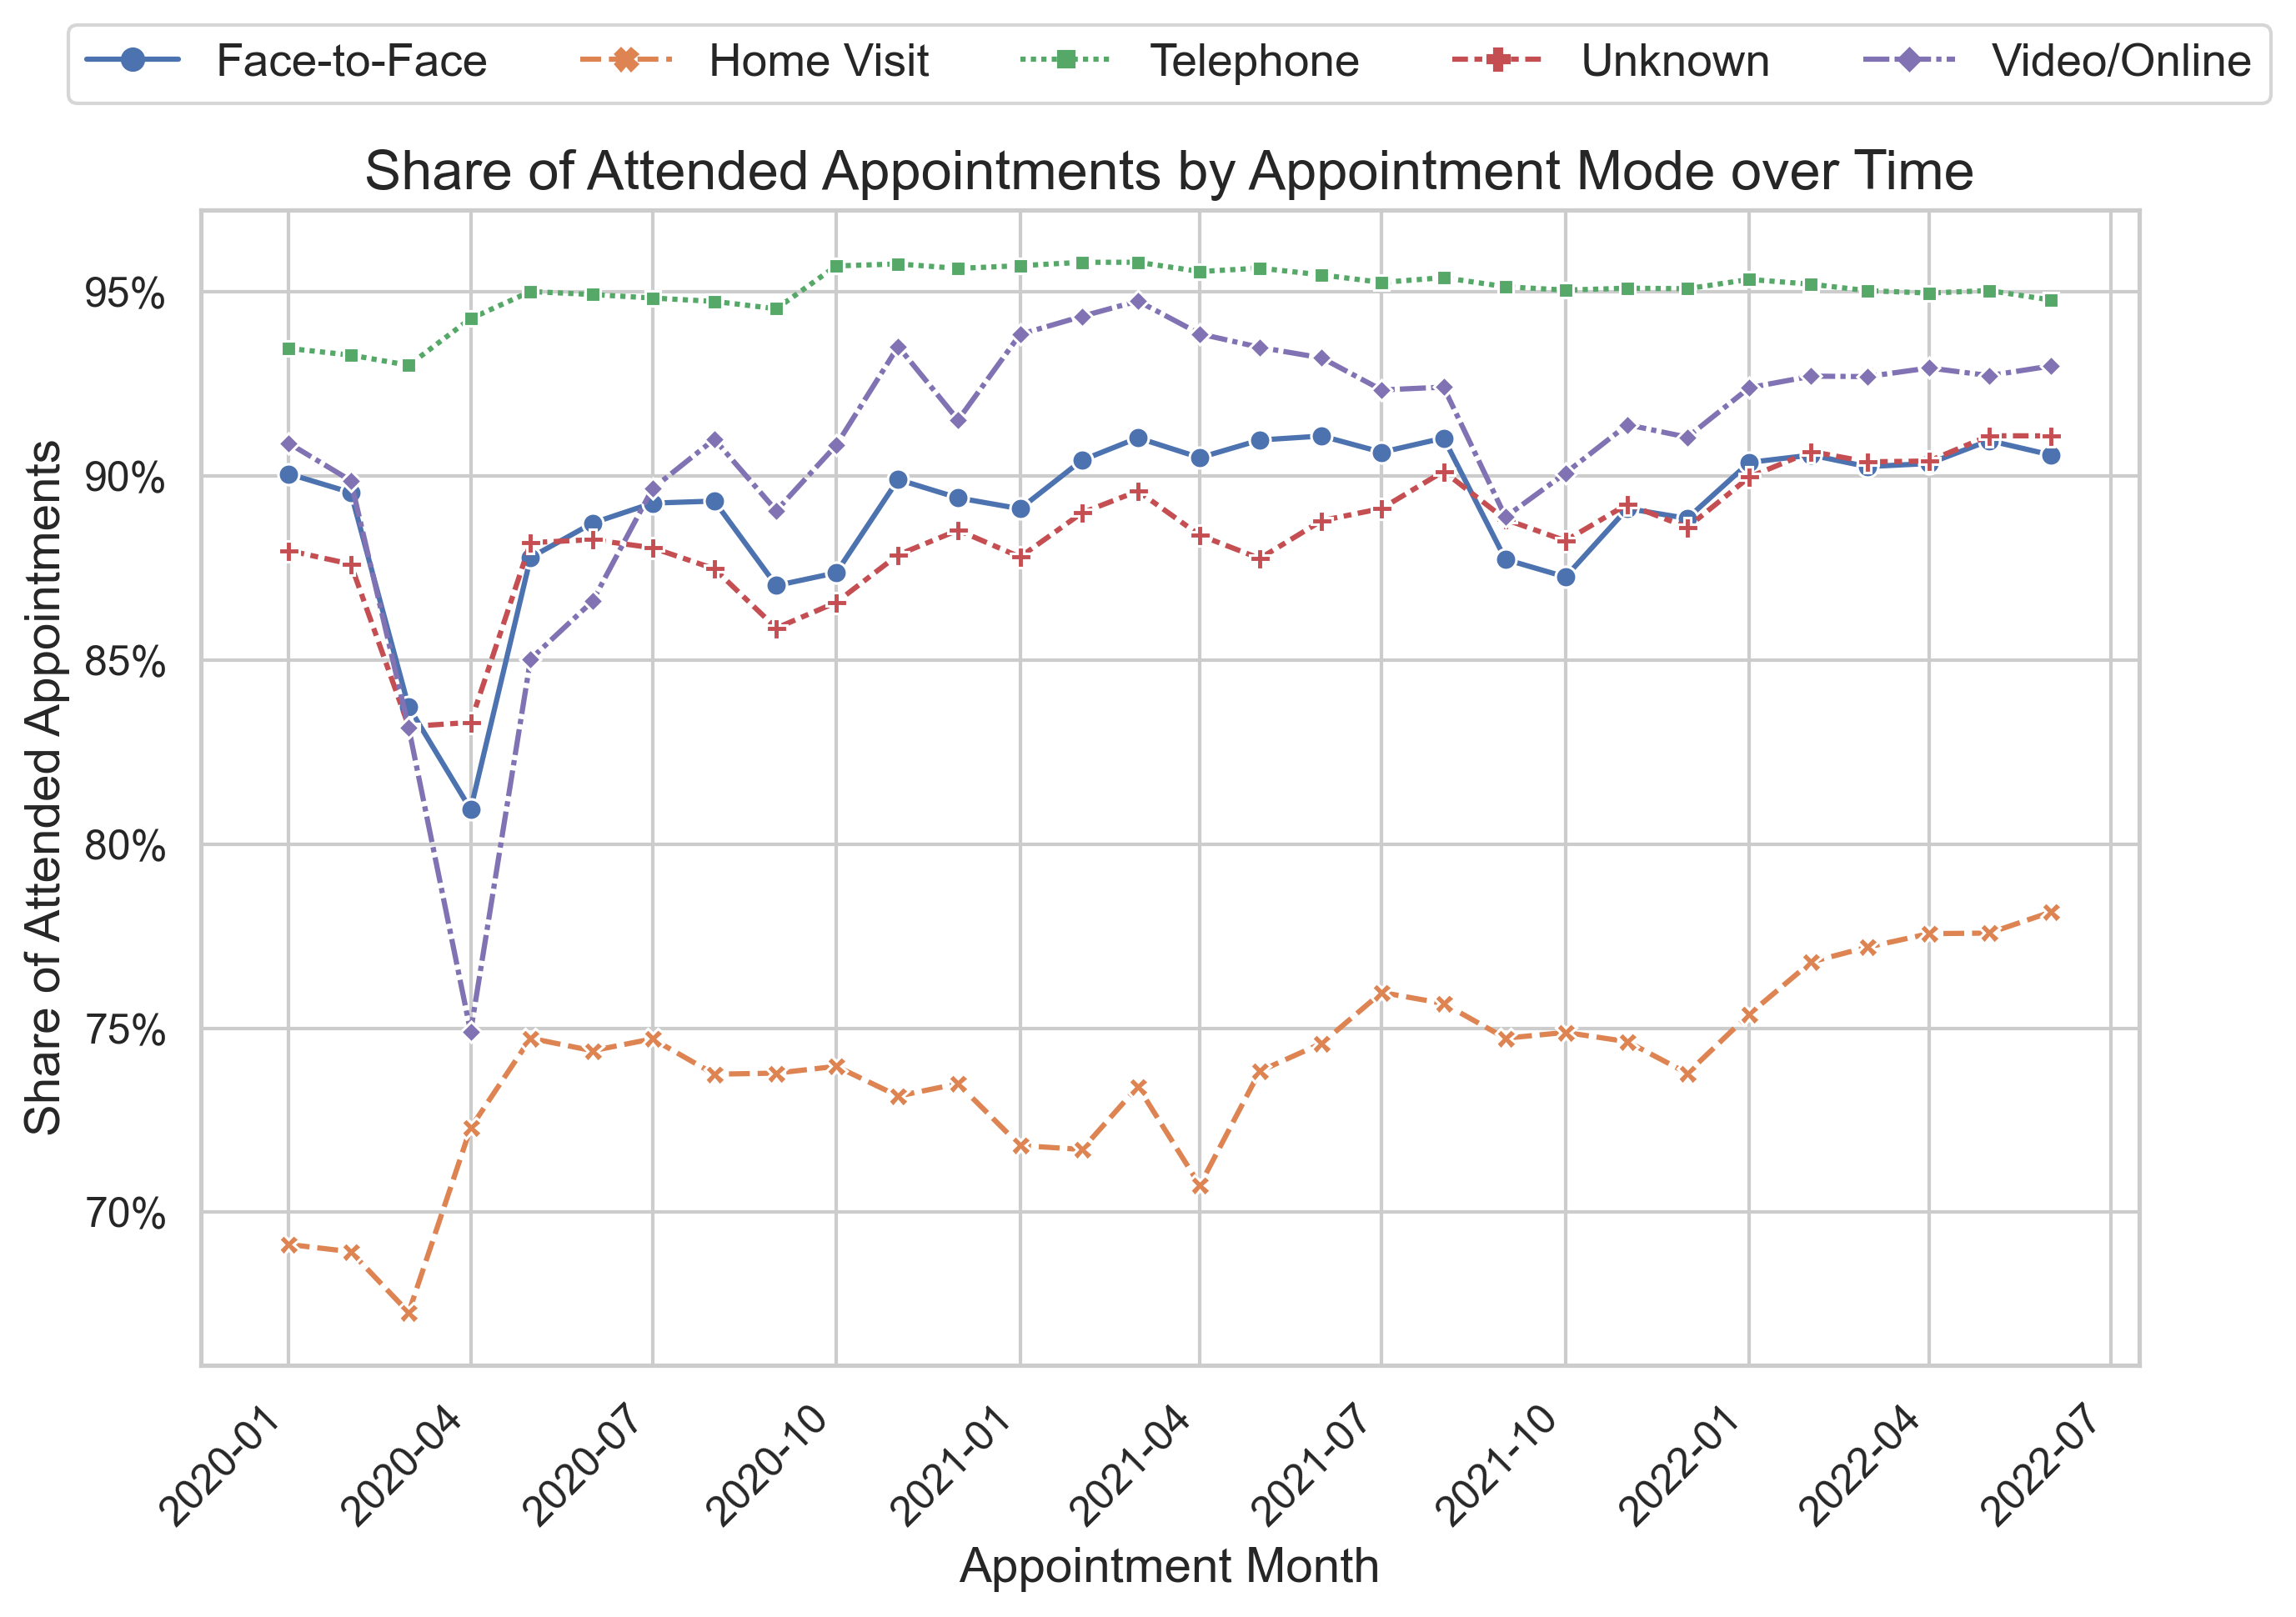

In [119]:
# share of attended appointments for each appoitment mode

# Calculate the total count of appointments for each appointment mode and each month
total_appointments_by_mode_and_month = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Calculate the total count of attended appointments for each appointment mode and each month
ar_attended = ar[ar['appointment_status'] == 'Attended']
attended_appointments_by_mode_and_month = ar_attended.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Merge the two DataFrames to calculate the share of attended appointments for each appointment mode and each month
share_attended_by_mode_and_month = total_appointments_by_mode_and_month.merge(attended_appointments_by_mode_and_month, on=['appointment_month', 'appointment_mode'], how='left')
share_attended_by_mode_and_month['share_attended'] = share_attended_by_mode_and_month['count_of_appointments_y'] / share_attended_by_mode_and_month['count_of_appointments_x']

# Pivot the data for plotting
pivot_data = share_attended_by_mode_and_month.pivot(index='appointment_month', columns='appointment_mode', values='share_attended')

# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot for the share of attended appointments for each appointment mode
sns.lineplot(data=pivot_data, markers=True)

plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Share of Attended Appointments', fontsize=14)
plt.title('Share of Attended Appointments by Appointment Mode over Time', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Modify the Y-axis to display percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Move the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=len(pivot_data.columns))

# Save the plot to a file (e.g., PNG)
# plt.savefig('share_attended_by_mode_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

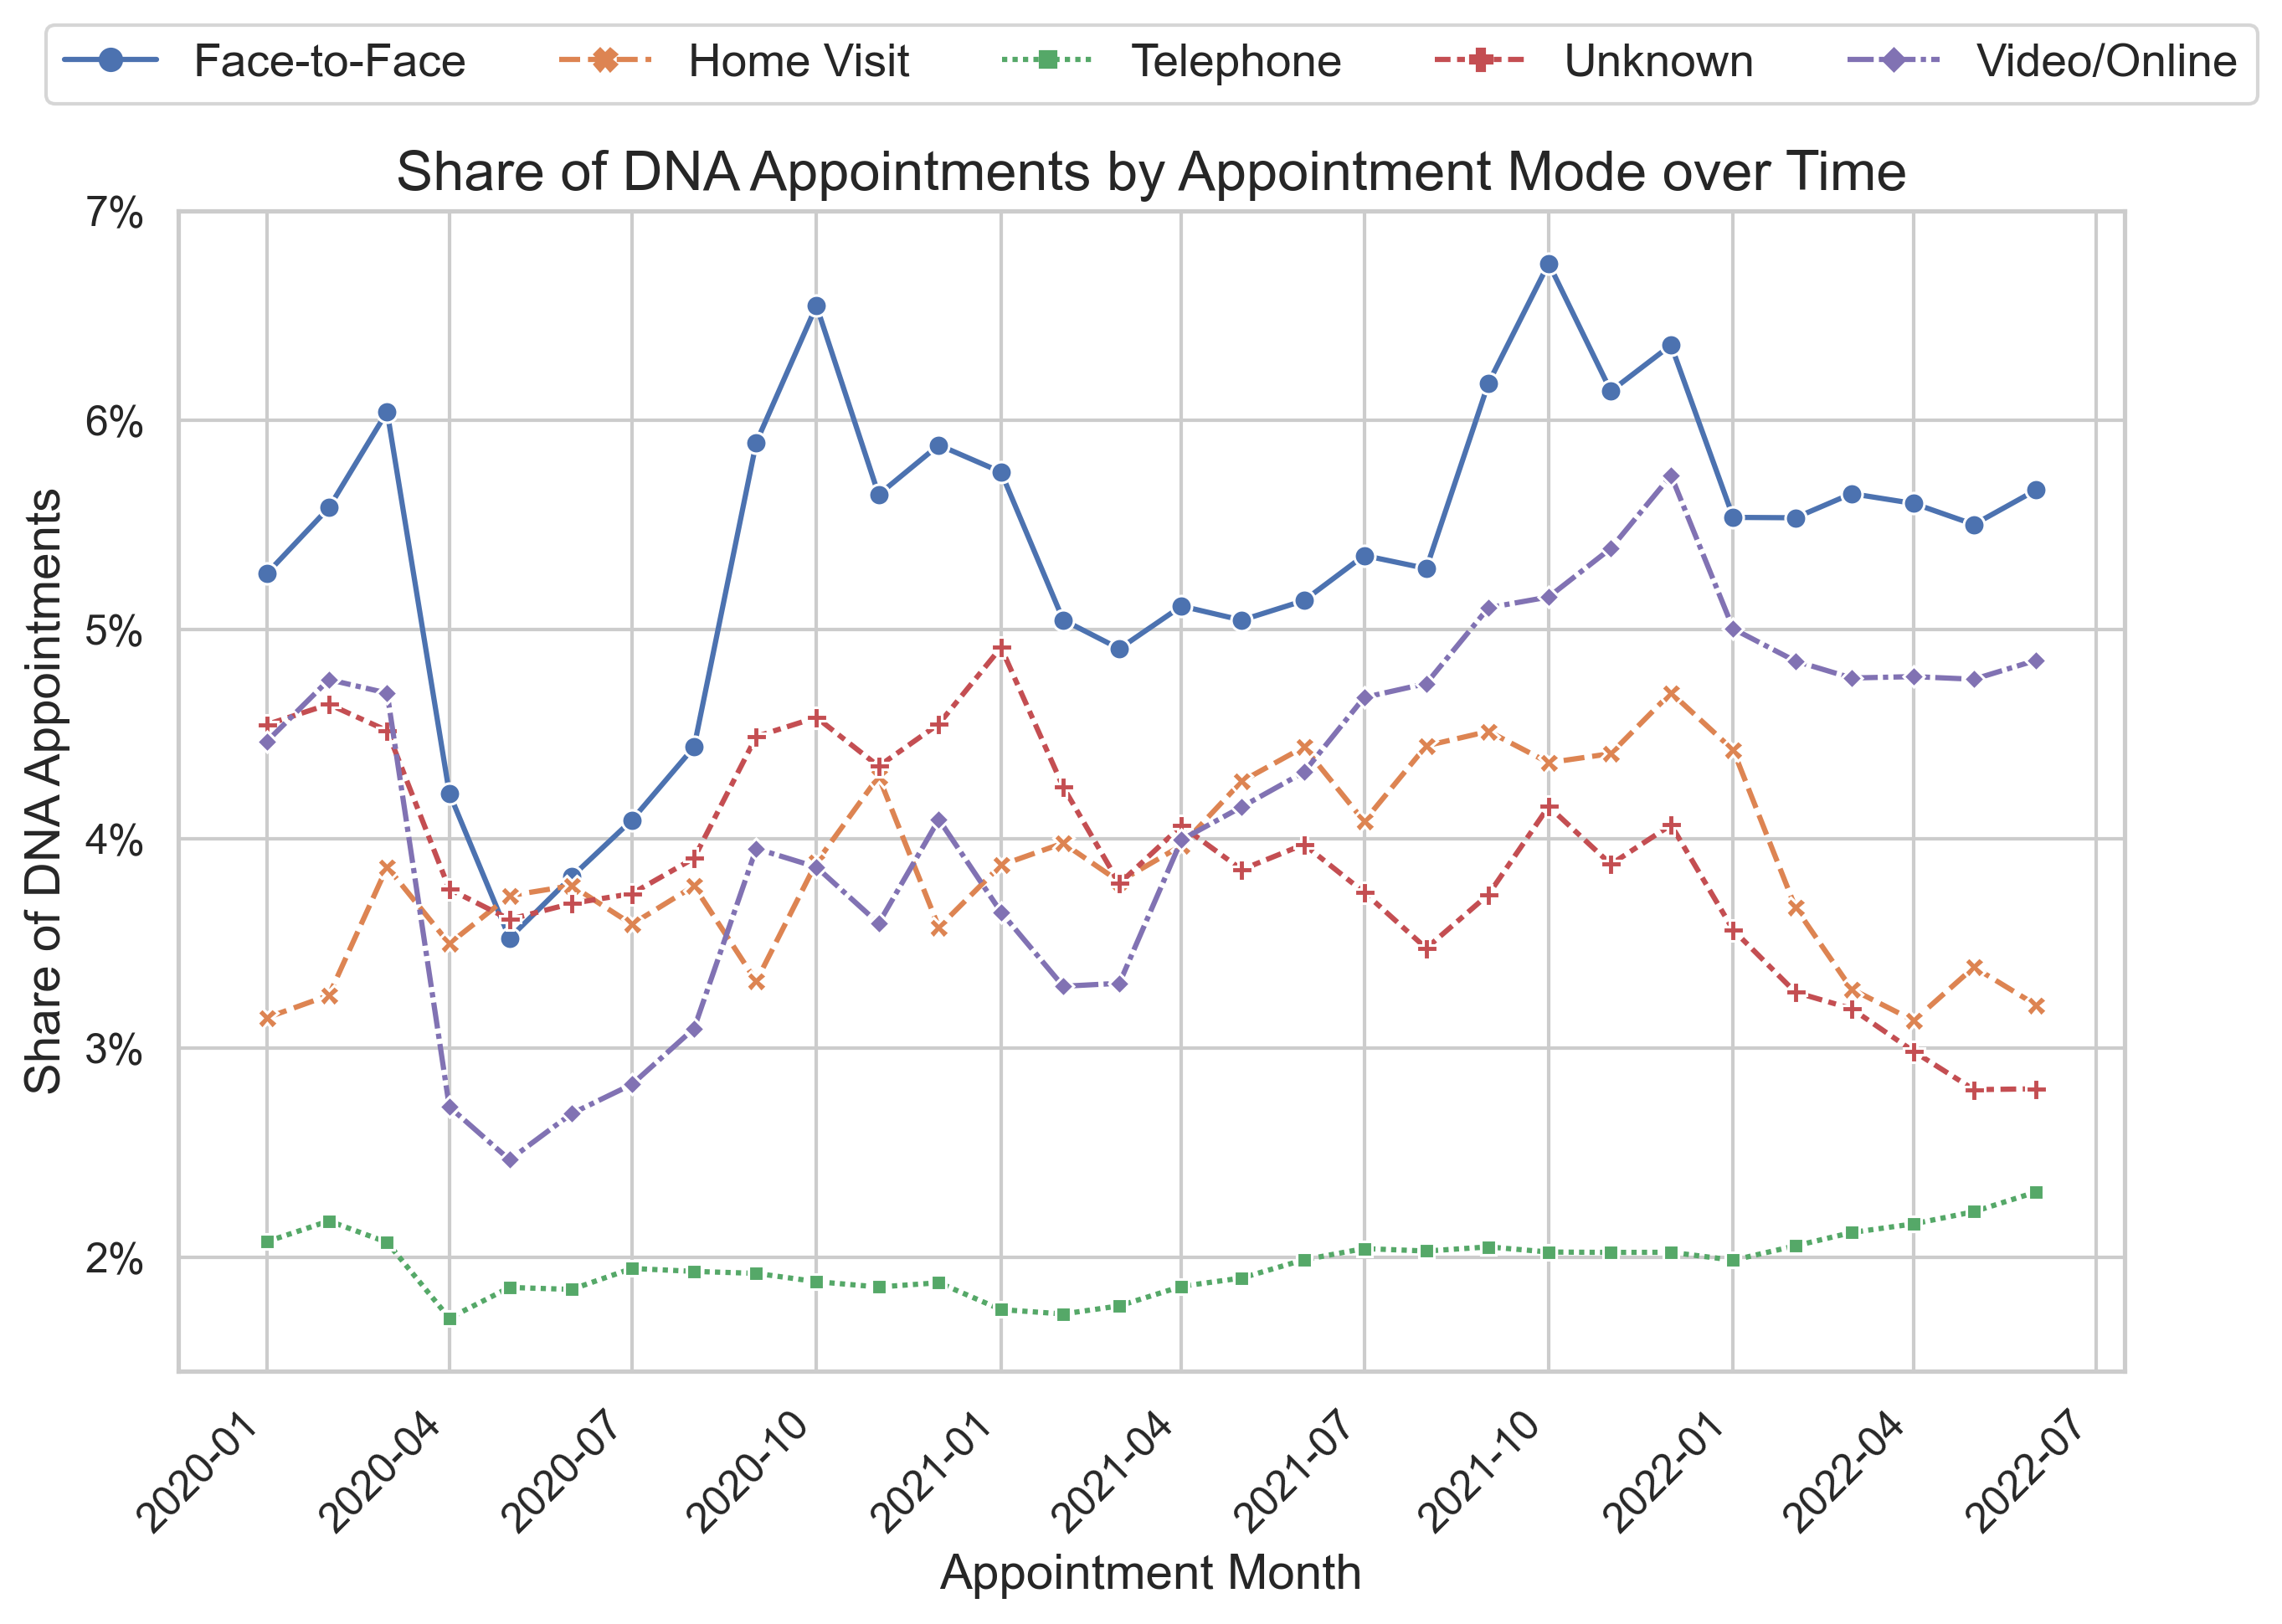

In [120]:
# share of Did Not Attend (DNA) appointments for each appoitment mode

# Calculate the total count of 'DNA' appointments for each appointment mode and each month
ar_dna = ar[ar['appointment_status'] == 'DNA']
dna_appointments_by_mode_and_month = ar_dna.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Merge the two DataFrames to calculate the share of 'DNA' appointments for each appointment mode and each month
share_dna_by_mode_and_month = total_appointments_by_mode_and_month.merge(dna_appointments_by_mode_and_month, on=['appointment_month', 'appointment_mode'], how='left')
share_dna_by_mode_and_month['share_dna'] = share_dna_by_mode_and_month['count_of_appointments_y'] / share_dna_by_mode_and_month['count_of_appointments_x']

# Pivot the data for plotting
pivot_data = share_dna_by_mode_and_month.pivot(index='appointment_month', columns='appointment_mode', values='share_dna')

# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot for the share of 'DNA' appointments for each appointment mode
sns.lineplot(data=pivot_data, markers=True)

plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Share of DNA Appointments', fontsize=14)
plt.title('Share of DNA Appointments by Appointment Mode over Time', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Modify the Y-axis to display percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Move the legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=len(pivot_data.columns))

# Save the plot to a file (e.g., PNG)
# plt.savefig('share_dna_by_mode_over_time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

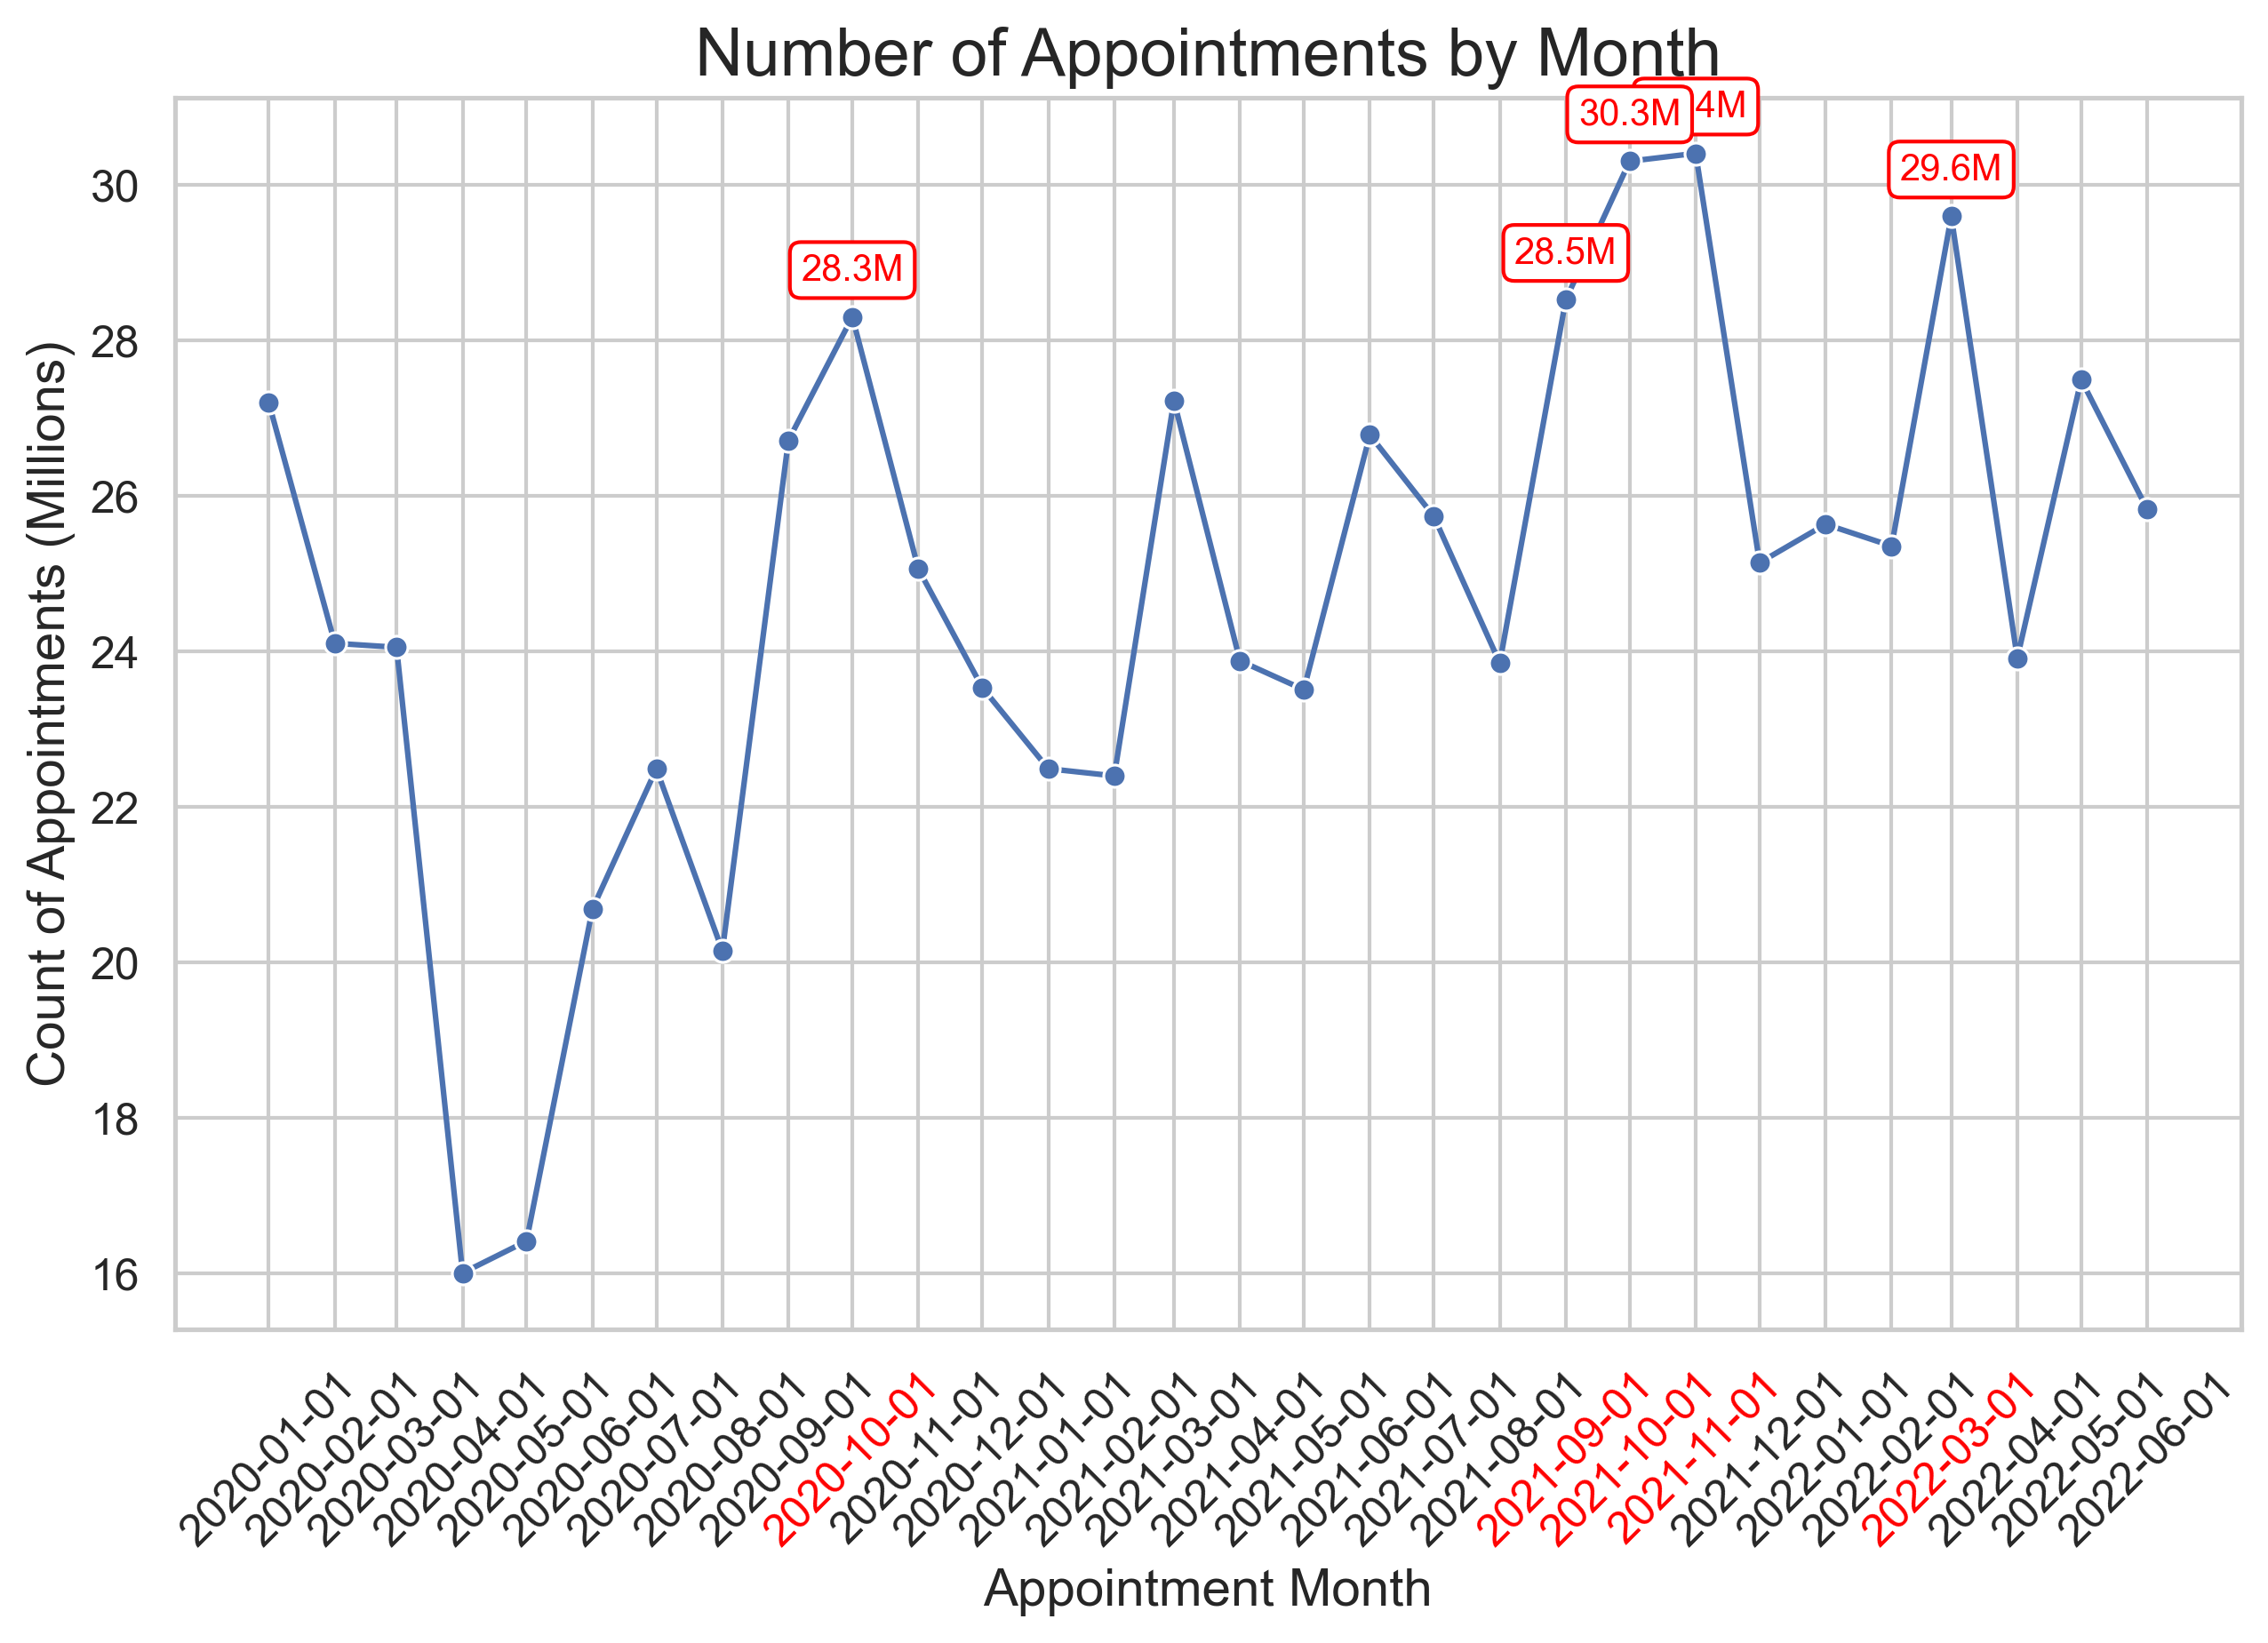

appointment_month  count_of_appointments
22        2021-11-01               30405070
21        2021-10-01               30303834
26        2022-03-01               29595038
20        2021-09-01               28522501
9         2020-10-01               28301932

In [121]:
from matplotlib.ticker import FuncFormatter

# Calculate the total count of appointments for each month and sort the months
monthly_appointments = ar.groupby('appointment_month')['count_of_appointments'].sum().reset_index()
monthly_appointments.sort_values(by='count_of_appointments', ascending=False, inplace=True)

# Get the top 5 months with the most appointments
top_5_months = monthly_appointments.head(5)

# Set the figure size for the plot
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot using Seaborn
ax = sns.lineplot(data=monthly_appointments, x='appointment_month', y='count_of_appointments', marker='o')

# Customize the plot (titles, labels, etc.)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments (Millions)', fontsize=14)
plt.title('Number of Appointments by Month', fontsize=18)
plt.xticks(monthly_appointments['appointment_month'], rotation=45)

# Add grid to the plot
plt.grid(True)

# Format Y-axis tick labels as integers (in 10s of millions)
def millions_formatter(x, pos):
    return '{:0,d}'.format(int(x / 1e6))

# Apply the custom formatter to the Y-axis ticks
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# Highlight specific months in red
highlight_months = ['2021-11-01', '2021-10-01', '2022-03-01', '2021-09-01', '2020-10-01']
for label in ax.get_xticklabels():
    if label.get_text() in highlight_months:
        label.set_color('red')

# Annotate the top 5 months with text labels (smaller font size) and manually adjust positions
for i, row in top_5_months.iterrows():
    plt.annotate(f"{row['count_of_appointments']/1e6:.1f}M",
                 (row['appointment_month'], row['count_of_appointments']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=10,
                 color='red',
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white"))
    
# Save the plot to a file (e.g., PNG) if you want to use it in PowerPoint.
# plt.savefig('busiest_months.png', dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()

# Display the top 5 months
display(top_5_months)

Investigating how the appointment satuses vary between different appointment modes enable us to determine which appointmend modes have a higher attendance and how these have changed over time. For example the figures above show the highest share of attended appointments as telephone, followed by video/ online. Interestingly, on the flip side, face-to-face had the highest share of DNA appointments.

## 6.5 Are there any trends in time between booking an appointment?

In [122]:
# View unique values in the 'hcp_type' column.
unique_time_between_book_and_appointment = ar['time_between_book_and_appointment'].unique()
print(unique_time_between_book_and_appointment)

['1 Day' '15  to 21 Days' '2 to 7 Days' '22  to 28 Days' '8  to 14 Days'
 'More than 28 Days' 'Same Day' 'Unknown / Data Quality']


In [123]:
# Calculate the total count of appointments for each time_between_book_and_appointment and each month
ar_time = ar.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Display the table data
ar_time.head()

appointment_month time_between_book_and_appointment  count_of_appointments
0        2020-01-01                             1 Day                1945711
1        2020-01-01                    15  to 21 Days                1881819
2        2020-01-01                       2 to 7 Days                5604909
3        2020-01-01                    22  to 28 Days                1313557
4        2020-01-01                     8  to 14 Days                3444637

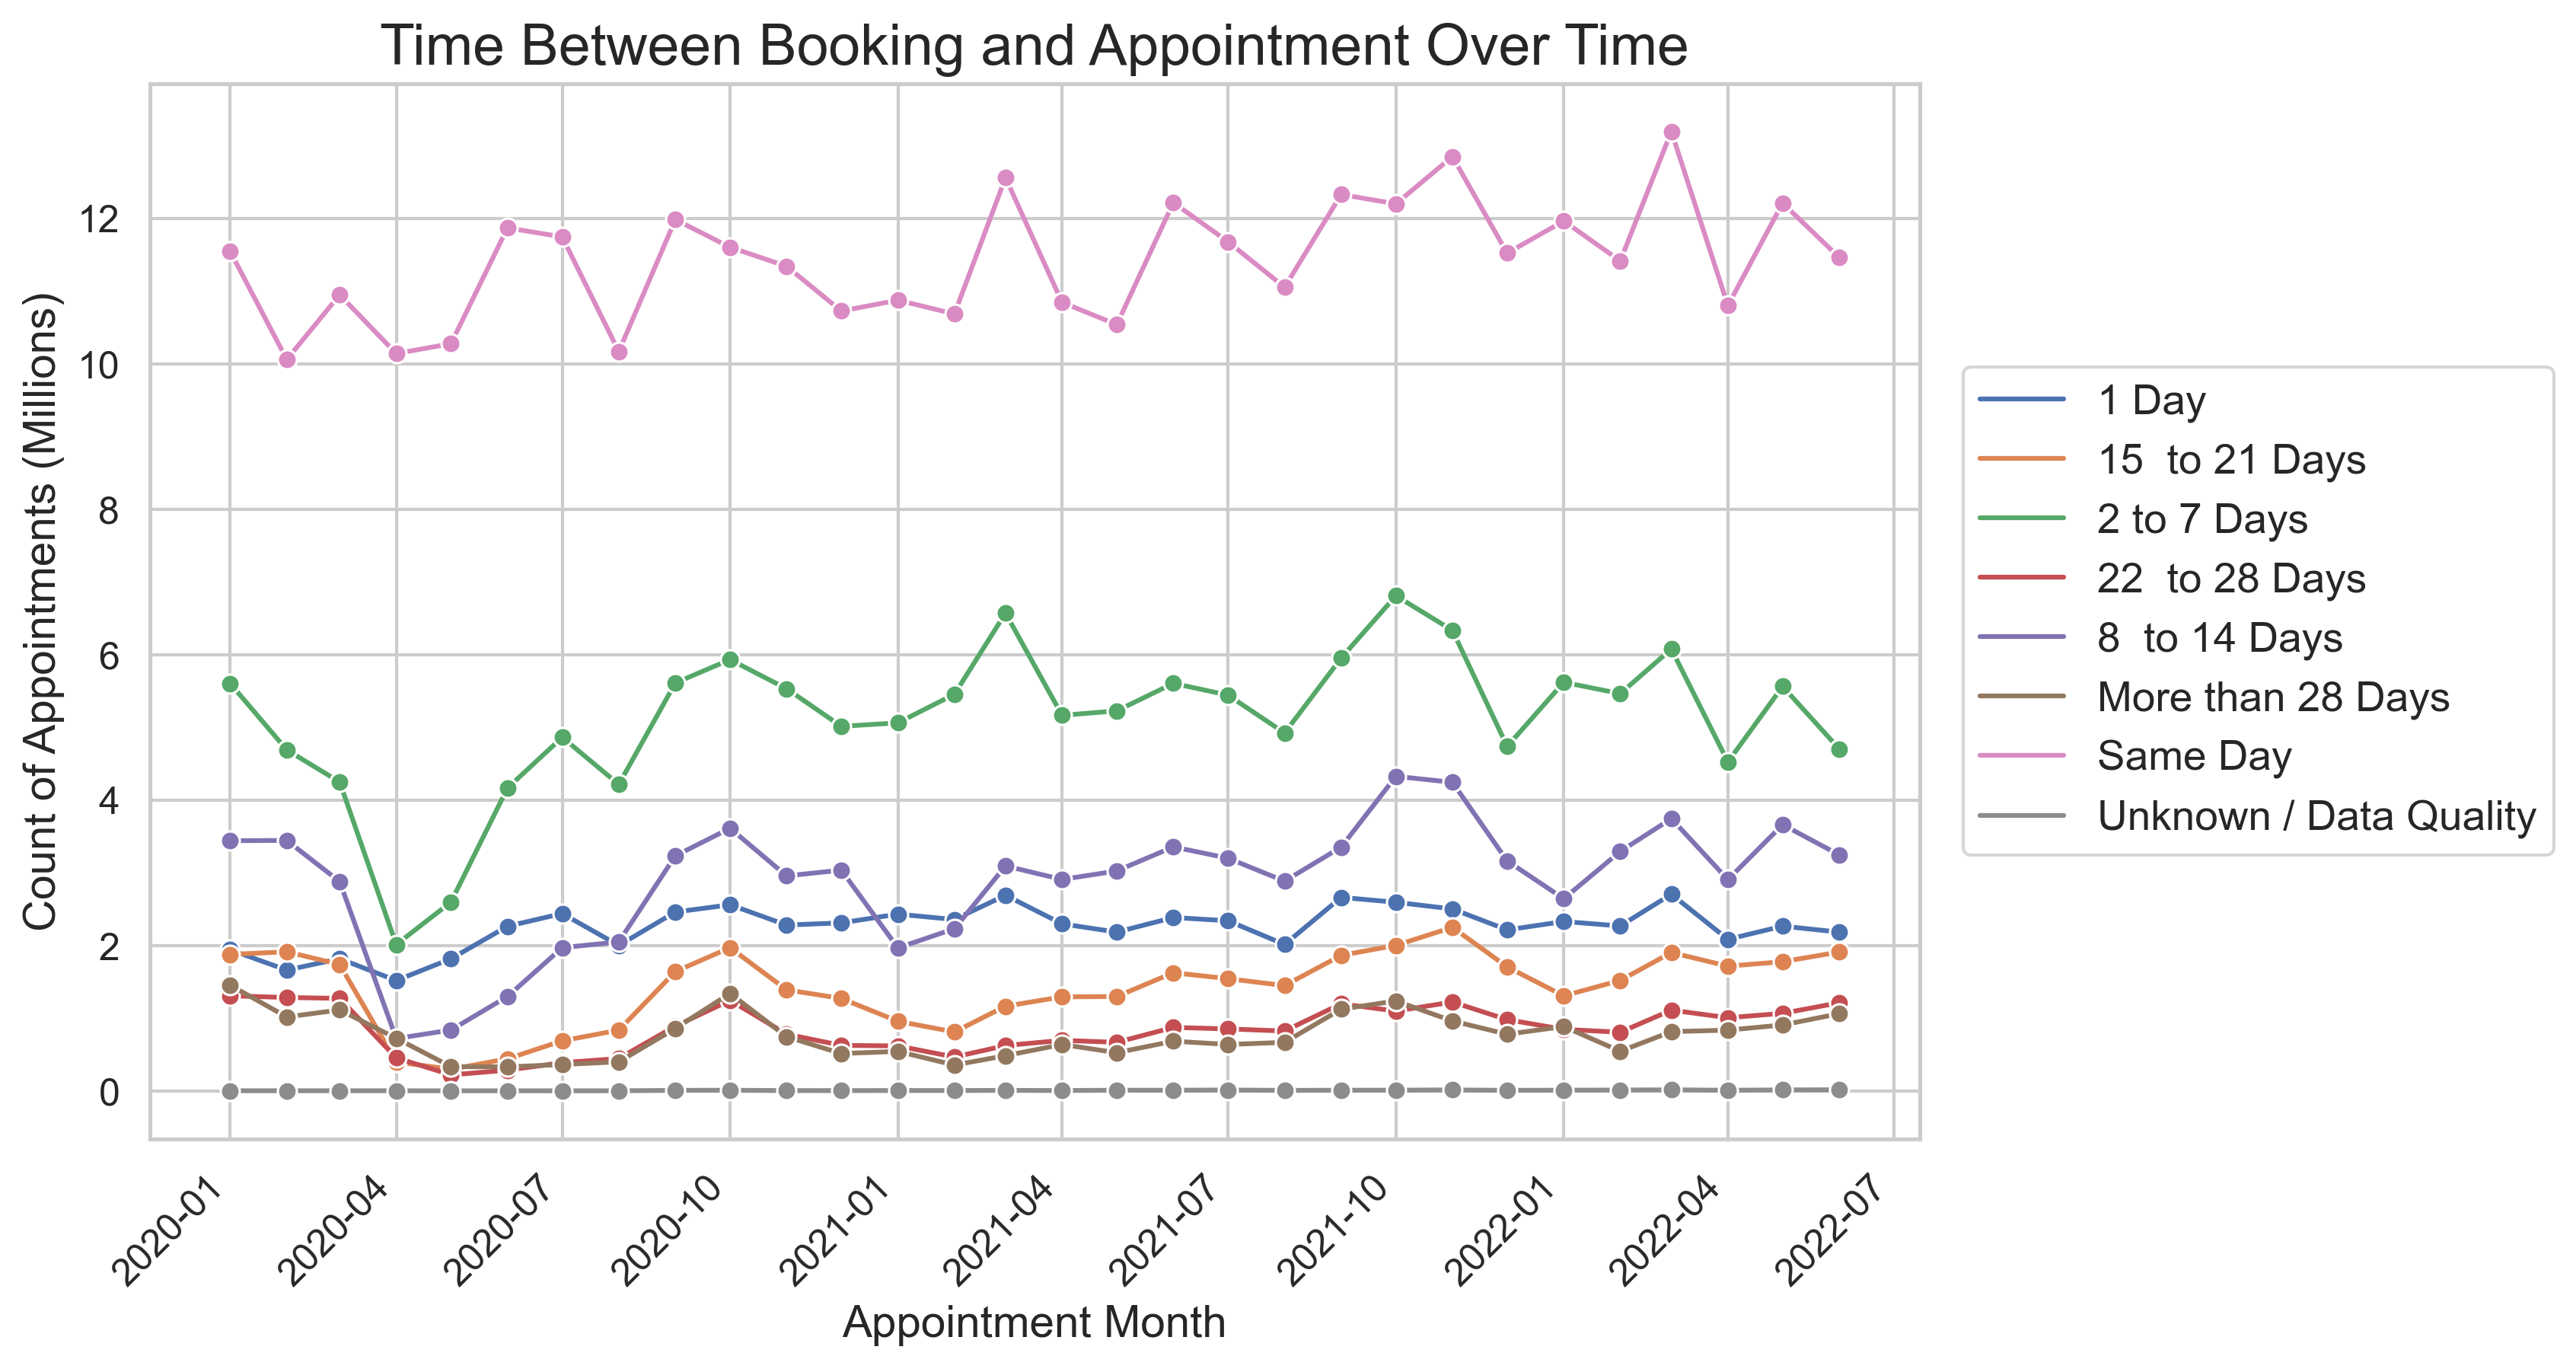

In [124]:
# Create a line plot to answer the question.

# Set the figure size for the plot.
plt.figure(figsize=(10, 6), dpi=300)

# Create the line plot using Seaborn with 'hue' parameter for 'time_between_book_and_appointment'.
sns.lineplot(data=ar_time, x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', marker='o', ci=None)

# Customize the plot (titles, labels, etc.).
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Count of Appointments (Millions)', fontsize=14)
plt.title('Time Between Booking and Appointment Over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot.
plt.grid(True)

# Move the legend to the right side of the plot.
plt.legend(loc='center right', bbox_to_anchor=(1.37, 0.5))

# Modify the Y-axis to display values in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1e6)))

# Save the plot to a file (e.g., PNG) if you want to use it in PowerPoint.
# plt.savefig('time_between_booking_and_appointment_lineplot.png', dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()

<Figure size 3000x1800 with 0 Axes>

<Figure size 3000x1800 with 0 Axes>

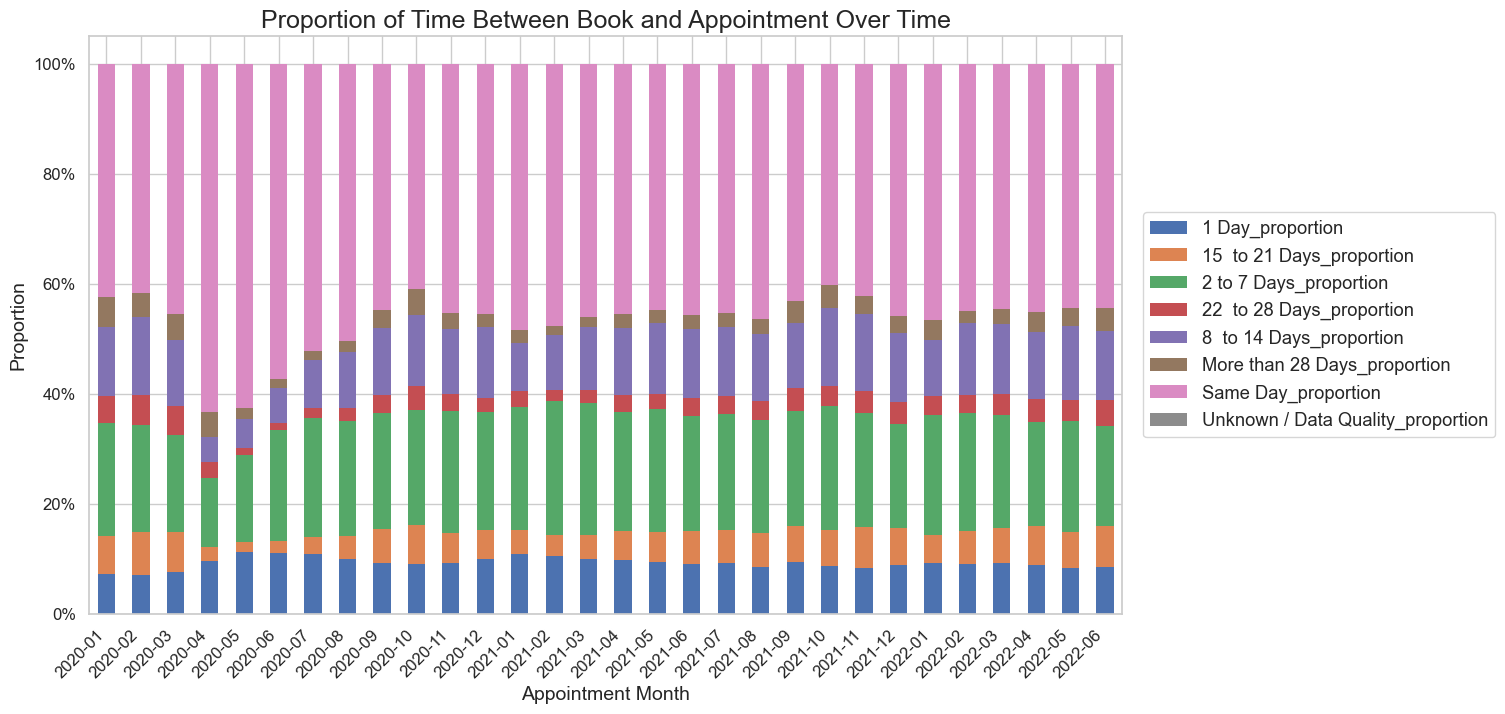

In [125]:
# Stacked Bar Chart

# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Group the data by appointment_month and time between appointments, then calculate the sum for each group
grouped_data = ar.groupby(['appointment_month', 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()

# Pivot the data to have appointment_month as index, time_between_book_and_appointment as columns, and count_of_appointments as values
pivot_data = grouped_data.pivot(index='appointment_month', columns='time_between_book_and_appointment', values='count_of_appointments')

# Calculate the sum of each column (total appointments for each month)
pivot_data['total_appointments'] = pivot_data.sum(axis=1)

# Calculate the proportions for each 'appointment mode' within each month
for time_between_book_and_appointment in pivot_data.columns[:-1]:
    pivot_data[time_between_book_and_appointment + '_proportion'] = pivot_data[time_between_book_and_appointment] / pivot_data['total_appointments']

# Drop unnecessary columns and keep only the proportion columns
proportion_columns = [col for col in pivot_data.columns if col.endswith('_proportion')]
pivot_data_proportions = pivot_data[proportion_columns]

# Set the figure size (for PowerPoint)
plt.figure(figsize=(10, 6), dpi=300)

# Create the 100% stacked bar chart using Seaborn
ax = pivot_data_proportions.plot(kind='bar', stacked=True, linewidth=0)
plt.xlabel('Appointment Month', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.title('Proportion of Time Between Book and Appointment Over Time', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Set y-axis to show percentages
ax.set_yticklabels(['{:.0f}%'.format(val * 100) for val in ax.get_yticks()])

# Format x-axis labels to show YYYY-MM without the day
ax.set_xticklabels(pivot_data_proportions.index.strftime('%Y-%m'))

# Remove the "00:00:00" from the x-axis labels
ax.set_xticklabels([label.get_text().split()[0] for label in ax.get_xticklabels()])
        
# Move the legend 
plt.legend(loc='center right', bbox_to_anchor=(1.37, 0.5))

# Add grid to the plot
plt.grid(True)

# Save the plot to a file (e.g., PNG) if you want to use it in PowerPoint.
plt.savefig('time_between_booking_and_appointment_stacked.png', dpi=300, bbox_inches='tight')

The figures above show how same day appointments have been increasing and that recently, there is a reduction short to medium wait times, which is in line with what the NHS has been stating (souce). However, when looking more closely at the proption of time between booking and appointment there is a increase seen in the propotion and number of longer term appointment wait times of 15 - 21 days, 22 - 28 days, and more than 28 days which is in line with data published online __[(NHS, 2021)](https://www.england.nhs.uk/2021/08/nhs-cuts-waiting-times-despite-busy-summer-period/)__

## 6.6 How do the spread of service settings compare?

In [126]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
display(nc)

appointment_date icb_ons_code  \
0            2021-08-02    E54000050   
1            2021-08-02    E54000050   
2            2021-08-02    E54000050   
3            2021-08-02    E54000050   
4            2021-08-02    E54000050   
...                 ...          ...   
817389       2022-06-30    E54000054   
817390       2022-06-30    E54000054   
817391       2022-06-30    E54000054   
817392       2022-06-30    E54000054   
817393       2022-06-30    E54000054   

                             sub_icb_location_name            service_setting  \
0       NHS North East and North Cumbria ICB - 00L       Primary Care Network   
1       NHS North East and North Cumbria ICB - 00L                      Other   
2       NHS North East and North Cumbria ICB - 00L           General Practice   
3       NHS North East and North Cumbria ICB - 00L           General Practice   
4       NHS North East and North Cumbria ICB - 00L           General Practice   
...                                            ...                        ...   
817389              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817390              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817391              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817392              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   
817393              NHS West Yorkshire ICB - X2C4Y  Extended Access Provision   

                  context_type                       national_category  \
0       Care Related Encounter  Patient contact during Care Home Round   
1       Care Related Encounter                         Planned Clinics   
2       Care Related Encounter                              Home Visit   
3       Care Related Encounter              General Consultation Acute   
4       Care Related Encounter            Structured Medication Review   
...                        ...                                     ...   
817389  Care Related Encounter             Unplanned Clinical Activity   
817390  Care Related Encounter                         Planned Clinics   
817391  Care Related Encounter              Planned Clinical Procedure   
817392  Care Related Encounter            General Consultation Routine   
817393  Care Related Encounter              General Consultation Acute   

        count_of_appointments appointment_month  
0                           3           2021-08  
1                           7           2021-08  
2                          79           2021-08  
3                         725           2021-08  
4                           2           2021-08  
...                       ...               ...  
817389                     12           2022-06  
817390                      4           2022-06  
817391                     92           2022-06  
817392                      4           2022-06  
817393                     19           2022-06  

[817394 rows x 8 columns]

In [127]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# Convert the 'appointment_date' column to datetime type.
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Group by appointment month and calculate the total count of appointments.
appointment_counts_by_month = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Rename the columns for clarity.
appointment_counts_by_month.columns = ['Appointment_Month', 'Total_Count_of_Appointments']

# Create a new DataFrame with the aggregated data.
nc_agg = appointment_counts_by_month.copy()

# Display the new DataFrame.
nc_agg

Appointment_Month  Total_Count_of_Appointments
0            2021-08                     23852171
1            2021-09                     28522501
2            2021-10                     30303834
3            2021-11                     30405070
4            2021-12                     25140776
5            2022-01                     25635474
6            2022-02                     25355260
7            2022-03                     29595038
8            2022-04                     23913060
9            2022-05                     27495508
10           2022-06                     25828078

In [128]:
# View unique values in the 'service_setting' column.
unique_service_setting = nc['service_setting'].unique()
print(unique_service_setting)

['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


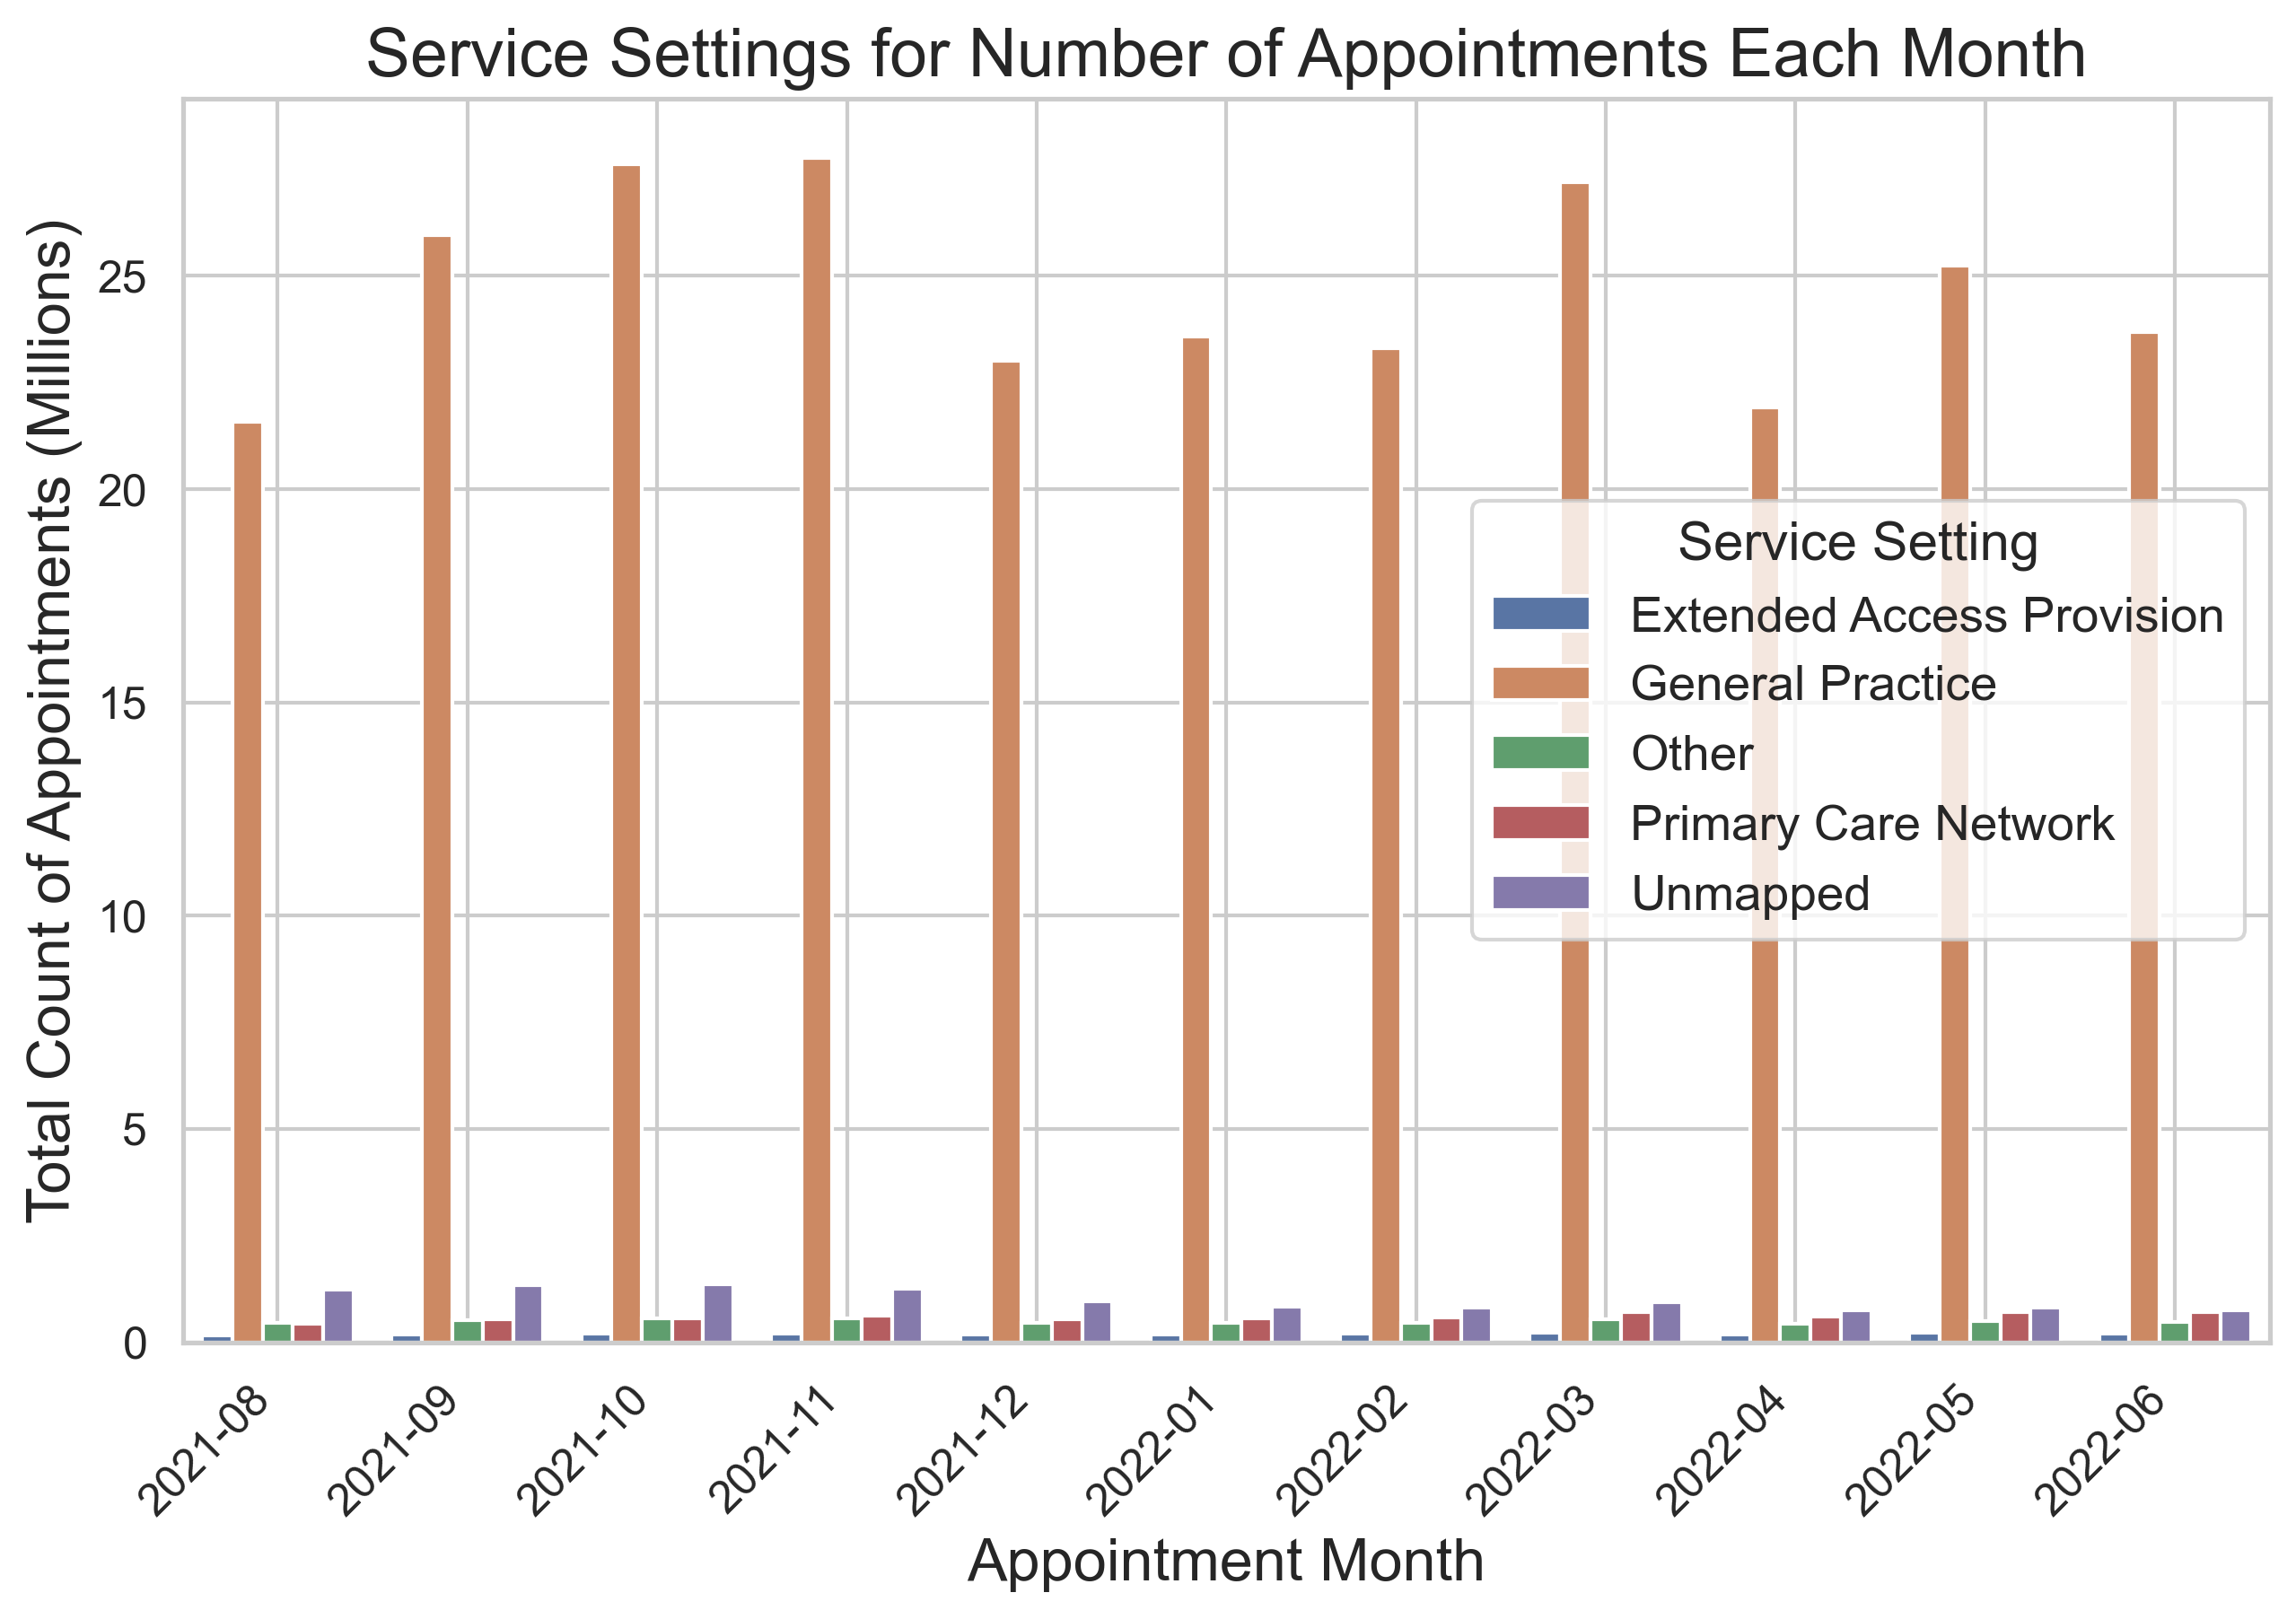

In [129]:
# Create a barplot to investigate spread of service settings.

# Group by 'appointment_month' and calculate the sum of 'count_of_appointments' for each month.
appointment_counts_by_month = nc.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Create a new DataFrame for the visualisation.
nc_new = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Set the figure size for the plot.
plt.figure(figsize=(10, 6), dpi=300)

# Create a bar plot using Seaborn.
sns.barplot(data=nc_new, x='appointment_month', y='count_of_appointments', hue='service_setting')

# Customize the plot (titles, labels, etc.).
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Total Count of Appointments (Millions)', fontsize=16)
plt.title('Service Settings for Number of Appointments Each Month', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot.
plt.grid(True)

# Show the legend.
plt.legend(title='Service Setting', loc='center right')

# Format the y-axis tick labels to show values in millions.
formatter = FuncFormatter(lambda x, _: '{:.0f}'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot.
plt.show()

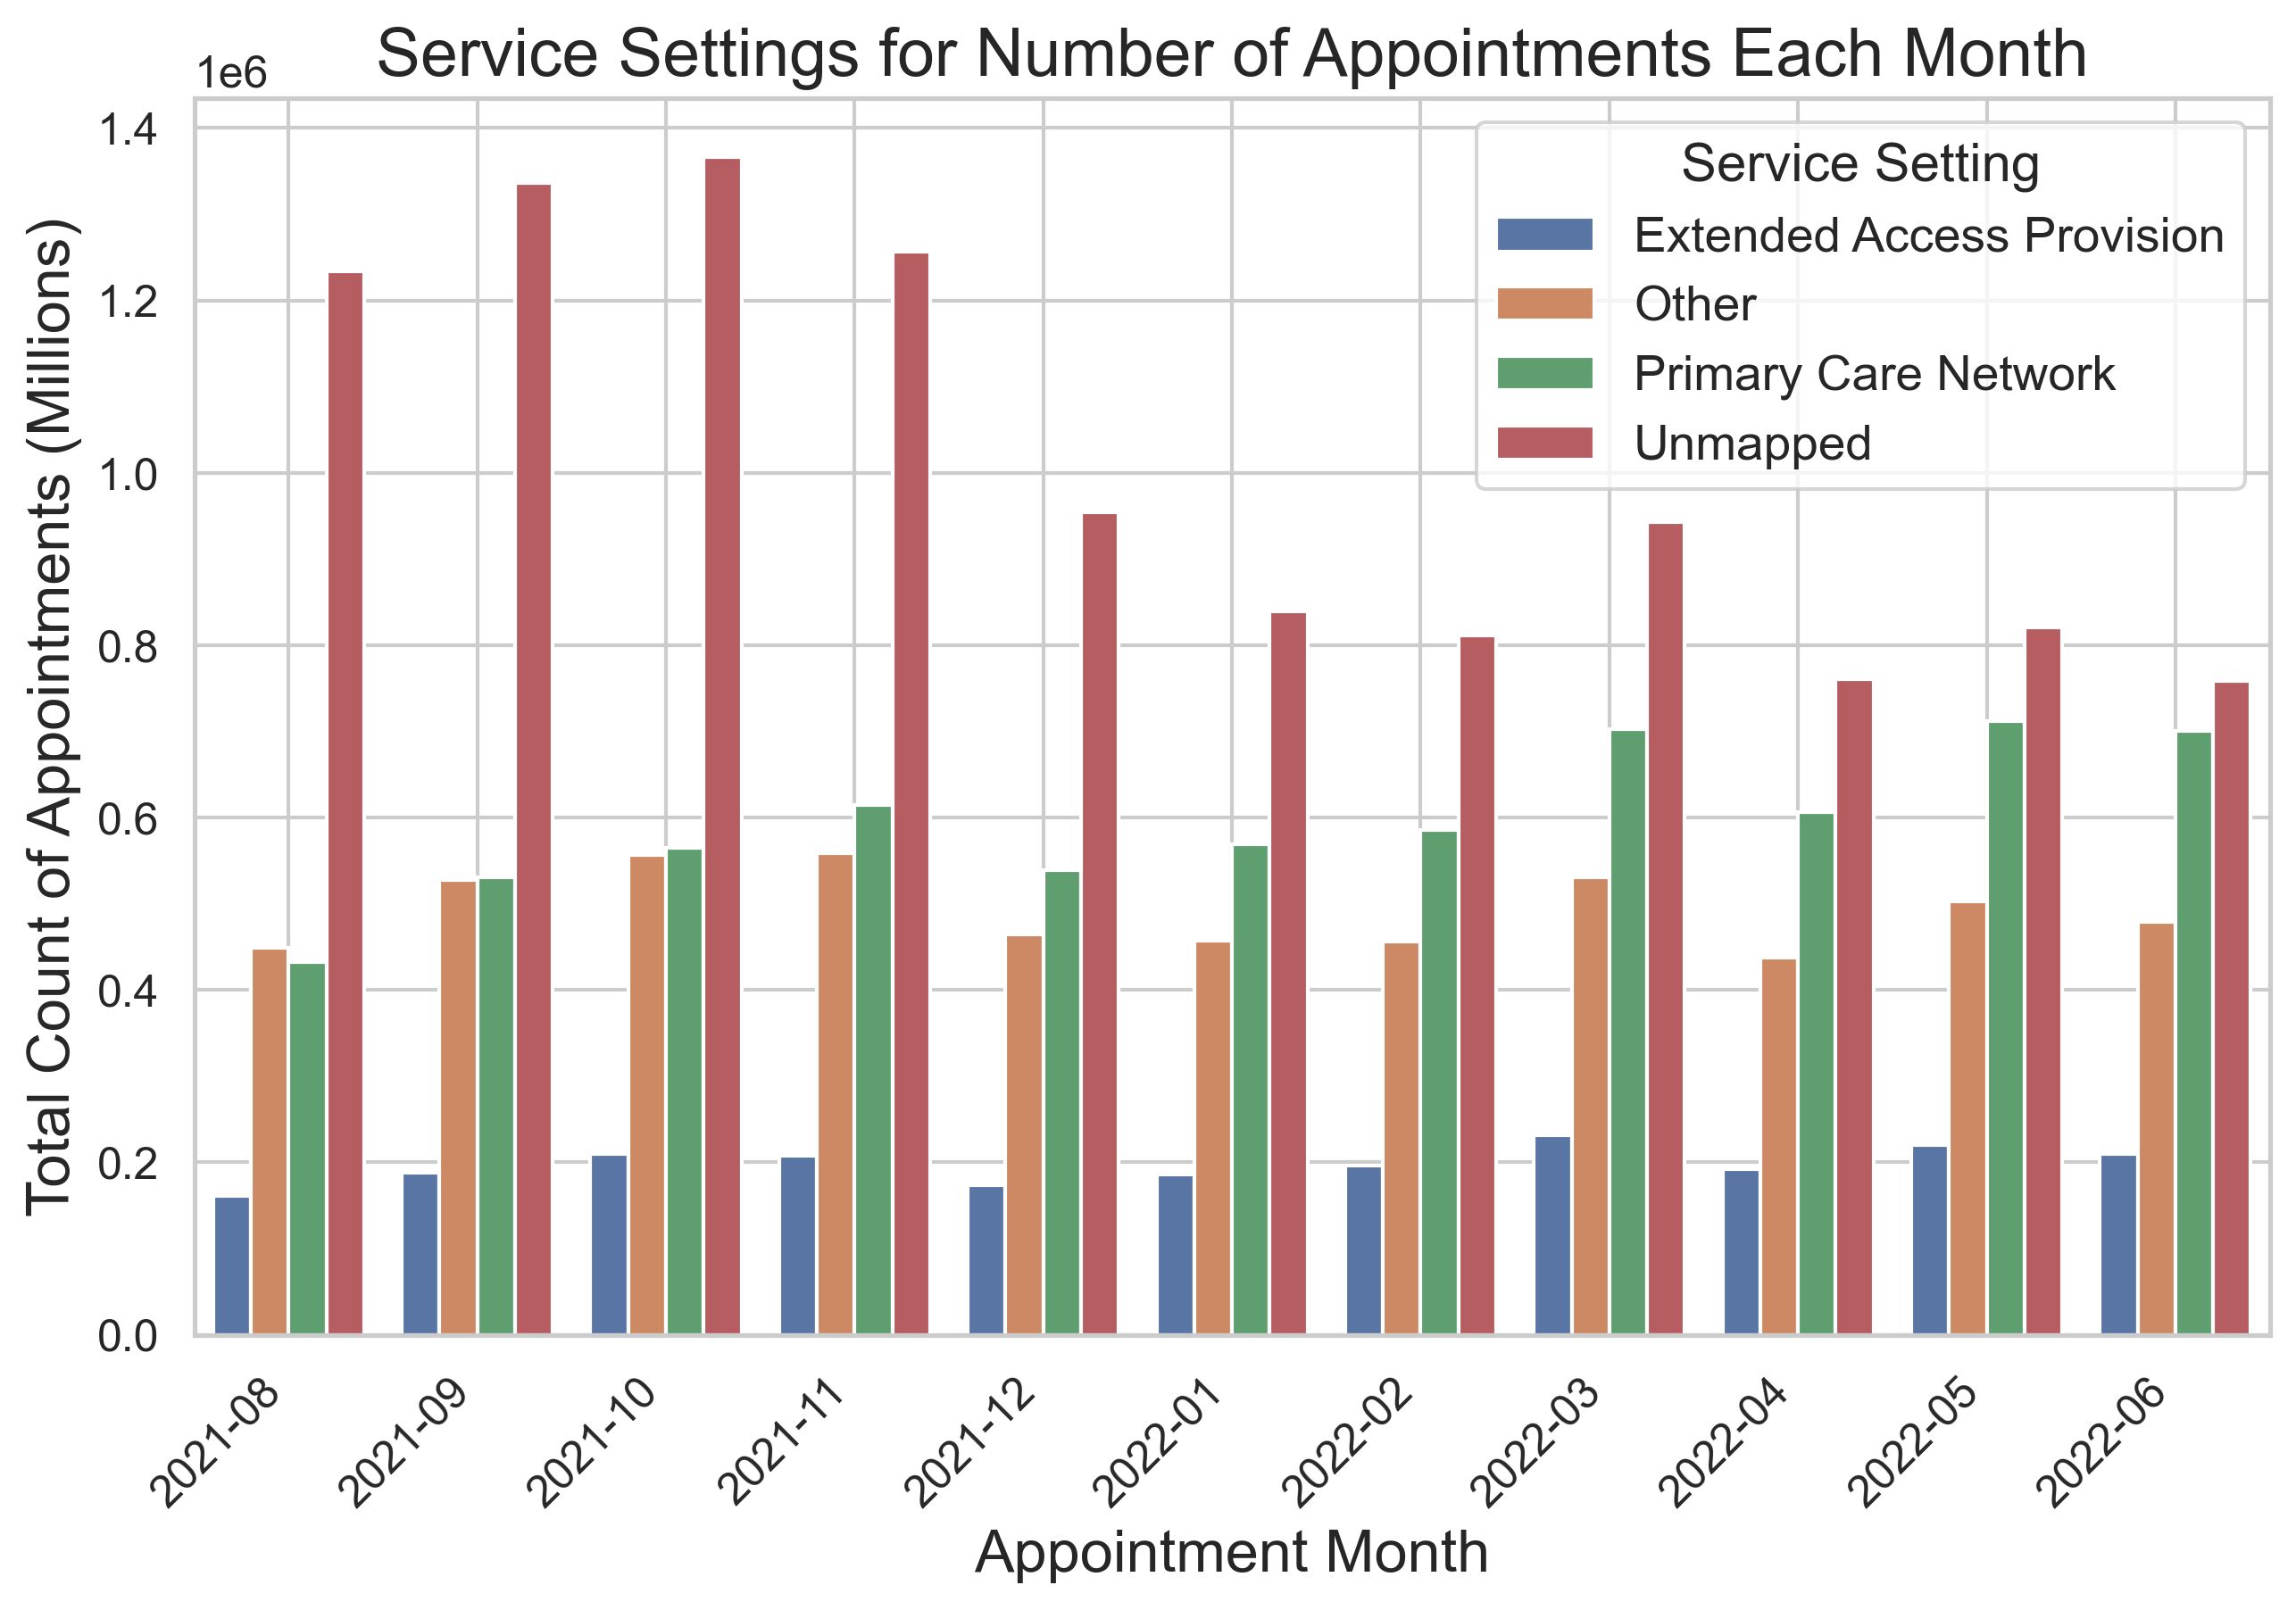

In [130]:
# Create a boxplot to investigate the service settings without GP.

# Filter the DataFrame to include only specific service settings.
desired_service_settings = ['Extended Access Provision', 'Primary Care Network', 'Other', 'Unmapped']
nc_filtered = nc[nc['service_setting'].isin(desired_service_settings)]

# Group by 'appointment_month' and calculate the sum of 'count_of_appointments' for each month.
appointment_counts_by_month = nc_filtered.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Create a new DataFrame for the visualization.
nc_filtered_new = nc_filtered.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Set the figure size for the plot.
plt.figure(figsize=(10, 6), dpi=300)

# Create a bar plot using Seaborn.
sns.barplot(data=nc_filtered_new, x='appointment_month', y='count_of_appointments', hue='service_setting')

# Customize the plot (titles, labels, etc.).
plt.xlabel('Appointment Month', fontsize=16)
plt.ylabel('Total Count of Appointments (Millions)', fontsize=16)
plt.title('Service Settings for Number of Appointments Each Month', fontsize=18)
plt.xticks(rotation=45, ha='right')

# Add grid to the plot.
plt.grid(True)

# Show the legend.
plt.legend(title='Service Setting')

# Show the plot.
plt.show()

The service settings for GP follows similar trend to count of appointments. In the figure shown excluding GP, there is a decline of about 500,000 unmapped appointments, indicating success in the NHS’s initiative to establish “more accurate general practice appointment data – guidance” establishing consistent principles for recording of patient facing appointment in GP [(BMA, 2020)](https://www.england.nhs.uk/publication/more-accurate-general-practice-appointment-data-guidance/). 
